In [1]:
# Analysis of the Datasets used for the AIVIllage DEFCON Workshop "Machine Learning for Network Security hands-on Workshop: DIYML"
# Goal: To detect the flows generated by the malware. Decisions are taken flow-by-flow.

In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Before loading the dataset, define a function to convert the DateTime column into a date object
dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d %H:%M:%S.%f') # 2018/07/22 13:01:34.892833

In [4]:
# Load the __normal__ Dataset from the file
normal_dataset = pd.read_csv('../Datasets/Normal/normal.binetflow', sep='\t', parse_dates=['StartTime'] , date_parser=dateparse)
malware_dataset = pd.read_csv('../Datasets/Malware/malware.binetflow', sep='\t', parse_dates=['StartTime'] , date_parser=dateparse)

In [5]:
# Describe the complete normal dataset
normal_dataset.describe(include='all')

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Label
count,4517,4517.000000,4517,4517,4502,4515,4517,4502,4517,4512.000000,4190.0,4517.000000,4.517000e+03,4.517000e+03,4517.000000,4515
unique,4517,NaN,8,7,3966,3,475,53,32,NaN,NaN,NaN,NaN,NaN,NaN,23
top,1970-01-01 01:04:05.734760,NaN,tcp,10.0.2.15,0x0303,->,1.1.1.1,443,CON,NaN,NaN,NaN,NaN,NaN,NaN,flow=Normal-TCP-WEB-Established-TLS
freq,1,NaN,2757,4473,43,3079,644,2341,1435,NaN,NaN,NaN,NaN,NaN,NaN,1630
first,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-07-22 13:01:35.896300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.452471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003546,0.0,99.019703,6.918778e+04,4.655337e+03,33.658180,NaN
std,NaN,195.837918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238197,0.0,2298.512912,1.513251e+06,5.396901e+04,685.477544,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
25%,NaN,0.131456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2.000000,2.800000e+02,8.800000e+01,1.000000,NaN


In [6]:
# Describe the complete Malware dataset
malware_dataset.describe(include='all')

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Label
count,53372,53372.000000,53372,53372,53369,53370,53372,53369,53372,53366.000000,38823.0,53372.000000,5.337200e+04,5.337200e+04,53372.000000,53370
unique,53342,NaN,7,7,15124,3,39,230,21,NaN,NaN,NaN,NaN,NaN,NaN,10
top,1970-01-01 01:22:21.999397,NaN,udp,10.0.2.15,0x0303,<->,8.8.8.8,53,CON,NaN,NaN,NaN,NaN,NaN,NaN,flow=Malware-UDP-DNS
freq,2,NaN,44754,53358,223,30445,30242,44742,30447,NaN,NaN,NaN,NaN,NaN,NaN,25657
first,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-05-10 10:52:48.294388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.216789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003898,0.0,5.052218,3.743448e+03,3.143380e+02,3.654688,NaN
std,NaN,38.494520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834009,0.0,186.749294,7.432007e+05,1.717775e+04,186.711127,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
25%,NaN,0.045723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2.000000,2.130000e+02,7.100000e+01,1.000000,NaN


In [7]:
# Describe the complete normal dataset by printing and so we see the values.
normal_dataset.describe(include='all')

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Label
count,4517,4517.000000,4517,4517,4502,4515,4517,4502,4517,4512.000000,4190.0,4517.000000,4.517000e+03,4.517000e+03,4517.000000,4515
unique,4517,NaN,8,7,3966,3,475,53,32,NaN,NaN,NaN,NaN,NaN,NaN,23
top,1970-01-01 01:04:05.734760,NaN,tcp,10.0.2.15,0x0303,->,1.1.1.1,443,CON,NaN,NaN,NaN,NaN,NaN,NaN,flow=Normal-TCP-WEB-Established-TLS
freq,1,NaN,2757,4473,43,3079,644,2341,1435,NaN,NaN,NaN,NaN,NaN,NaN,1630
first,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-07-22 13:01:35.896300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.452471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003546,0.0,99.019703,6.918778e+04,4.655337e+03,33.658180,NaN
std,NaN,195.837918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238197,0.0,2298.512912,1.513251e+06,5.396901e+04,685.477544,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
25%,NaN,0.131456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2.000000,2.800000e+02,8.800000e+01,1.000000,NaN


In [8]:
# Describe the complete malware dataset by printing
malware_dataset.describe(include='all')

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Label
count,53372,53372.000000,53372,53372,53369,53370,53372,53369,53372,53366.000000,38823.0,53372.000000,5.337200e+04,5.337200e+04,53372.000000,53370
unique,53342,NaN,7,7,15124,3,39,230,21,NaN,NaN,NaN,NaN,NaN,NaN,10
top,1970-01-01 01:22:21.999397,NaN,udp,10.0.2.15,0x0303,<->,8.8.8.8,53,CON,NaN,NaN,NaN,NaN,NaN,NaN,flow=Malware-UDP-DNS
freq,2,NaN,44754,53358,223,30445,30242,44742,30447,NaN,NaN,NaN,NaN,NaN,NaN,25657
first,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-05-10 10:52:48.294388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.216789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003898,0.0,5.052218,3.743448e+03,3.143380e+02,3.654688,NaN
std,NaN,38.494520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834009,0.0,186.749294,7.432007e+05,1.717775e+04,186.711127,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN
25%,NaN,0.045723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2.000000,2.130000e+02,7.100000e+01,1.000000,NaN


In [9]:
# Clean the normal dataset by deleting the rows without Label (now only the management records from Argus)
dropped_normal_dataset = normal_dataset.dropna(subset=['Label'], how='any', axis=0)
# From now on, use dropped_dataset.
dropped_normal_dataset.describe(include='all')

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Label
count,4515,4515.000000,4515,4515,4500,4515,4515,4500,4515,4512.000000,4190.0,4515.000000,4.515000e+03,4.515000e+03,4515.000000,4515
unique,4515,NaN,7,6,3966,3,473,52,30,NaN,NaN,NaN,NaN,NaN,NaN,23
top,1970-01-01 01:04:05.734760,NaN,tcp,10.0.2.15,0x0303,->,1.1.1.1,443,CON,NaN,NaN,NaN,NaN,NaN,NaN,flow=Normal-TCP-WEB-Established-TLS
freq,1,NaN,2757,4473,43,3079,644,2341,1435,NaN,NaN,NaN,NaN,NaN,NaN,1630
first,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1970-01-01 02:08:59.134150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.463508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003546,0.0,99.063566,6.353519e+04,4.657399e+03,33.673090,NaN
std,NaN,195.880595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238197,0.0,2299.021107,1.464866e+06,5.398087e+04,685.629017,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,1.000000,5.400000e+01,5.400000e+01,1.000000,NaN
25%,NaN,0.131622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2.000000,2.805000e+02,8.800000e+01,1.000000,NaN


In [10]:
# Clean the malware dataset by deleting the rows without Label (now only the management records from Argus)
dropped_malware_dataset = malware_dataset.dropna(subset=['Label'], how='any', axis=0)
# From now on, use dropped_dataset.
dropped_malware_dataset.describe(include='all')

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,SrcPkts,Label
count,53370,53370.000000,53370,53370,53367,53370,53370,53367,53370,53366.000000,38823.0,53370.000000,5.337000e+04,5.337000e+04,53370.000000,53370
unique,53340,NaN,6,6,15124,3,37,229,19,NaN,NaN,NaN,NaN,NaN,NaN,10
top,1970-01-01 01:22:21.999397,NaN,udp,10.0.2.15,0x0303,<->,8.8.8.8,53,CON,NaN,NaN,NaN,NaN,NaN,NaN,flow=Malware-UDP-DNS
freq,2,NaN,44754,53358,223,30445,30242,44742,30447,NaN,NaN,NaN,NaN,NaN,NaN,25657
first,1970-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1970-01-01 03:02:37.156716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.216889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003898,0.0,5.052408,5.273551e+02,3.143498e+02,3.654825,NaN
std,NaN,38.495237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834009,0.0,186.752791,1.743033e+04,1.717807e+04,186.714624,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,1.000000,6.000000e+01,6.000000e+01,1.000000,NaN
25%,NaN,0.045723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2.000000,2.130000e+02,7.100000e+01,1.000000,NaN


In [11]:
# How to see the data of one row. Example of normal data for the first row.
dropped_normal_dataset.iloc[0]

StartTime    1970-01-01 01:00:00
Dur                            0
Proto                        llc
SrcAddr        00:00:00:00:00:00
Sport                          0
Dir                           ->
DstAddr        00:00:00:00:00:00
Dport                          0
State                        INT
sTos                         NaN
dTos                         NaN
TotPkts                        1
TotBytes                      60
SrcBytes                      60
SrcPkts                        1
Label            flow=Background
Name: 1, dtype: object

# Histograms

In order to have a better idea of how the data looks like and how we may end up using it for our detection, we need to explore and visualize it as best as we can.

In [ ]:
# Lets explore the histogram for each column for the normal dataset and the malware dataset

# Normal Histogram of labels. To have an idea of how they are distributed.
dropped_normal_dataset['Label'].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30)

KeyboardInterrupt: 

Error in callback <function post_execute at 0x11e46e668> (for post_execute):


ValueError: object too deep for desired array

In [ ]:
# Malware Histogram of labels. To have an idea of how they are distributed.
dropped_malware_dataset['Label'].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30)

KeyboardInterrupt: 

In [3]:
# Normal Duration Histogram
ax = dropped_normal_dataset['Dur'].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30, bins=50, color='DarkBlue')
# Or you can zoom in to the flows with duration less than 20 seconds
#ax = dropped_dataset['Dur'][dropped_dataset.Dur < 20].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30, bins=500)


NameError: name 'dropped_normal_dataset' is not defined

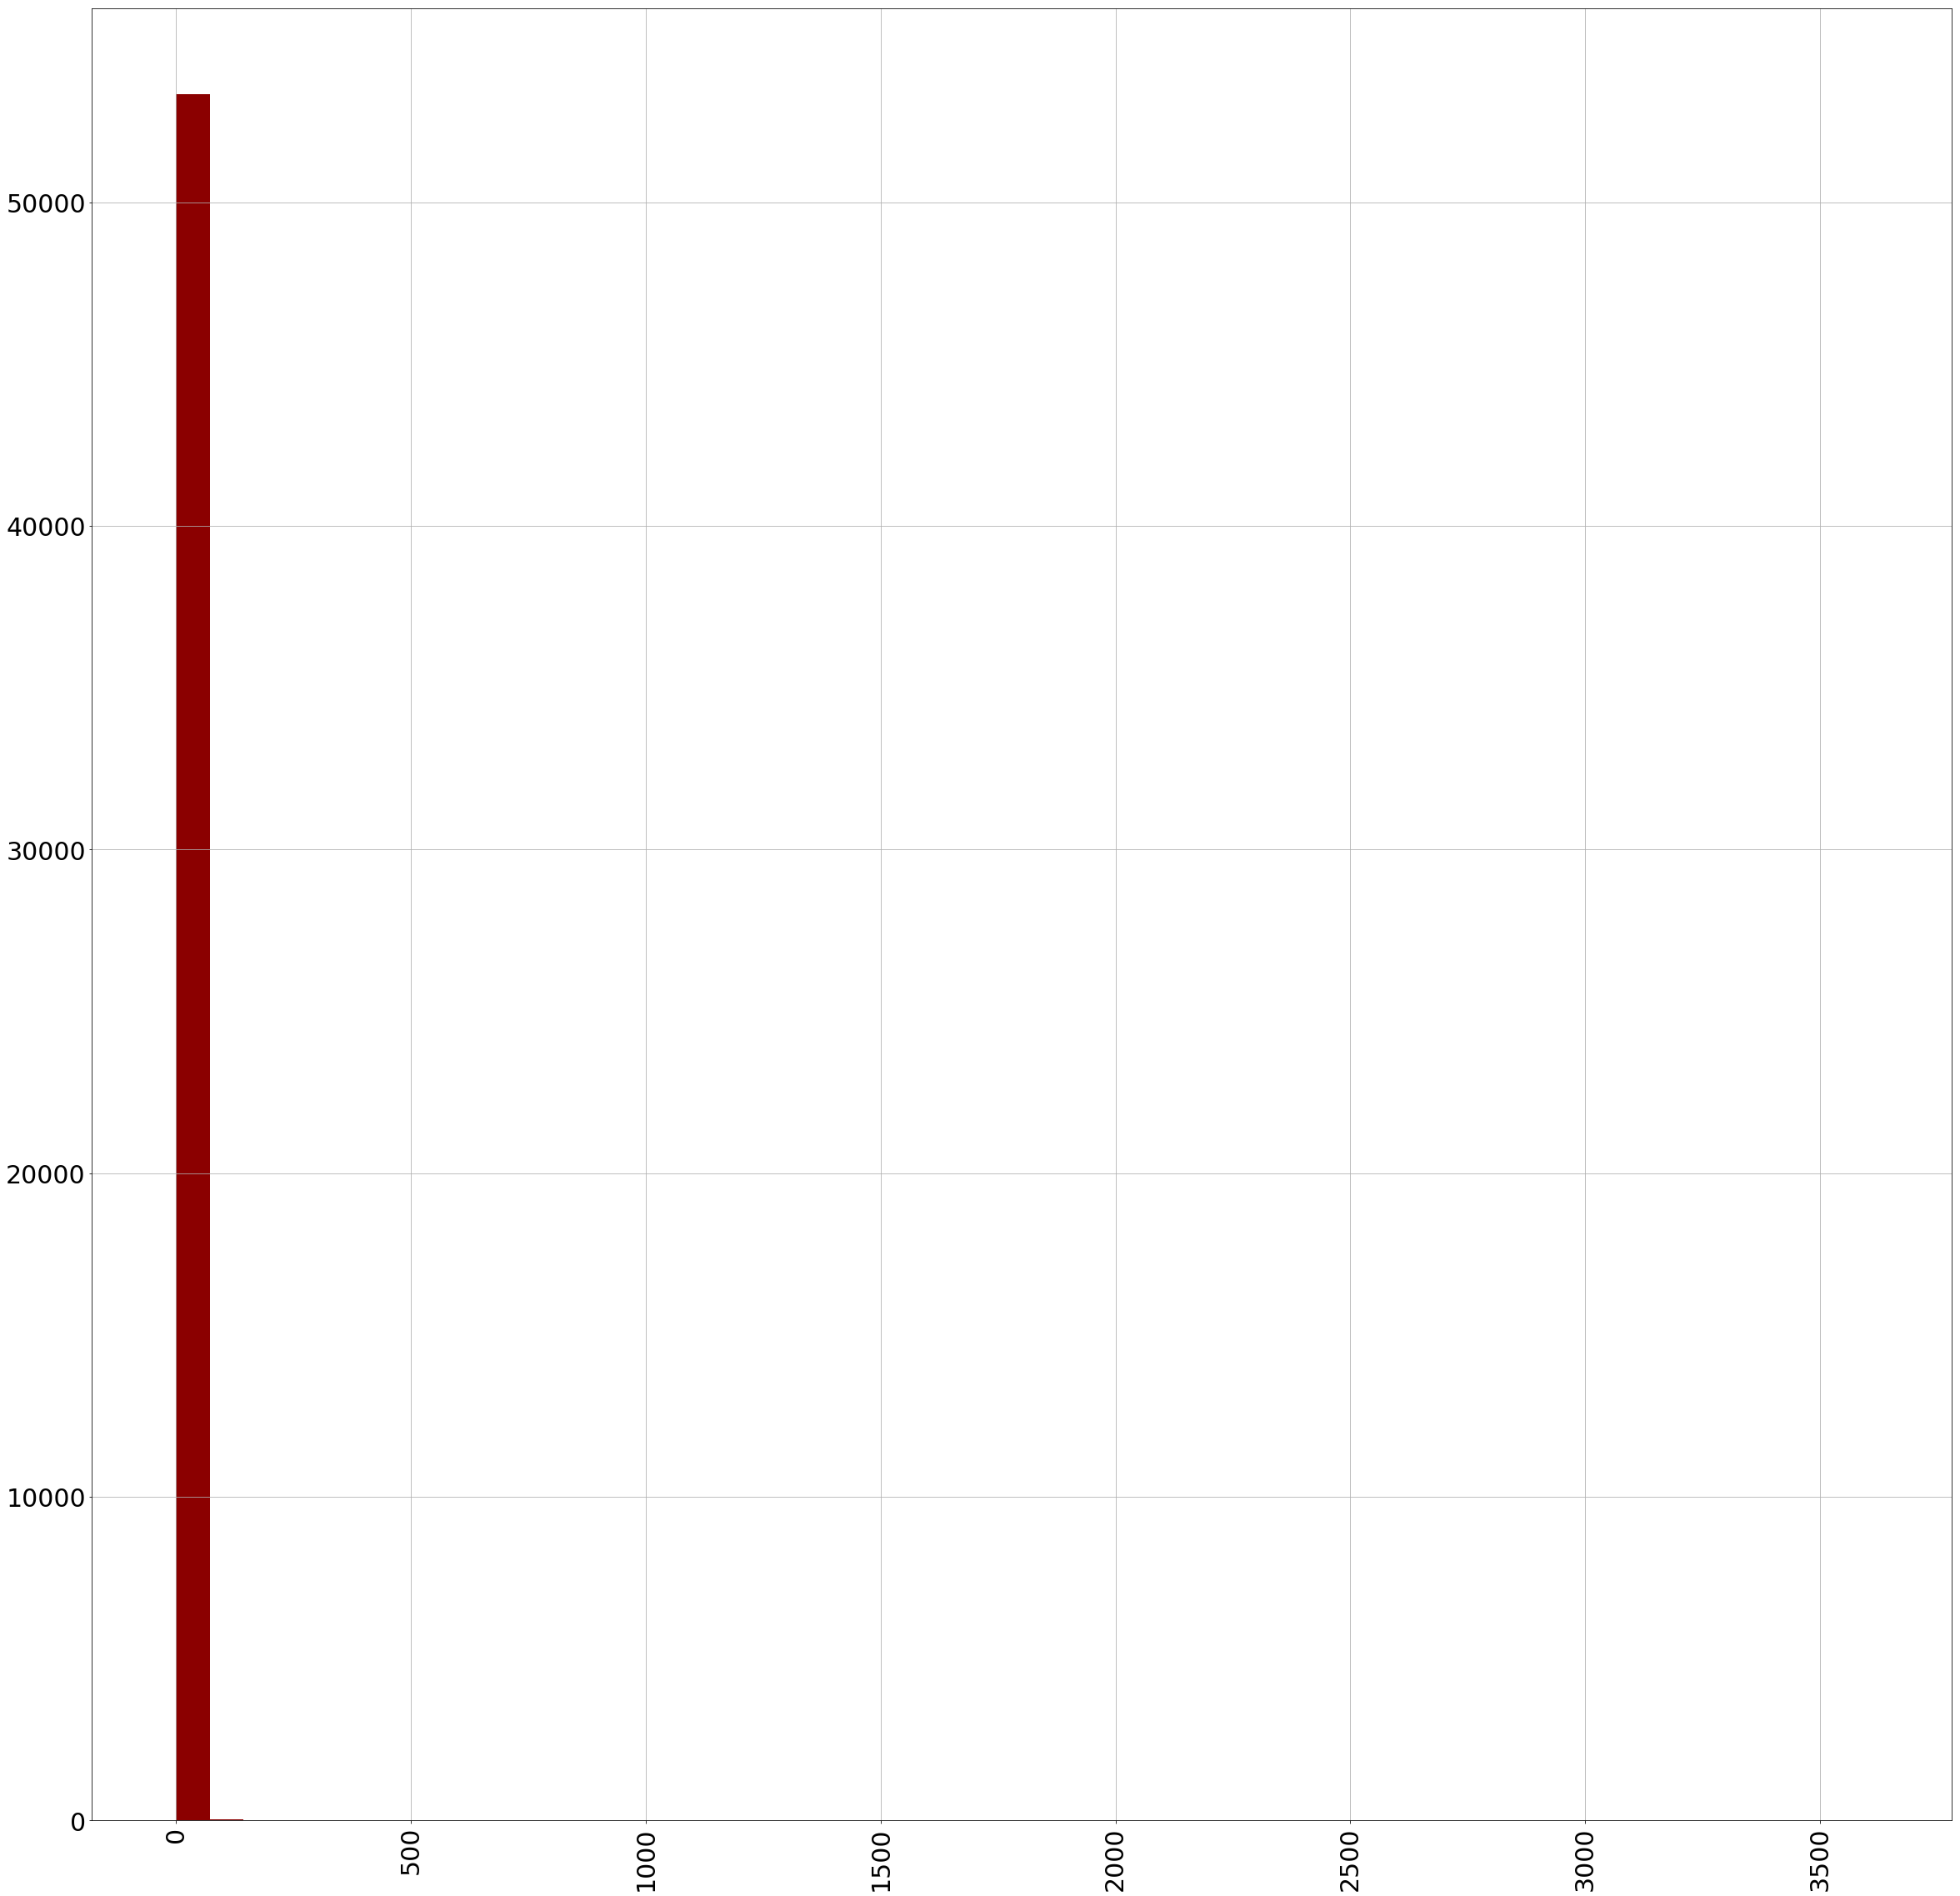

In [278]:
# Malware Duration Histogram
ax = dropped_malware_dataset['Dur'].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30, bins=50, color='DarkRed')

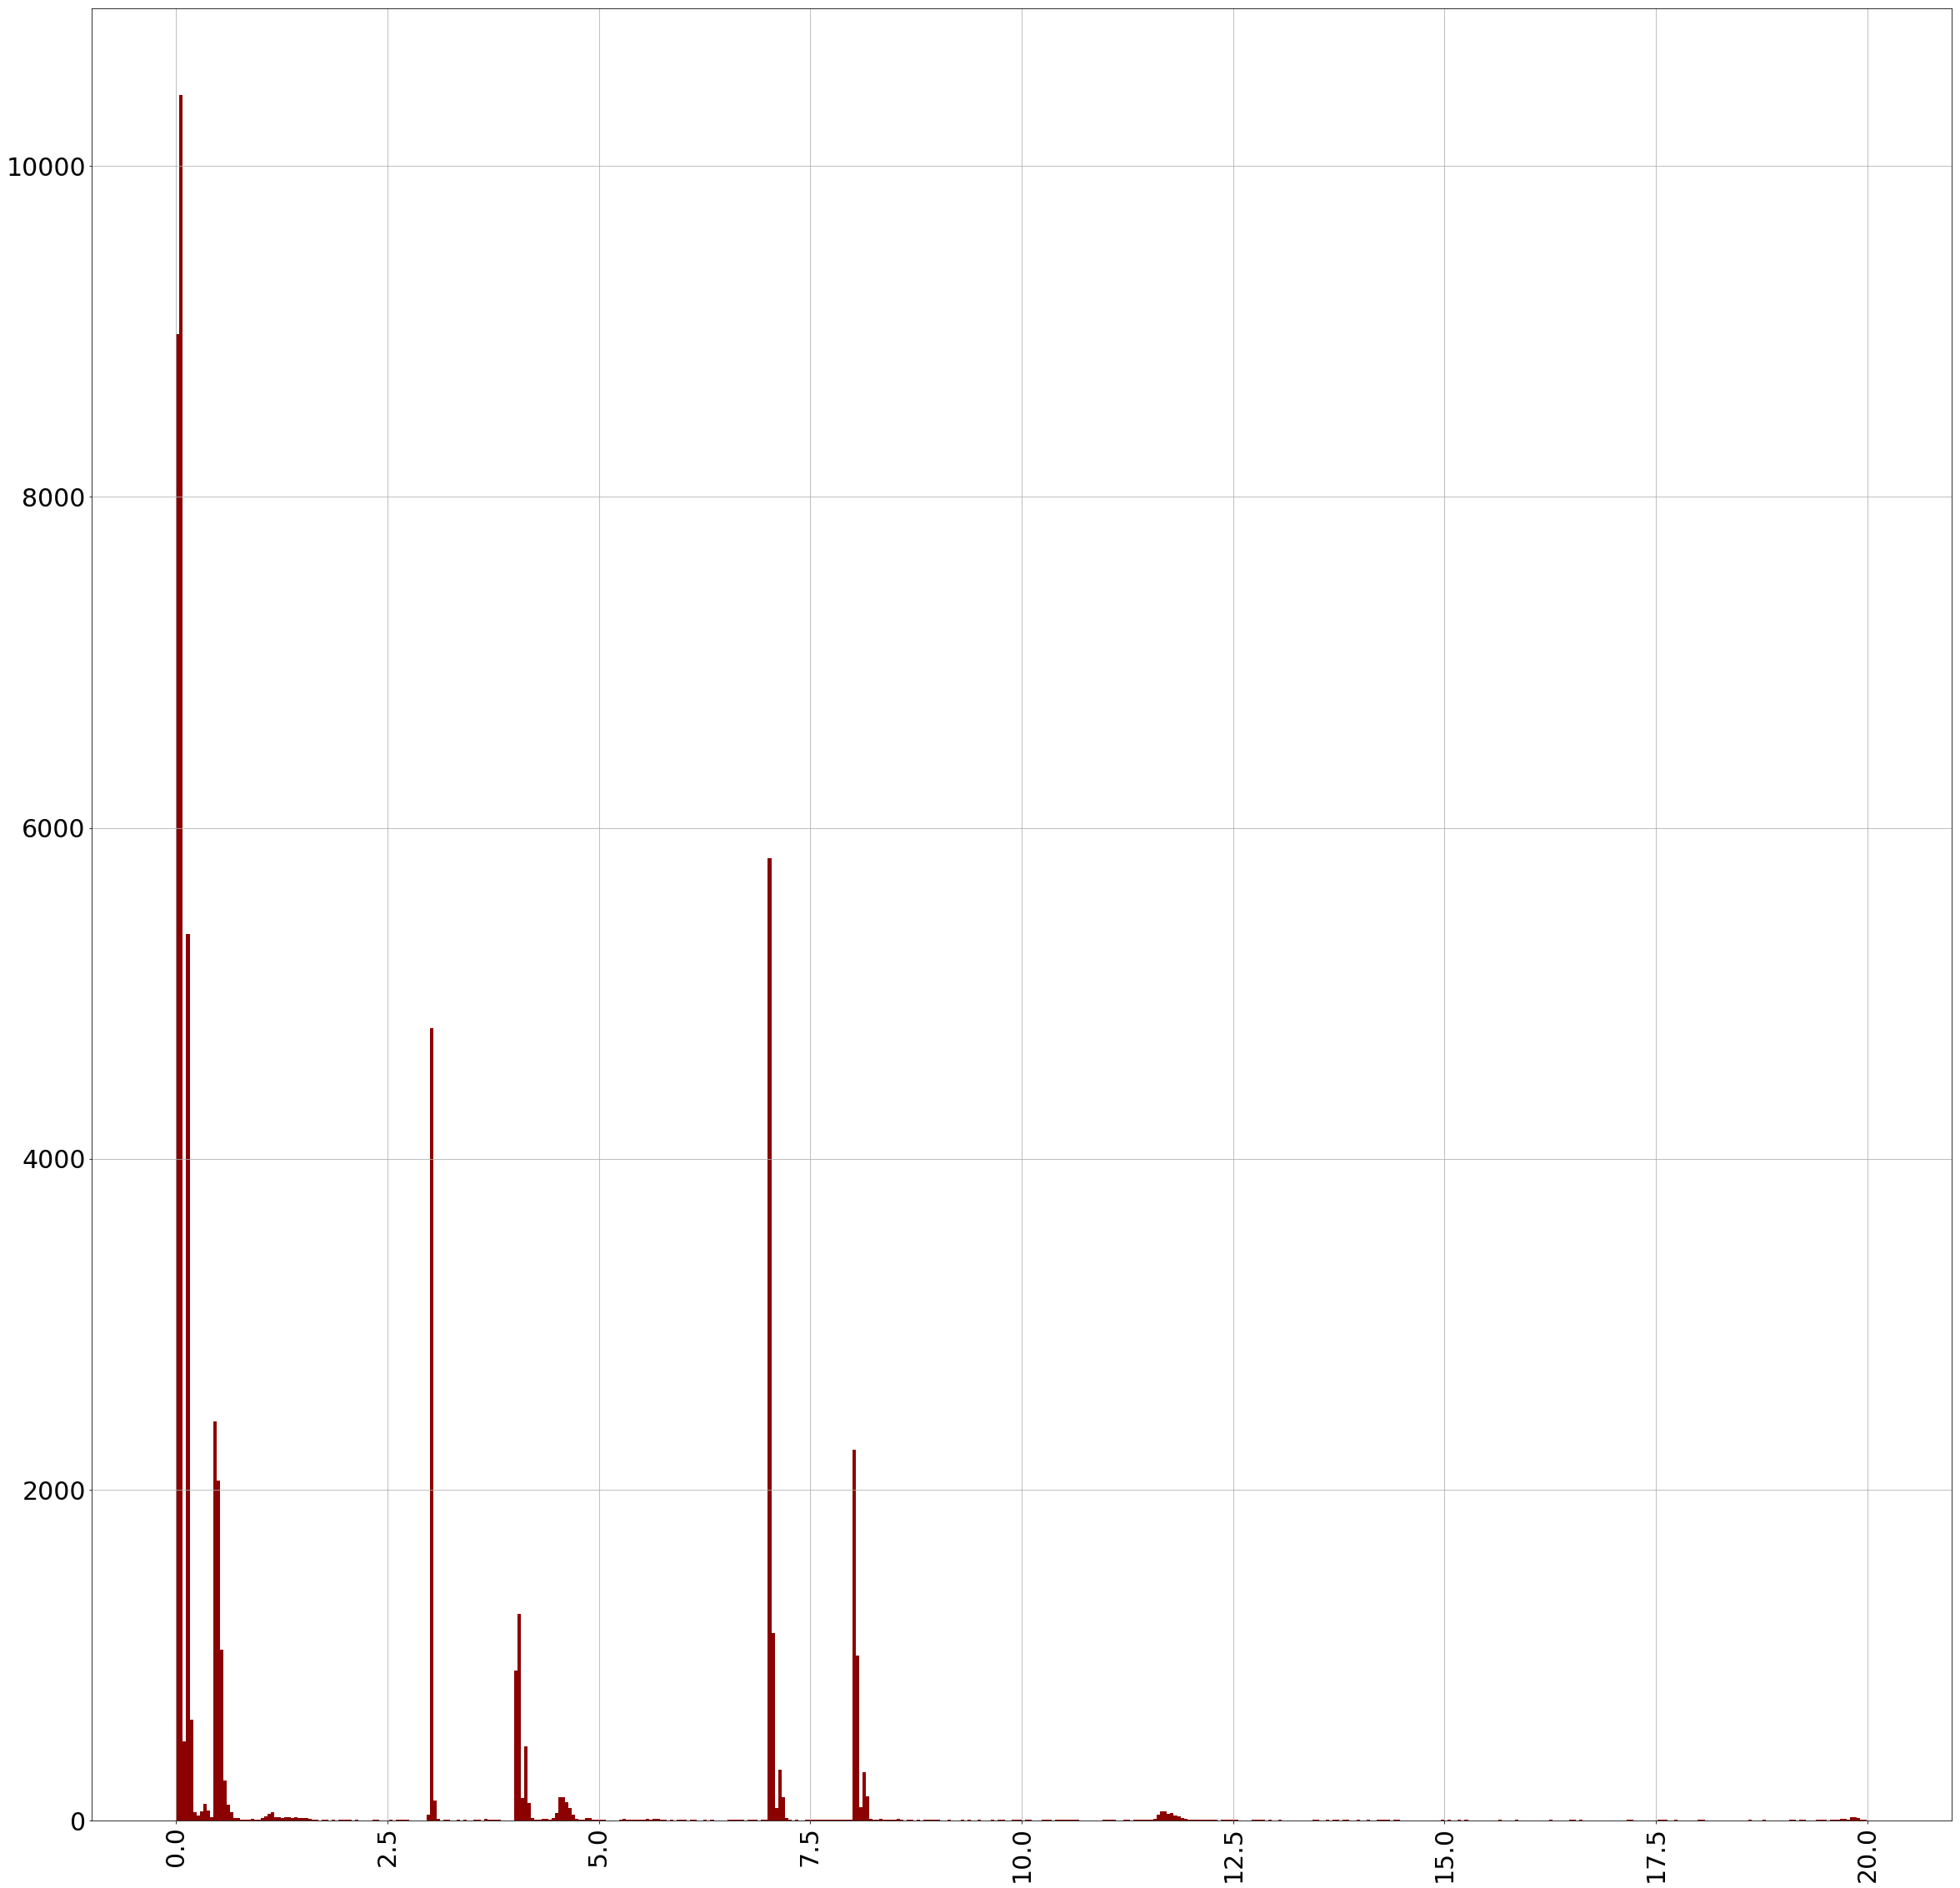

In [279]:
# Malware Duration Histogram, focused on flows with less than 20 seconds
ax = dropped_malware_dataset['Dur'][dropped_malware_dataset.Dur < 20].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30, bins=500, color='DarkRed')

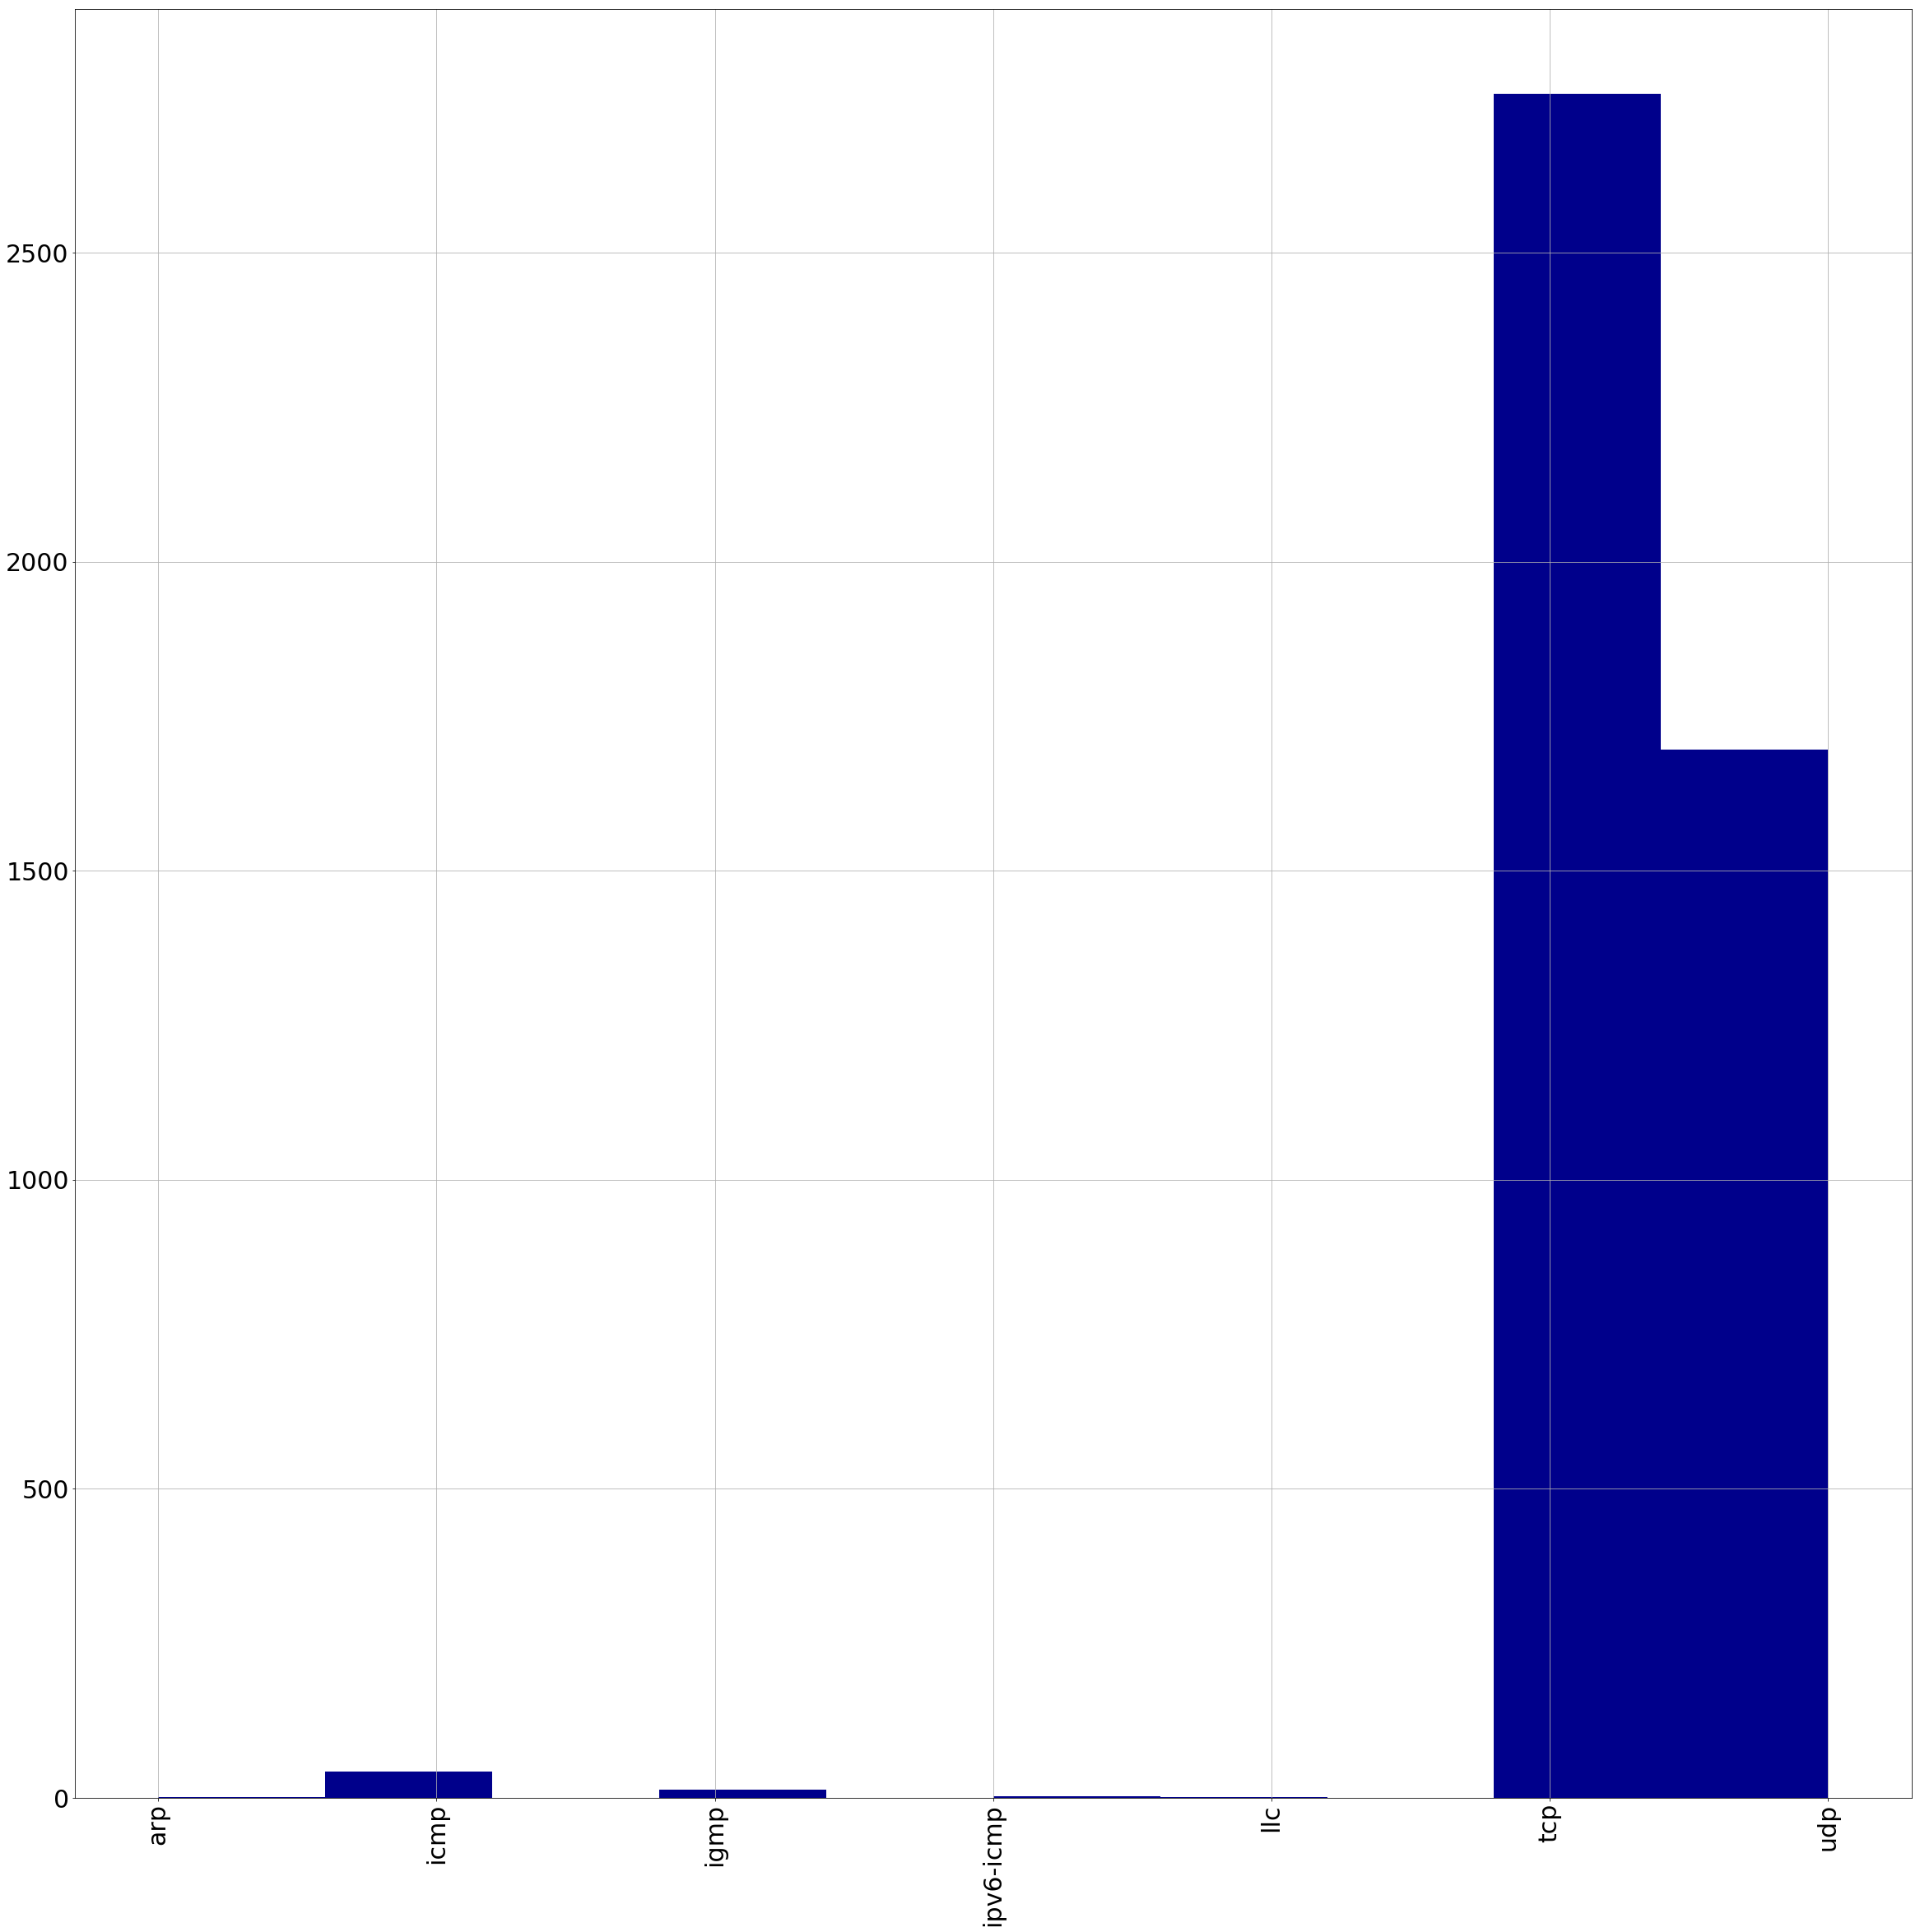

In [280]:
# Normal Protocol Histogram
dropped_normal_dataset['Proto'].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30, color='DarkBlue')

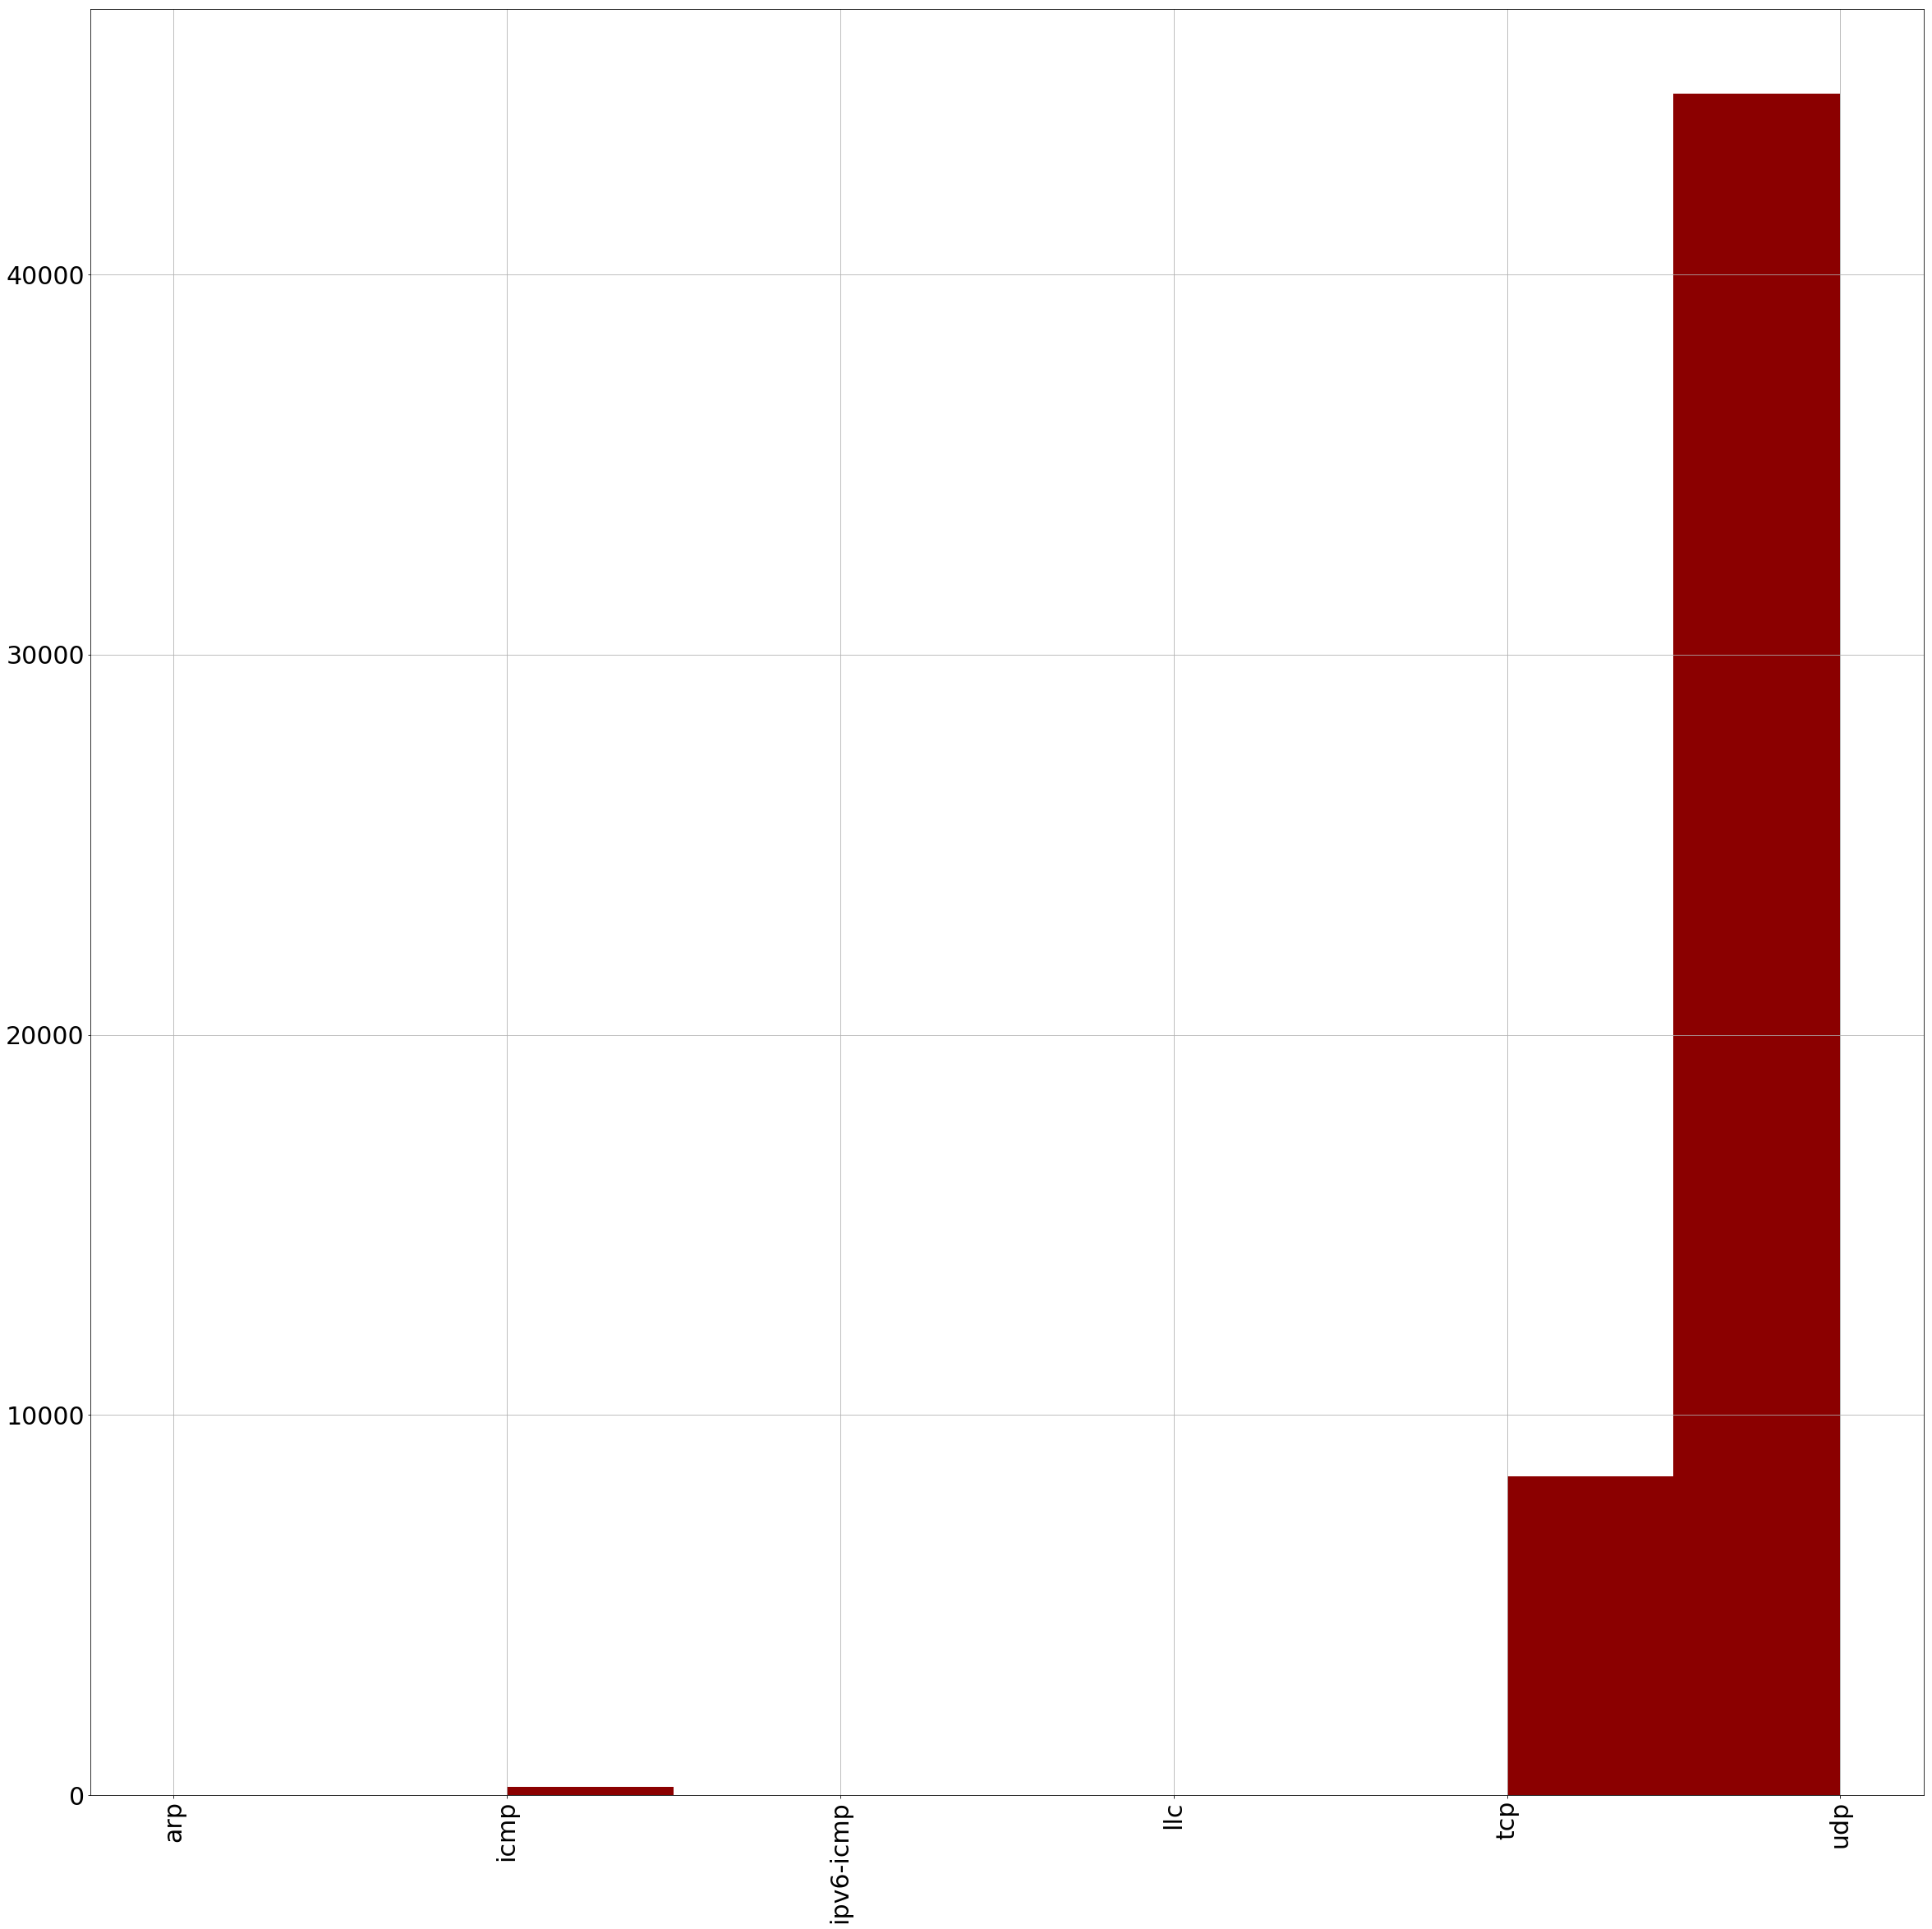

In [297]:
# Malware Protocol Histogram
dropped_malware_dataset['Proto'].hist(figsize=(40,40), xlabelsize=30, xrot=90, ylabelsize=30, color='DarkRed')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1716d8090>]]


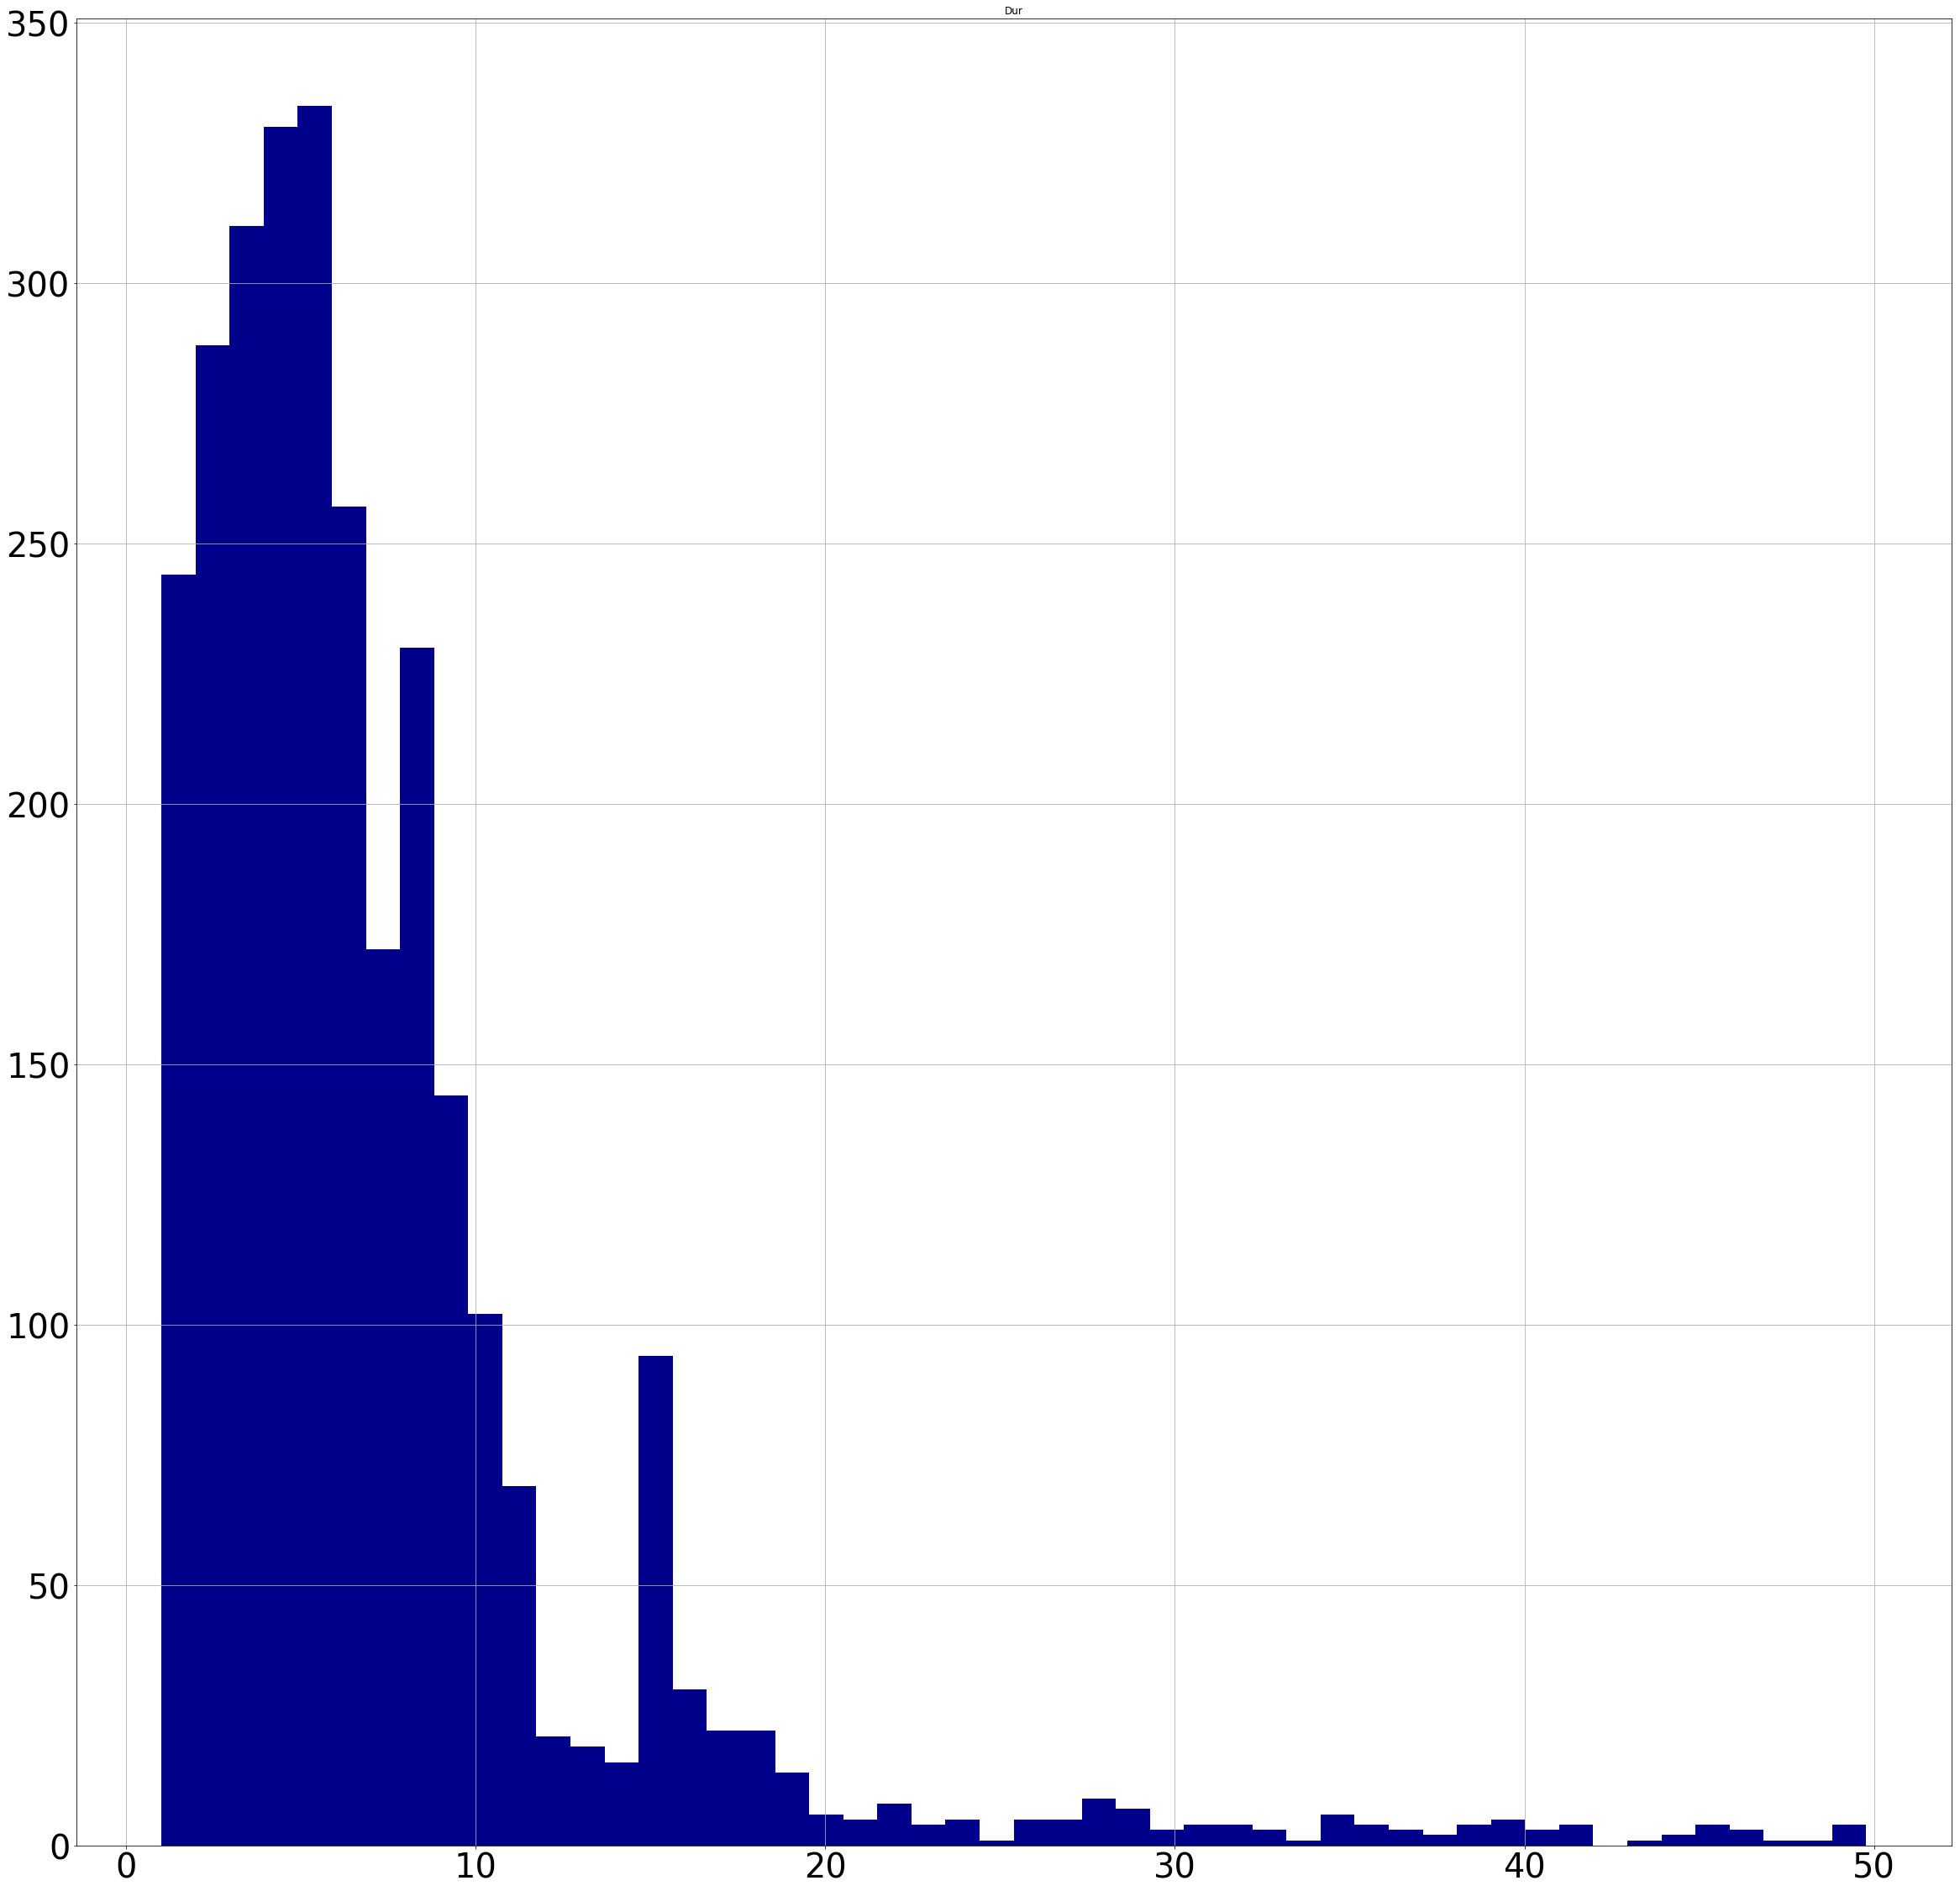

In [298]:
# Normal Duration Histogram
# If we want to analyze only the rows that have some restriction, such as Duration between 1 and 50
temp_small_dataset = dropped_normal_dataset[dropped_normal_dataset.Dur<50]
small_dataset = temp_small_dataset[temp_small_dataset.Dur>1]
print small_dataset.hist(column='Dur', figsize=(40,40), bins=50, xlabelsize=40, ylabelsize=40, color='DarkBlue')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x172e5b550>]]


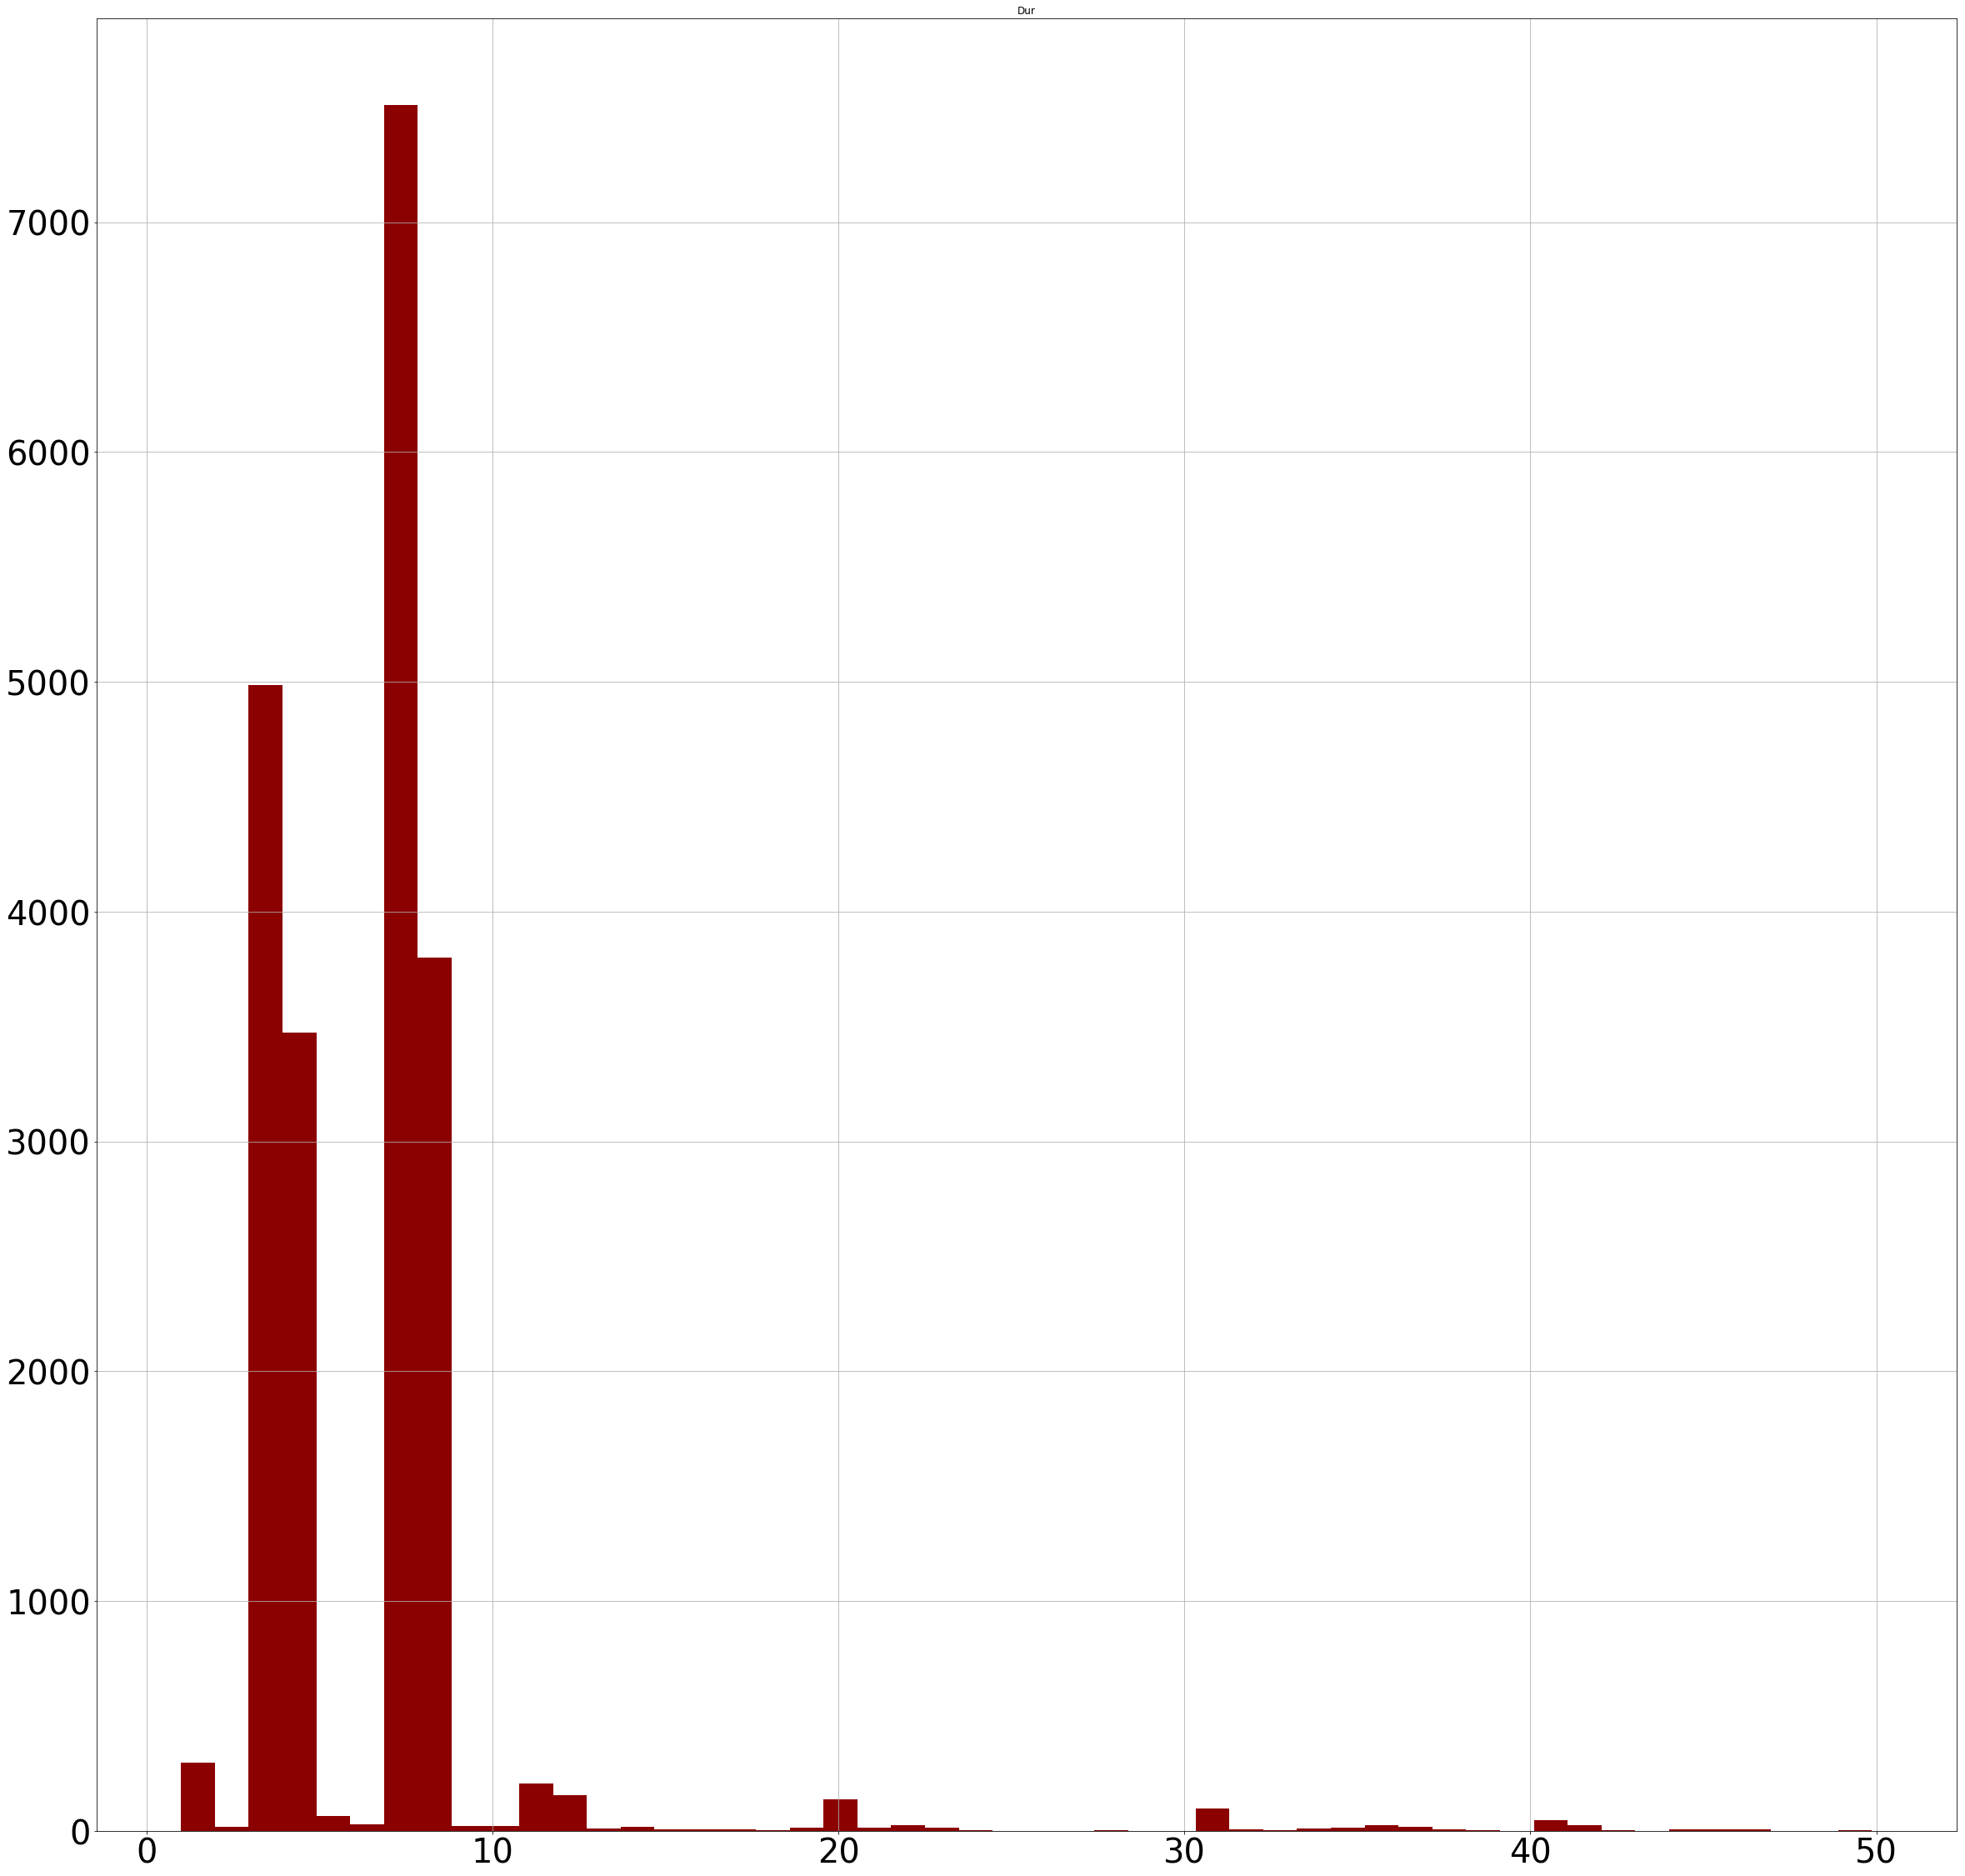

In [299]:
# Malware Duration Histogram
# If we want to analyze only the rows that have some restriction, such as Duration between 1 and 50
temp_small_dataset = dropped_malware_dataset[dropped_malware_dataset.Dur<50]
small_dataset = temp_small_dataset[temp_small_dataset.Dur>1]
print small_dataset.hist(column='Dur', figsize=(40,40), bins=50, xlabelsize=40, ylabelsize=40, color='DarkRed')

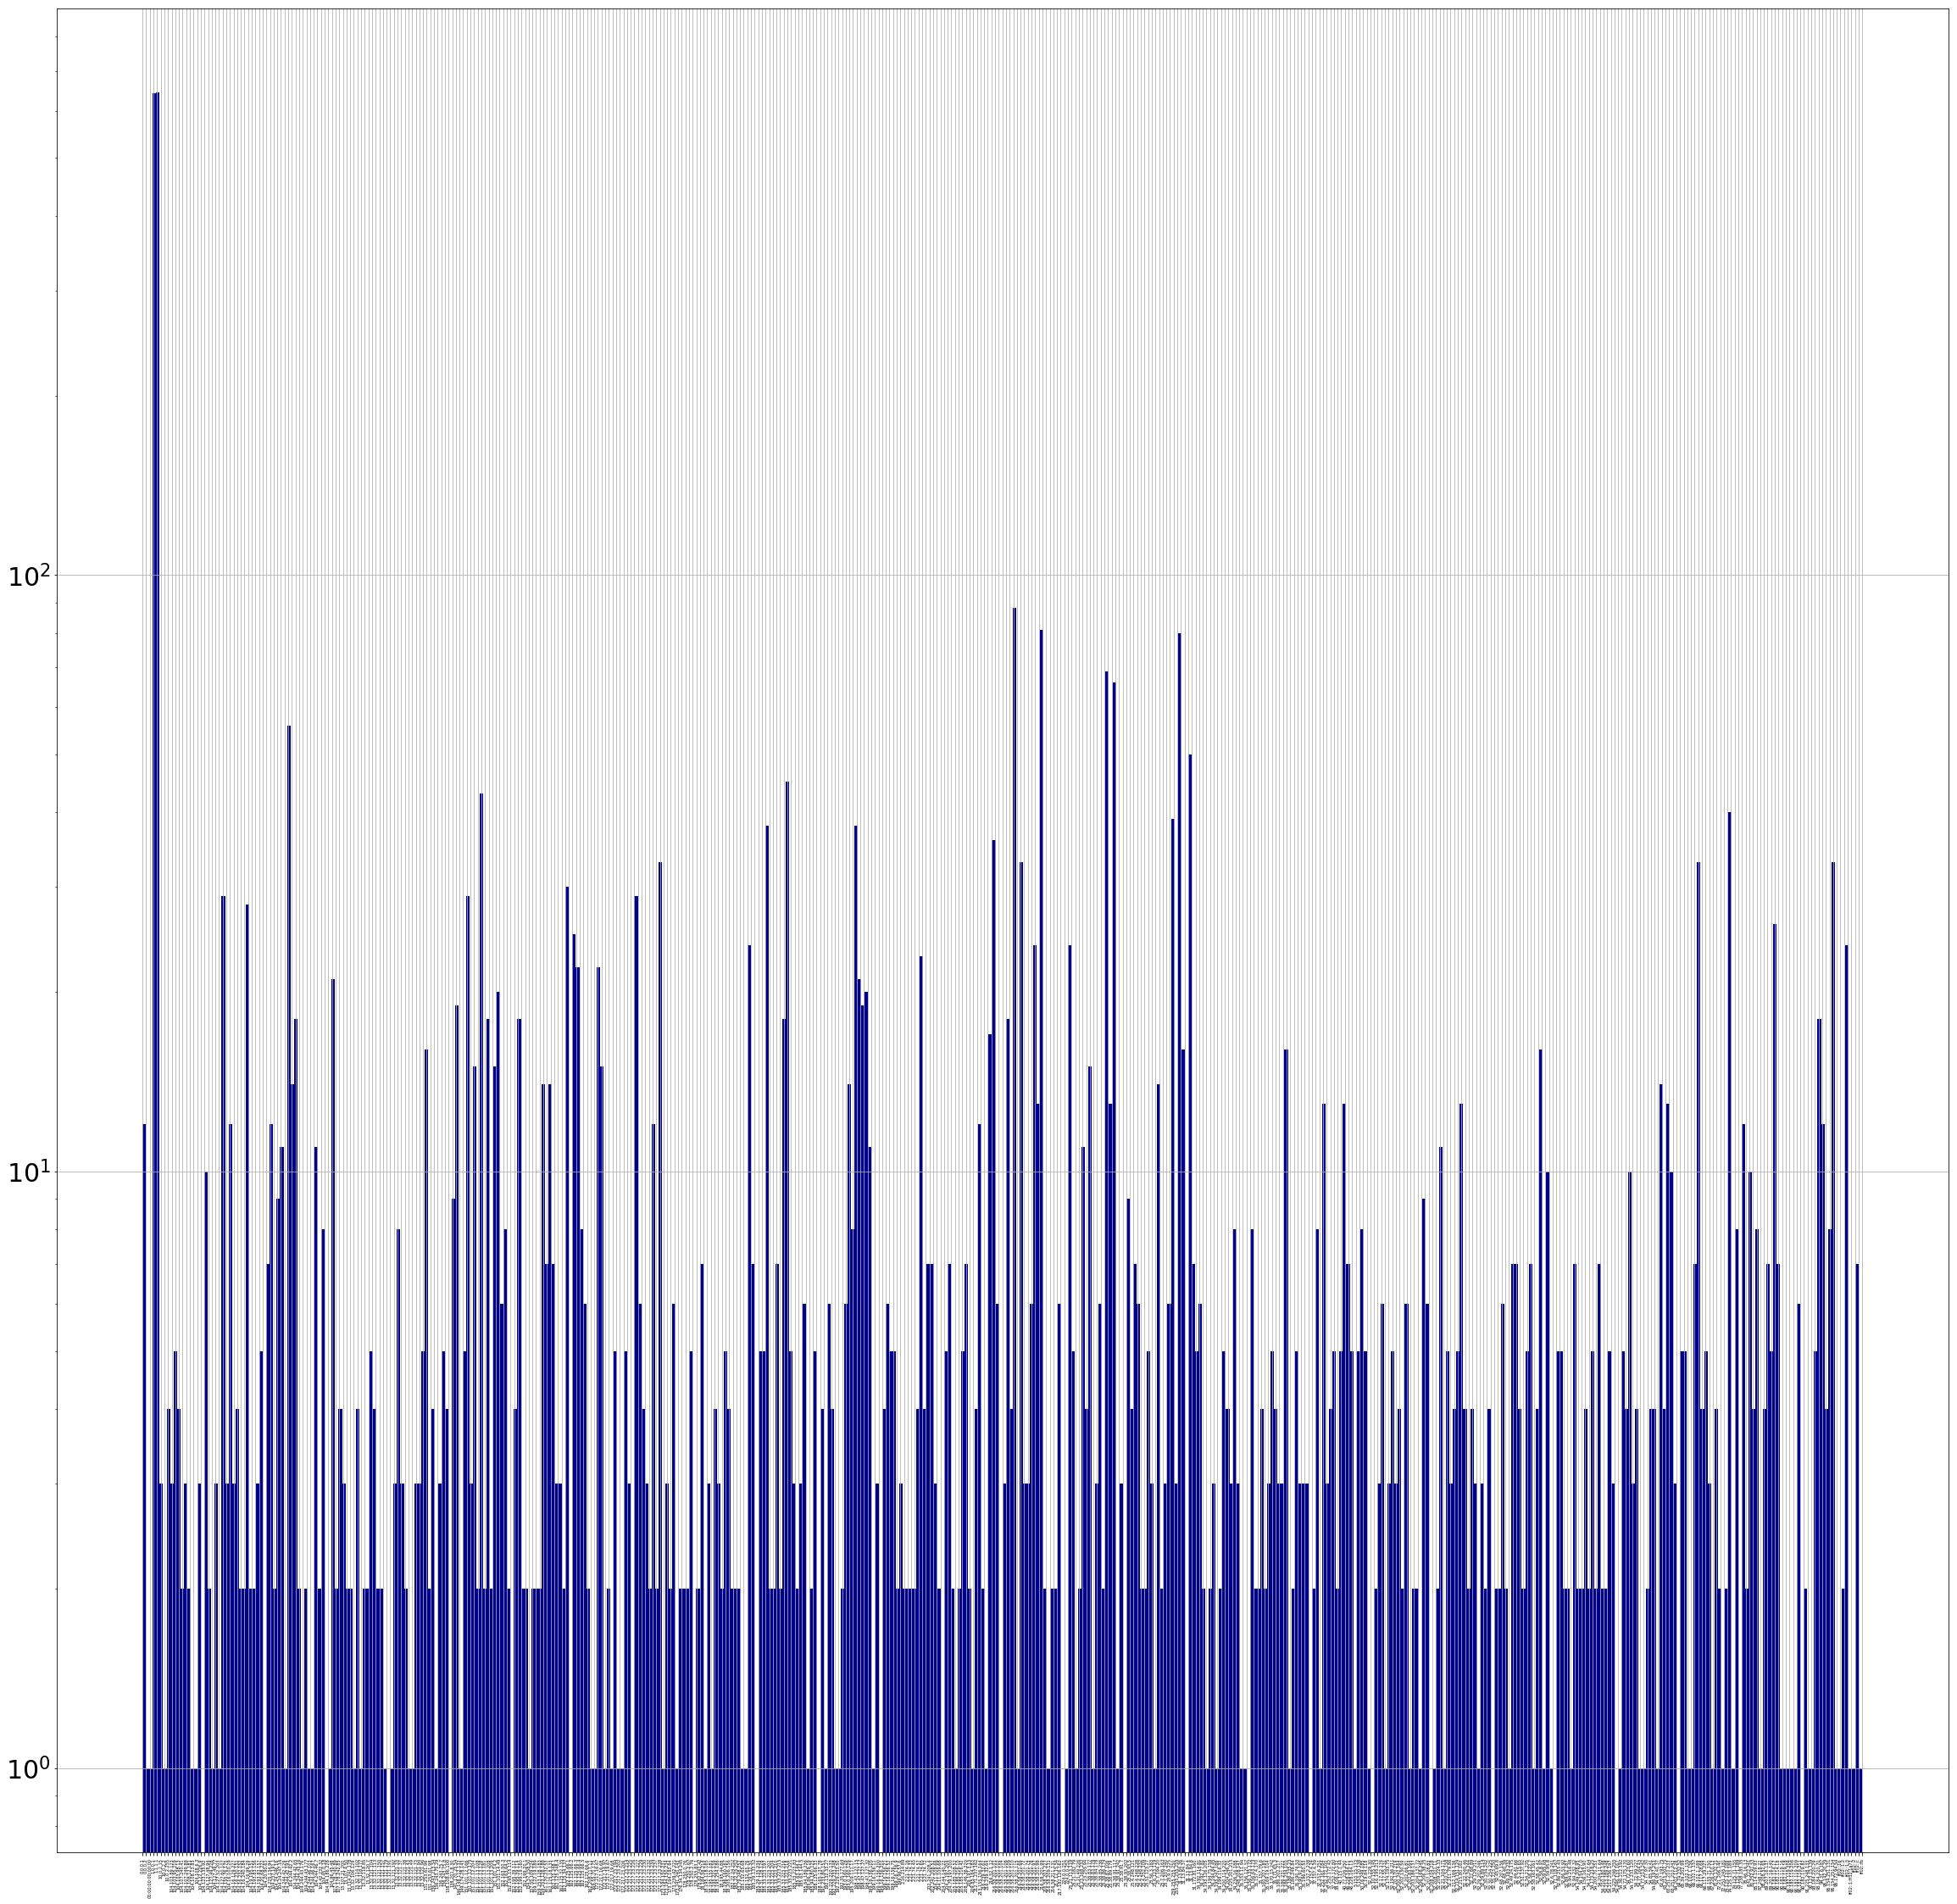

In [287]:
# DstAddr Histogram Normal
ax = dropped_normal_dataset['DstAddr'].hist(figsize=(40,40), xlabelsize=5, xrot=90, ylabelsize=30, bins=500, color='DarkBlue')
# Log scale because the are too many differences in the count
ax.set_yscale('log')

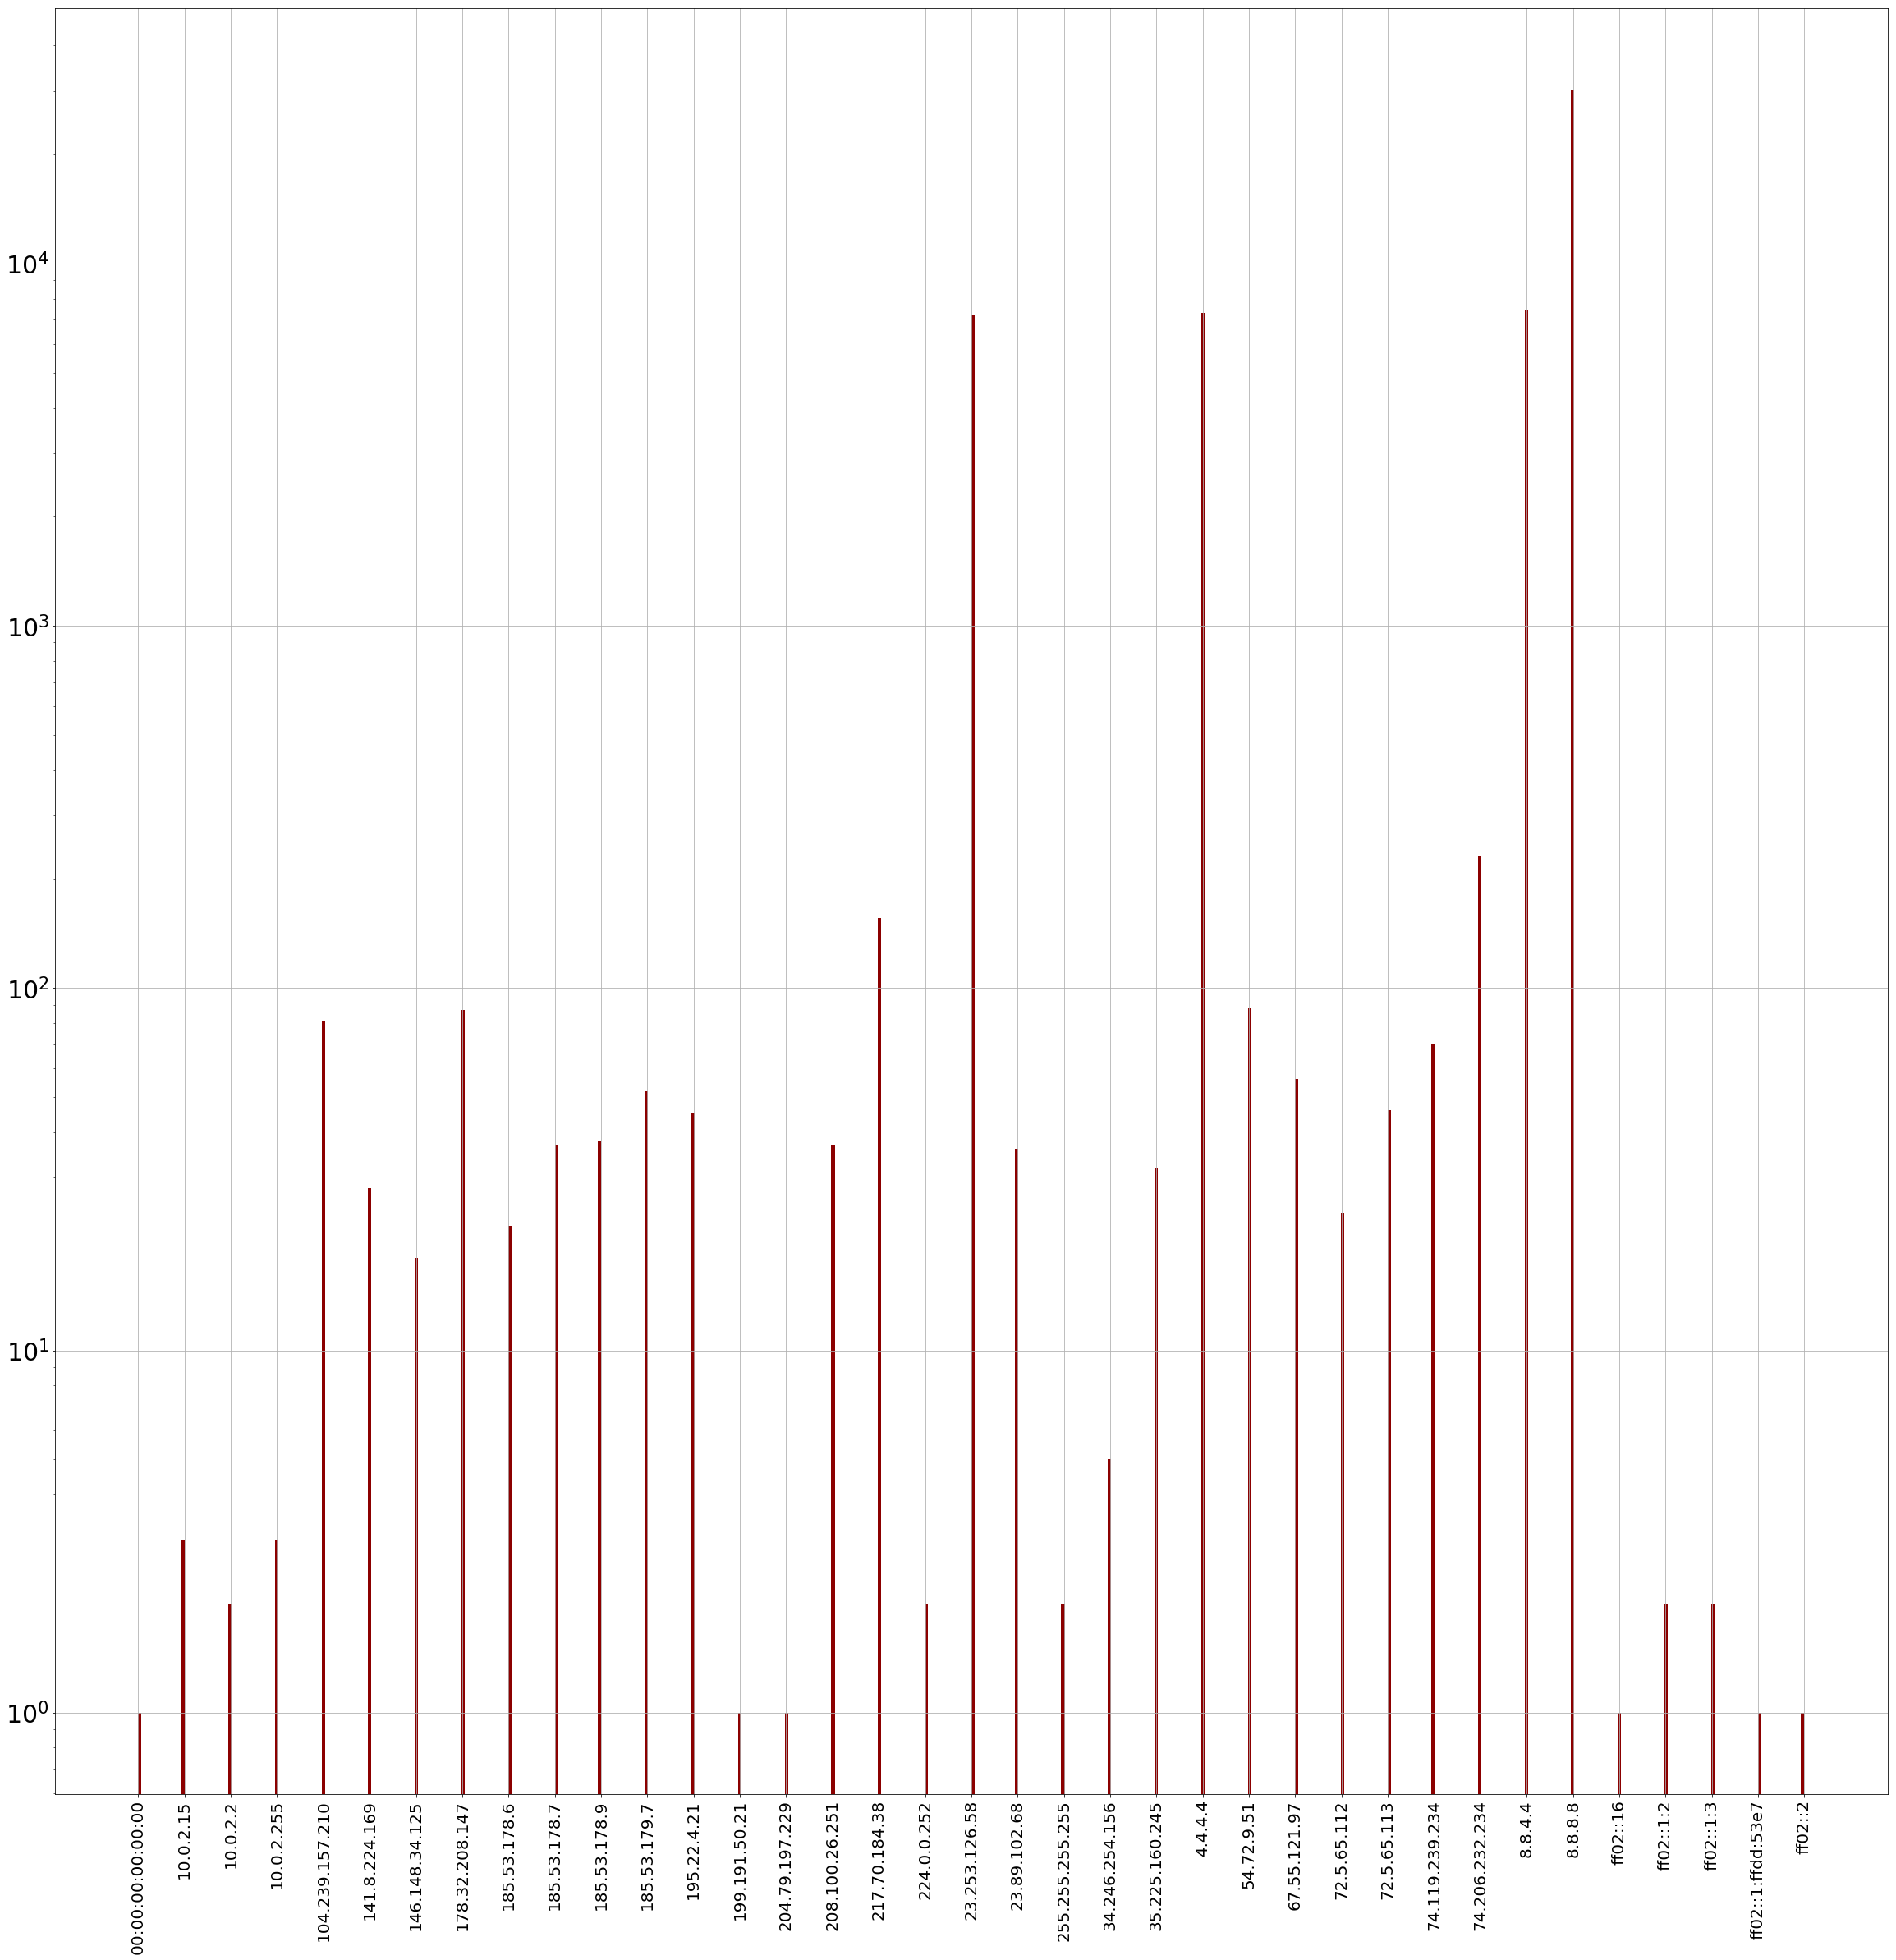

In [302]:
# DstAddr Histogram Normal
ax = dropped_malware_dataset['DstAddr'].hist(figsize=(40,40), xlabelsize=20, xrot=90, ylabelsize=30, bins=500, color='DarkRed')
# Log scale because the are too many differences in the count
ax.set_yscale('log')

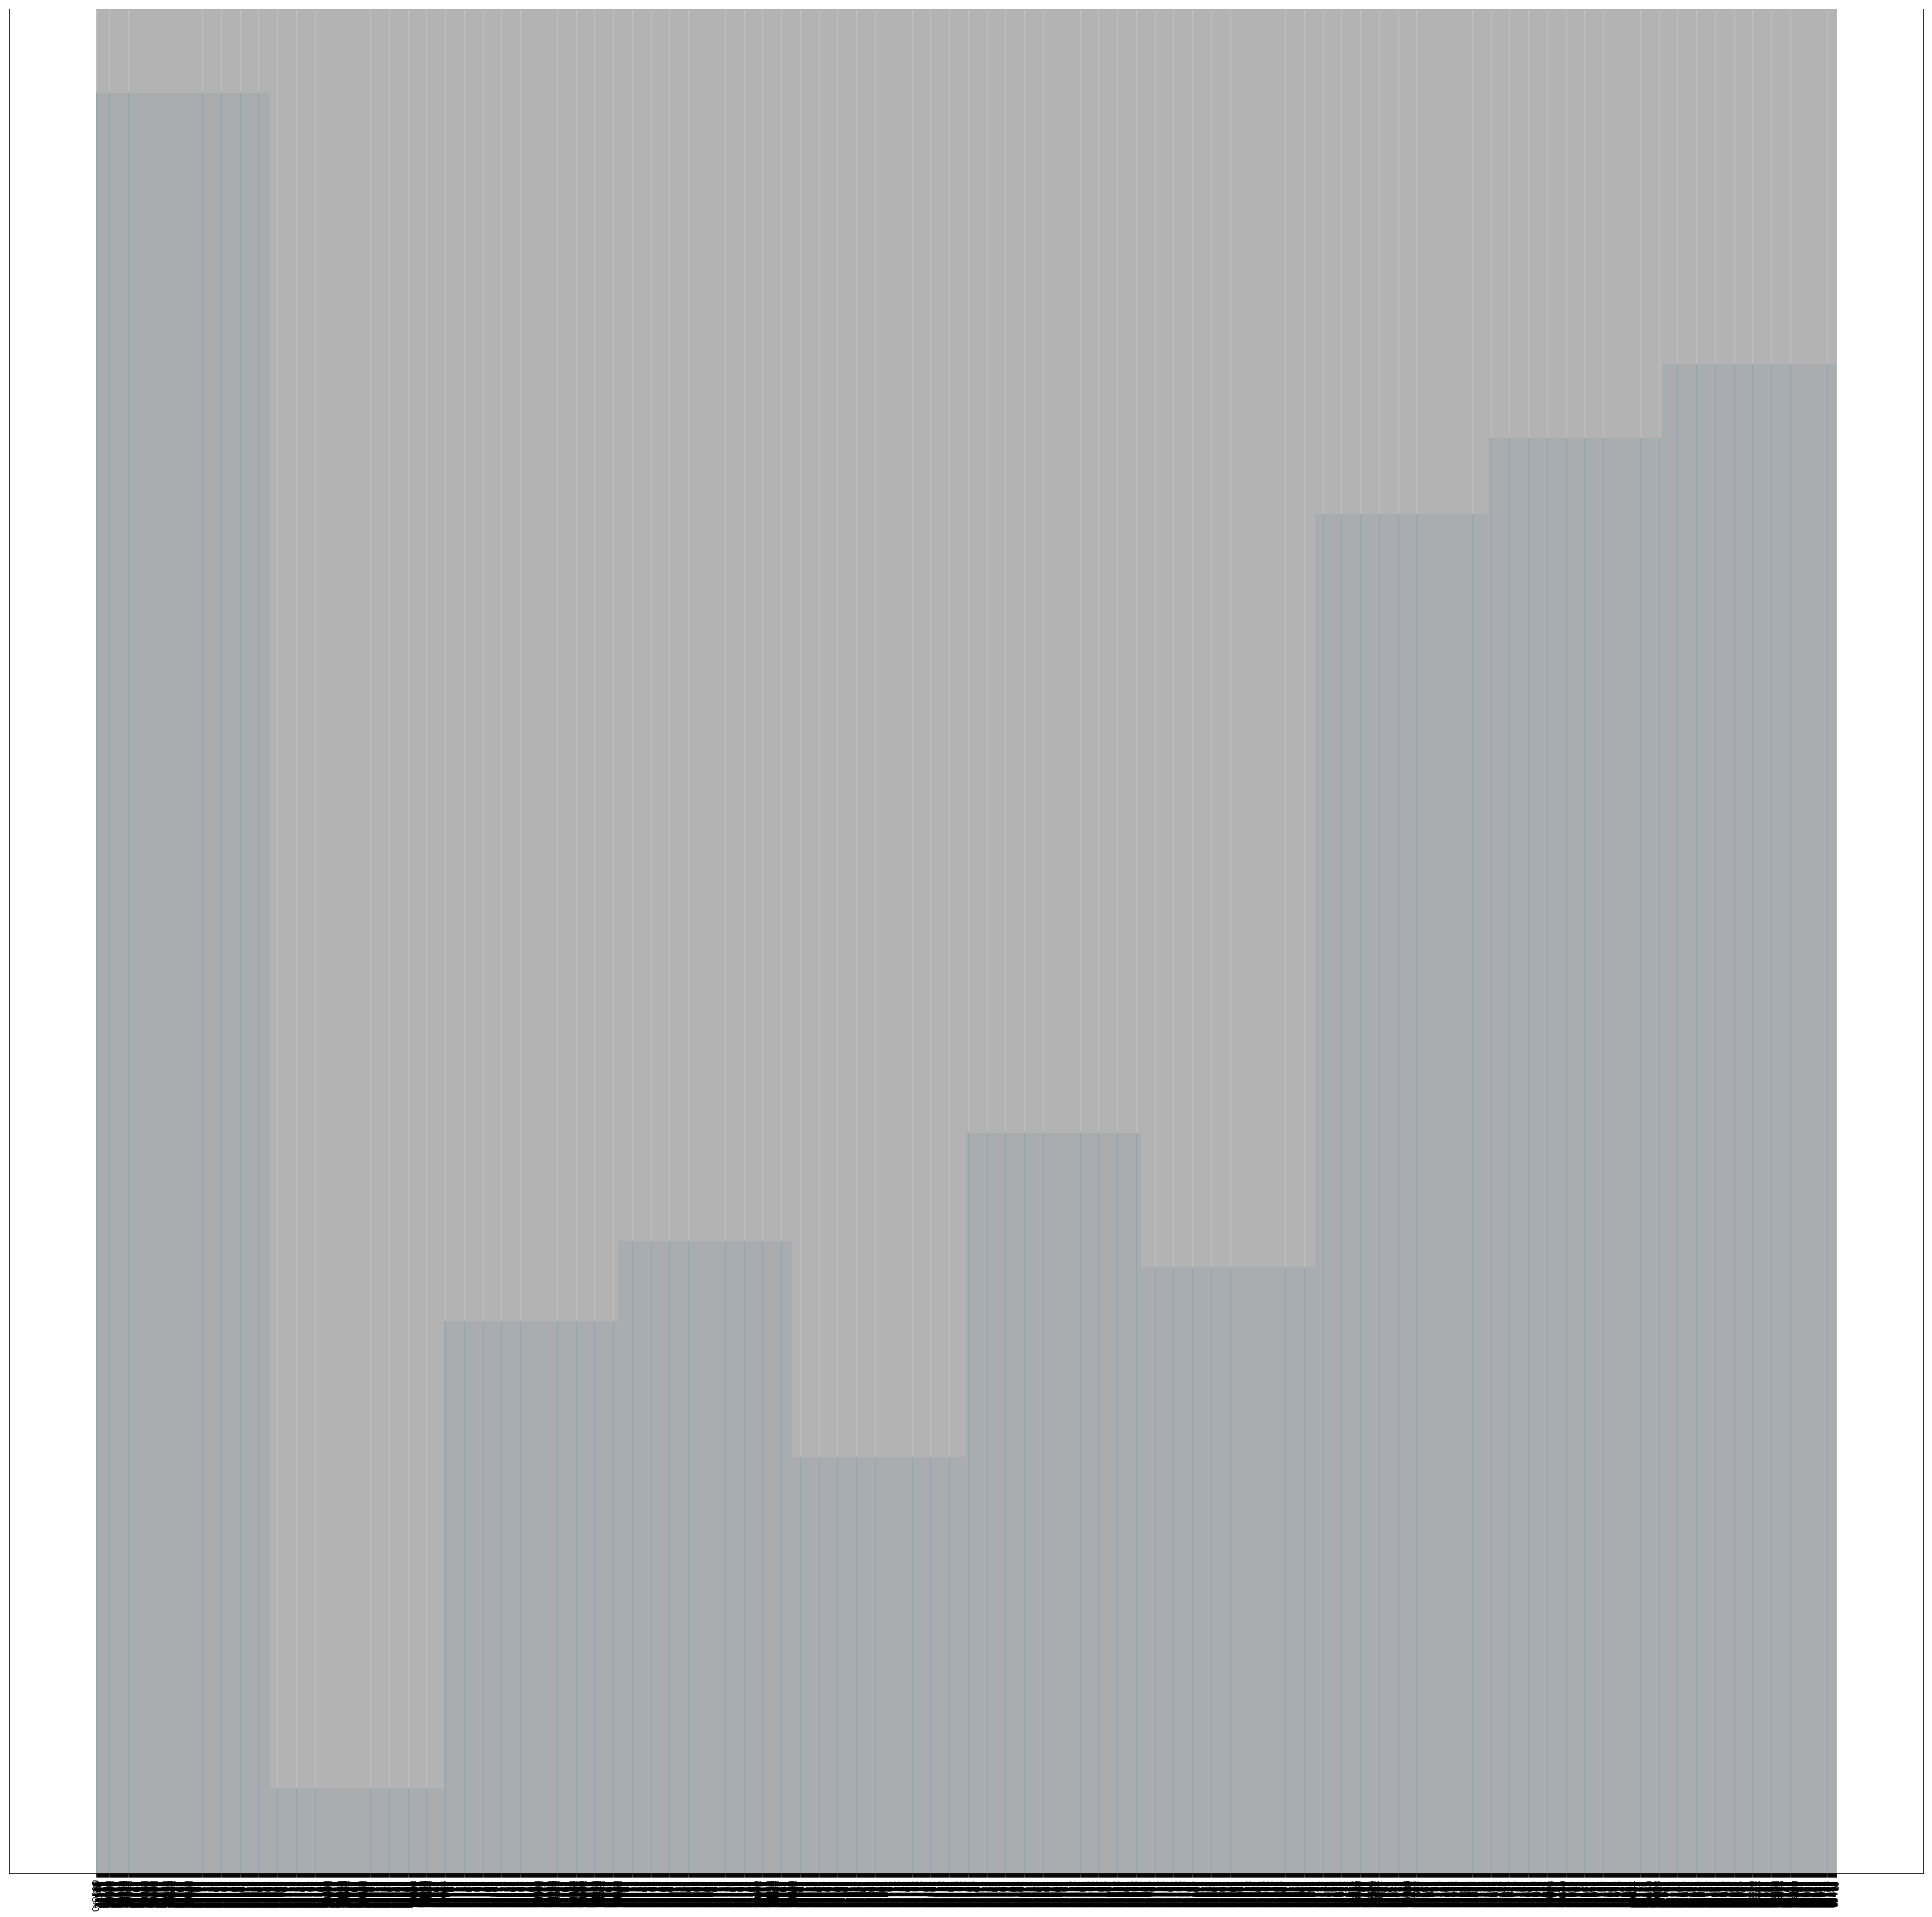

In [269]:
# Normal Sport Histogram
ax = dropped_normal_dataset['Sport'].hist(figsize=(40,40), bins=10, xlabelsize=10, ylabelsize=50, xrot=90)
ax.set_yscale('log')

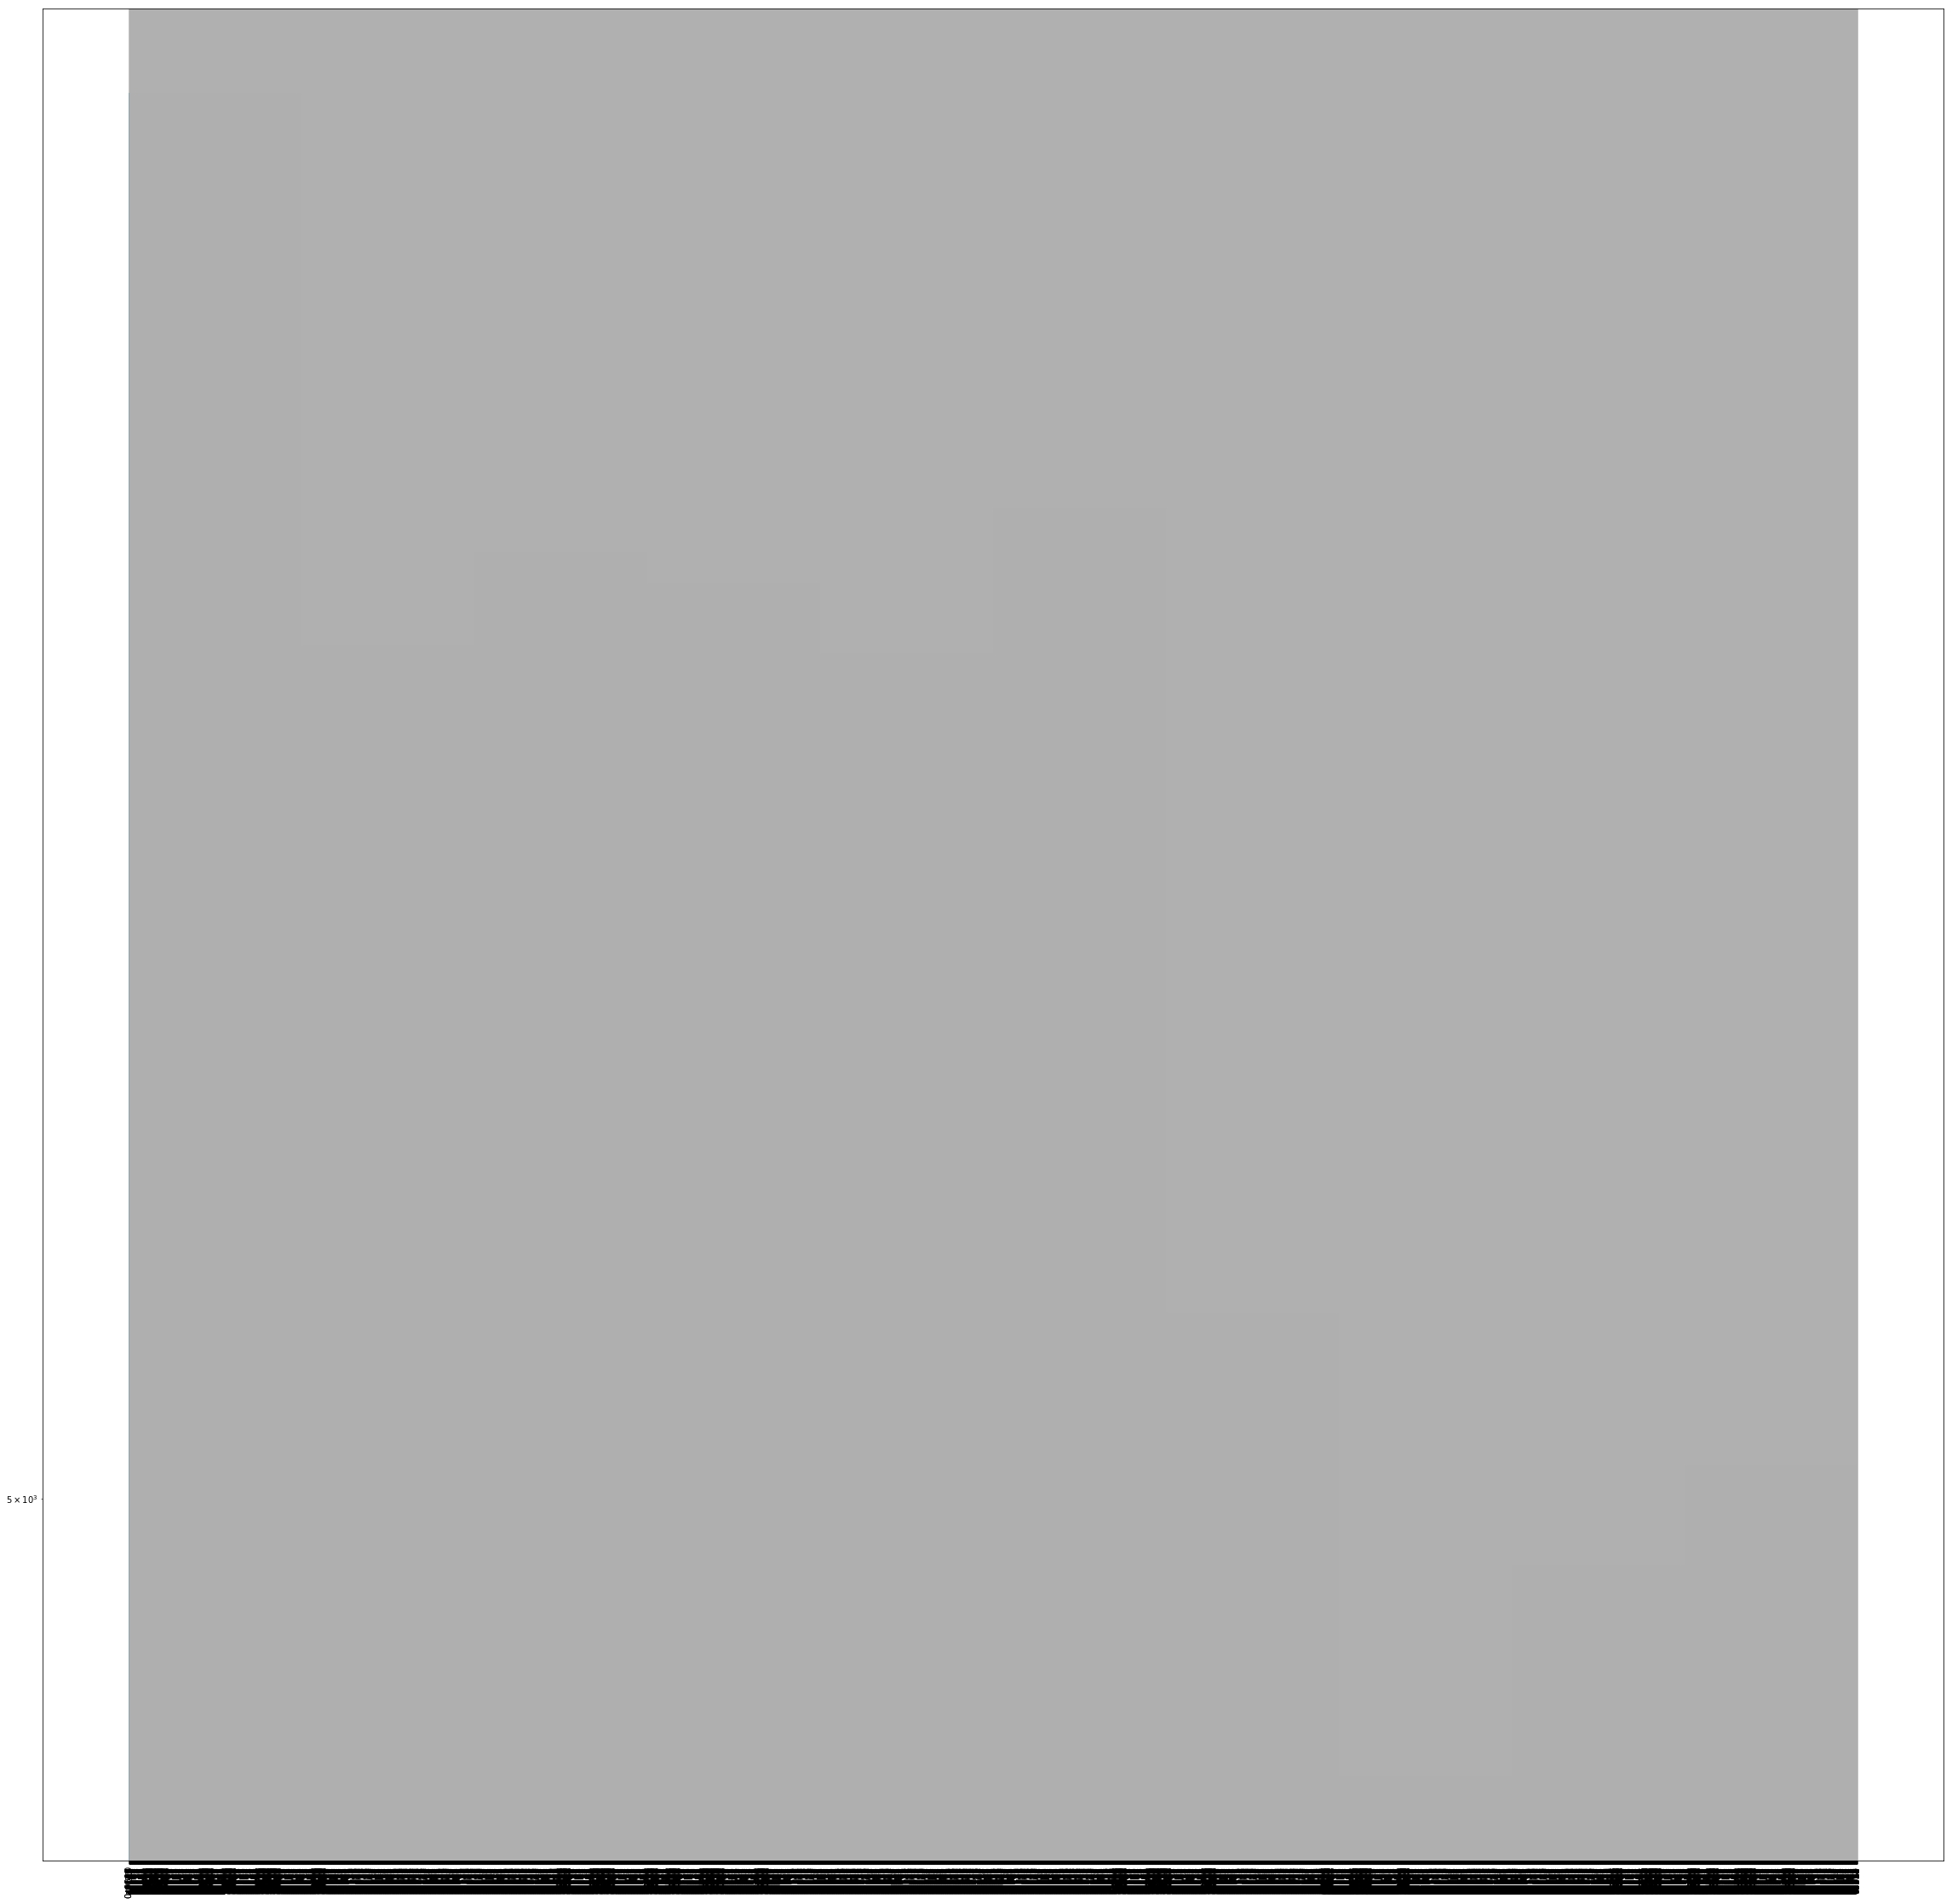

In [303]:
# Malware Sport Histogram
ax = dropped_malware_dataset['Sport'].hist(figsize=(40,40), bins=10, xlabelsize=10, ylabelsize=50, xrot=90)
ax.set_yscale('log')

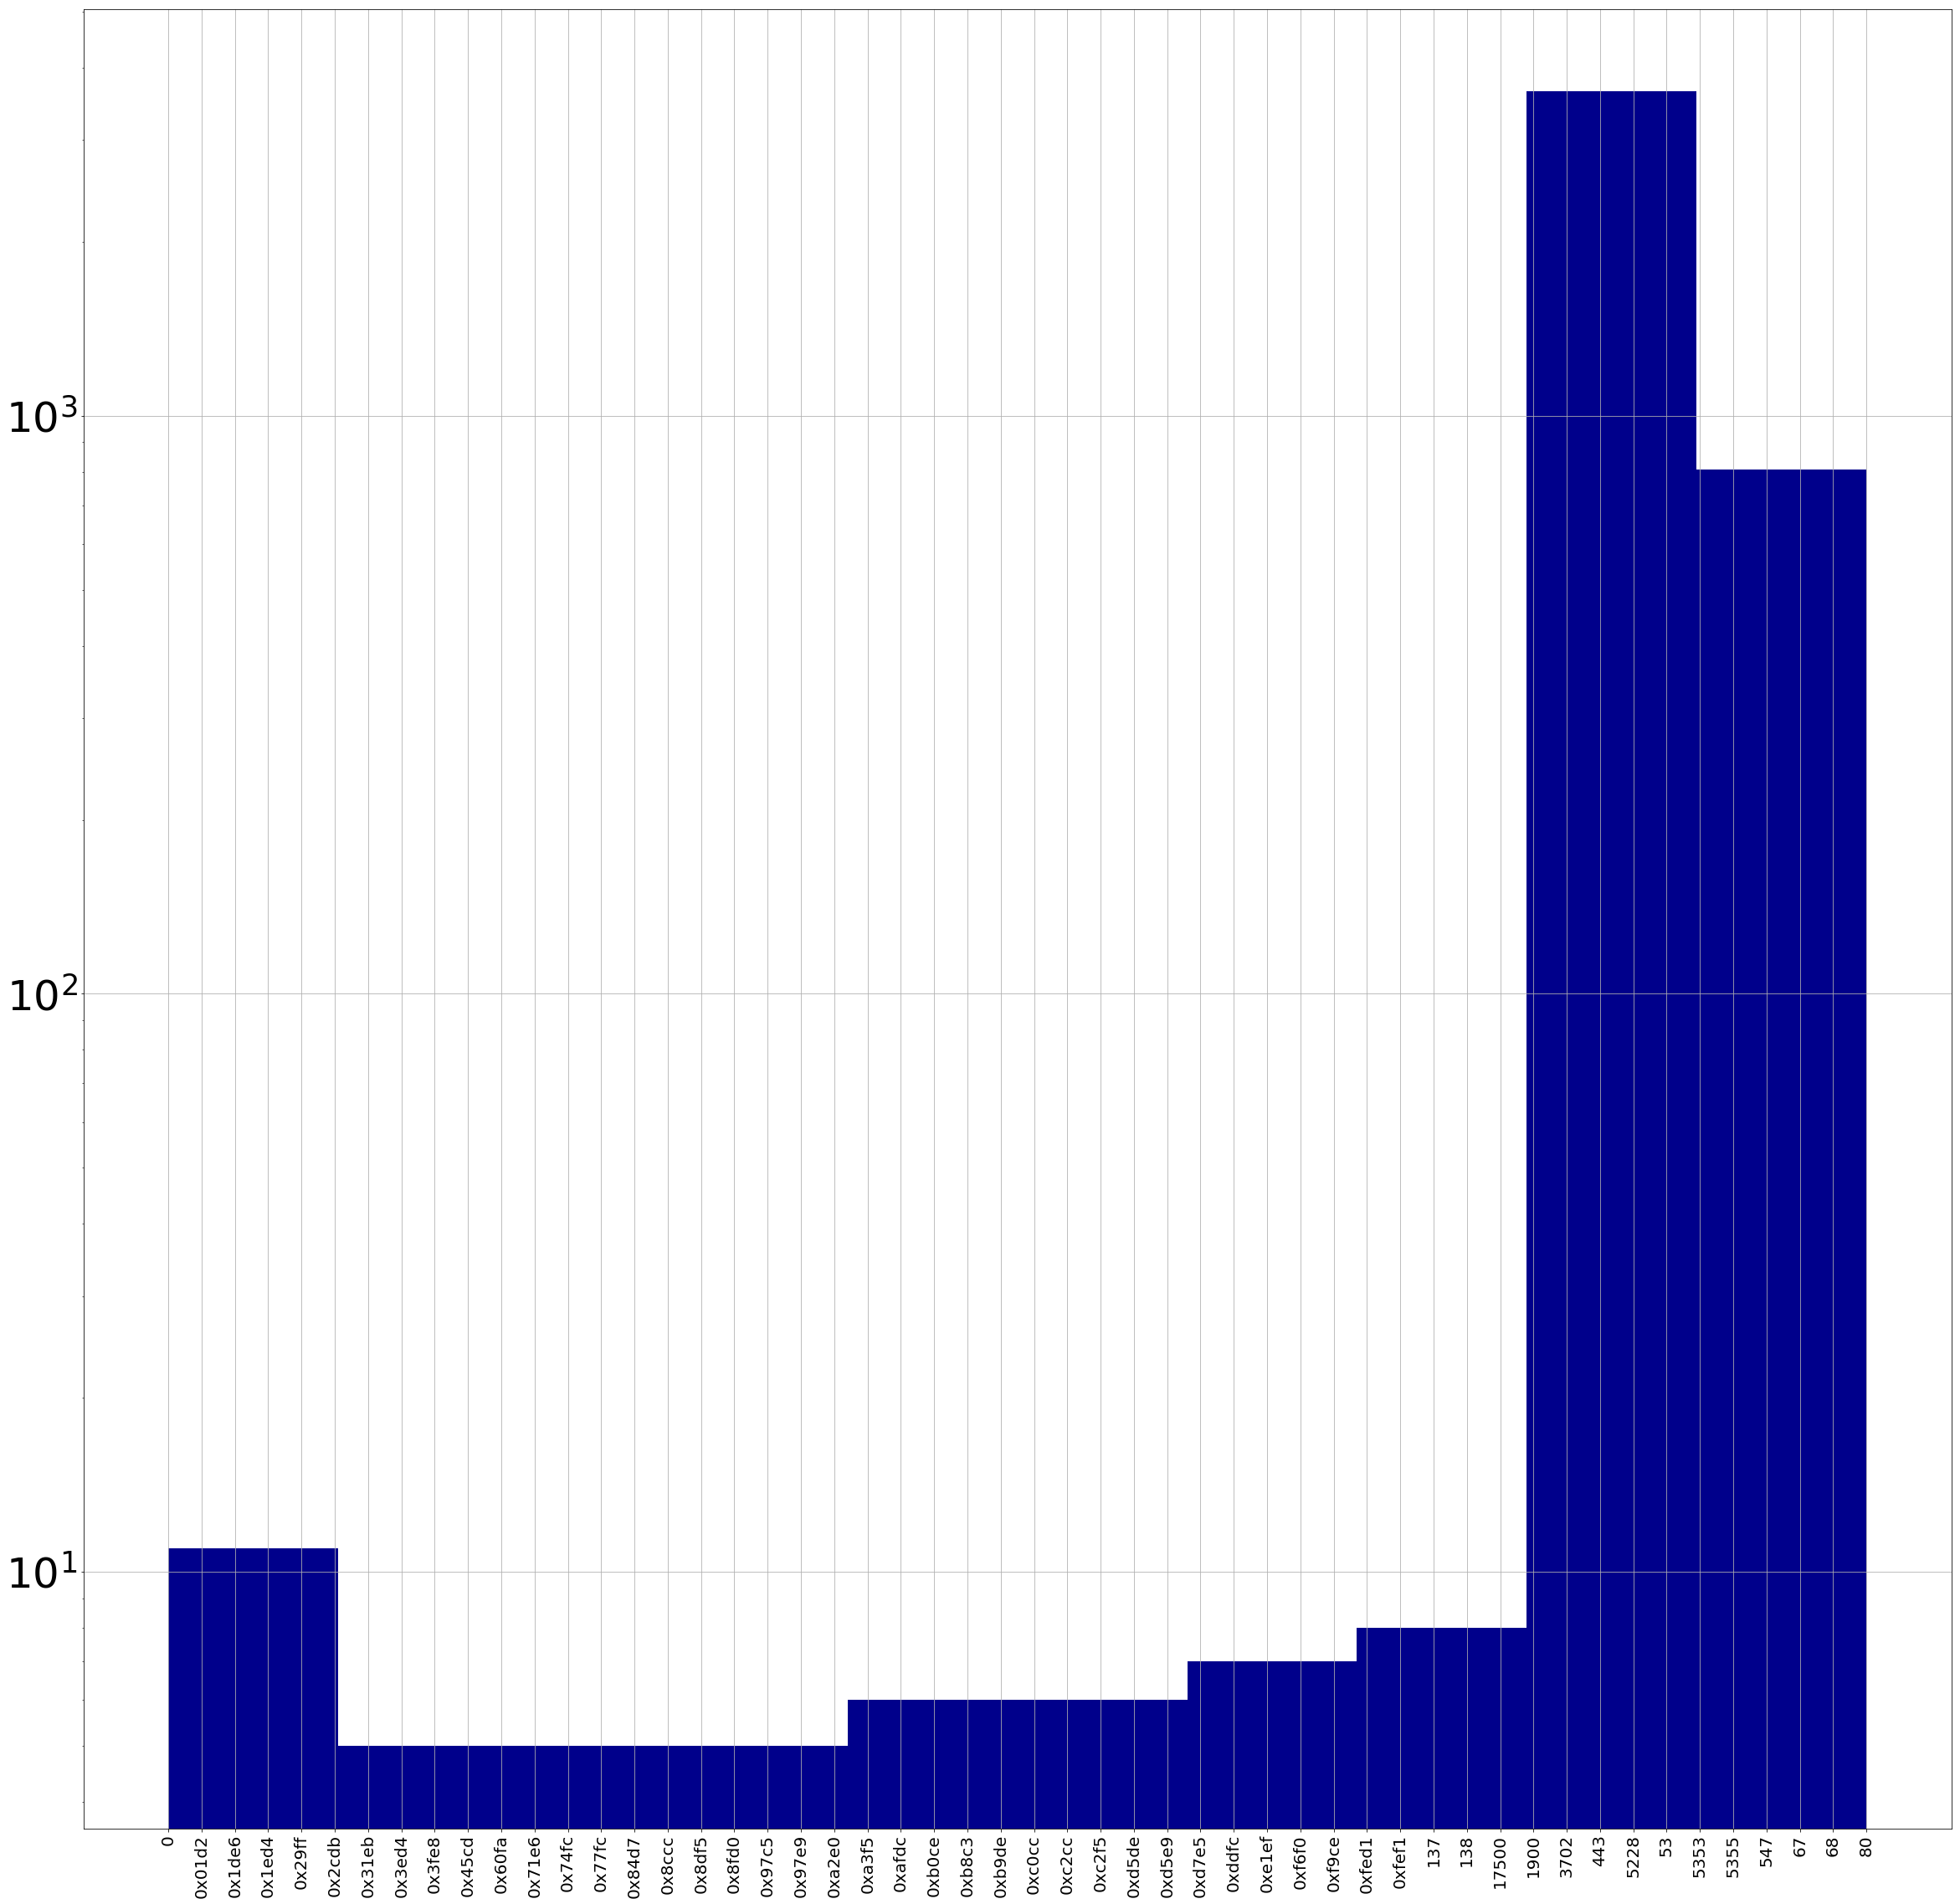

In [288]:
# Normal Dport Histogram
ax = dropped_normal_dataset['Dport'].hist(figsize=(40,40), bins=10, xlabelsize=20, ylabelsize=50, xrot=90, color='DarkBlue')
ax.set_yscale('log')

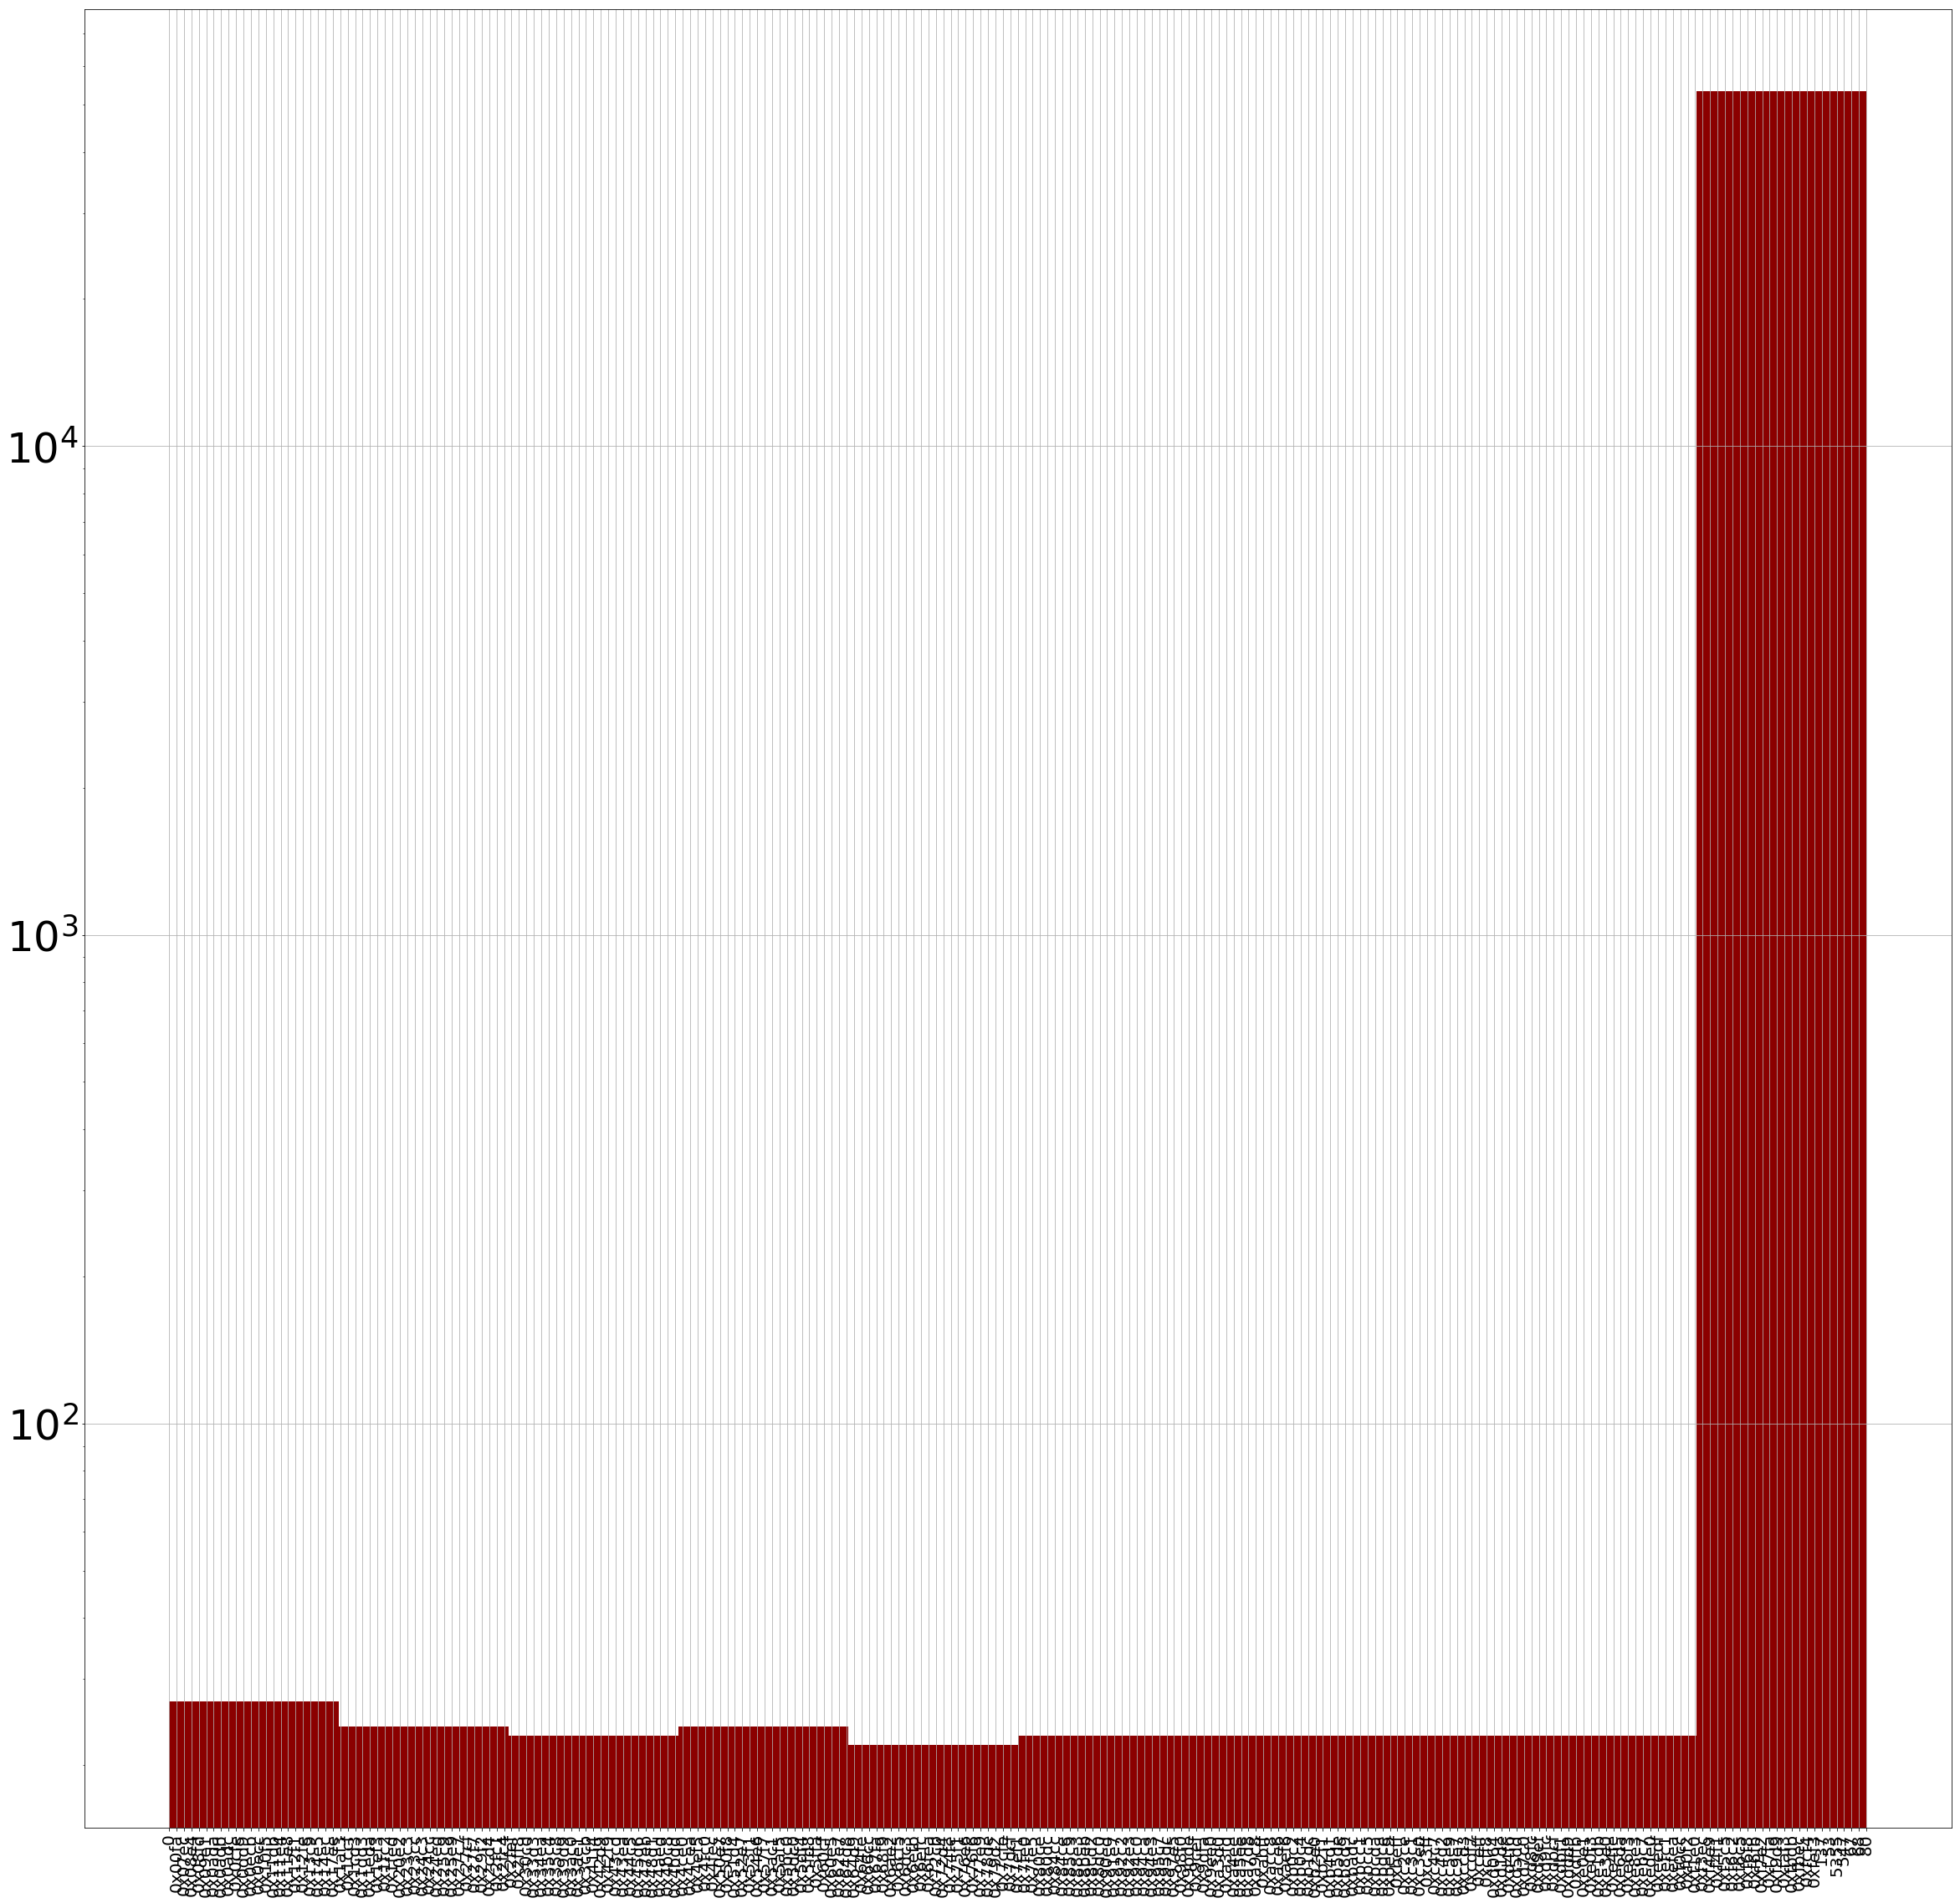

In [307]:
# Malware Dport Histogram
ax = dropped_malware_dataset['Dport'].hist(figsize=(40,40), bins=10, xlabelsize=20, ylabelsize=50, xrot=90, color='DarkRed')
ax.set_yscale('log')

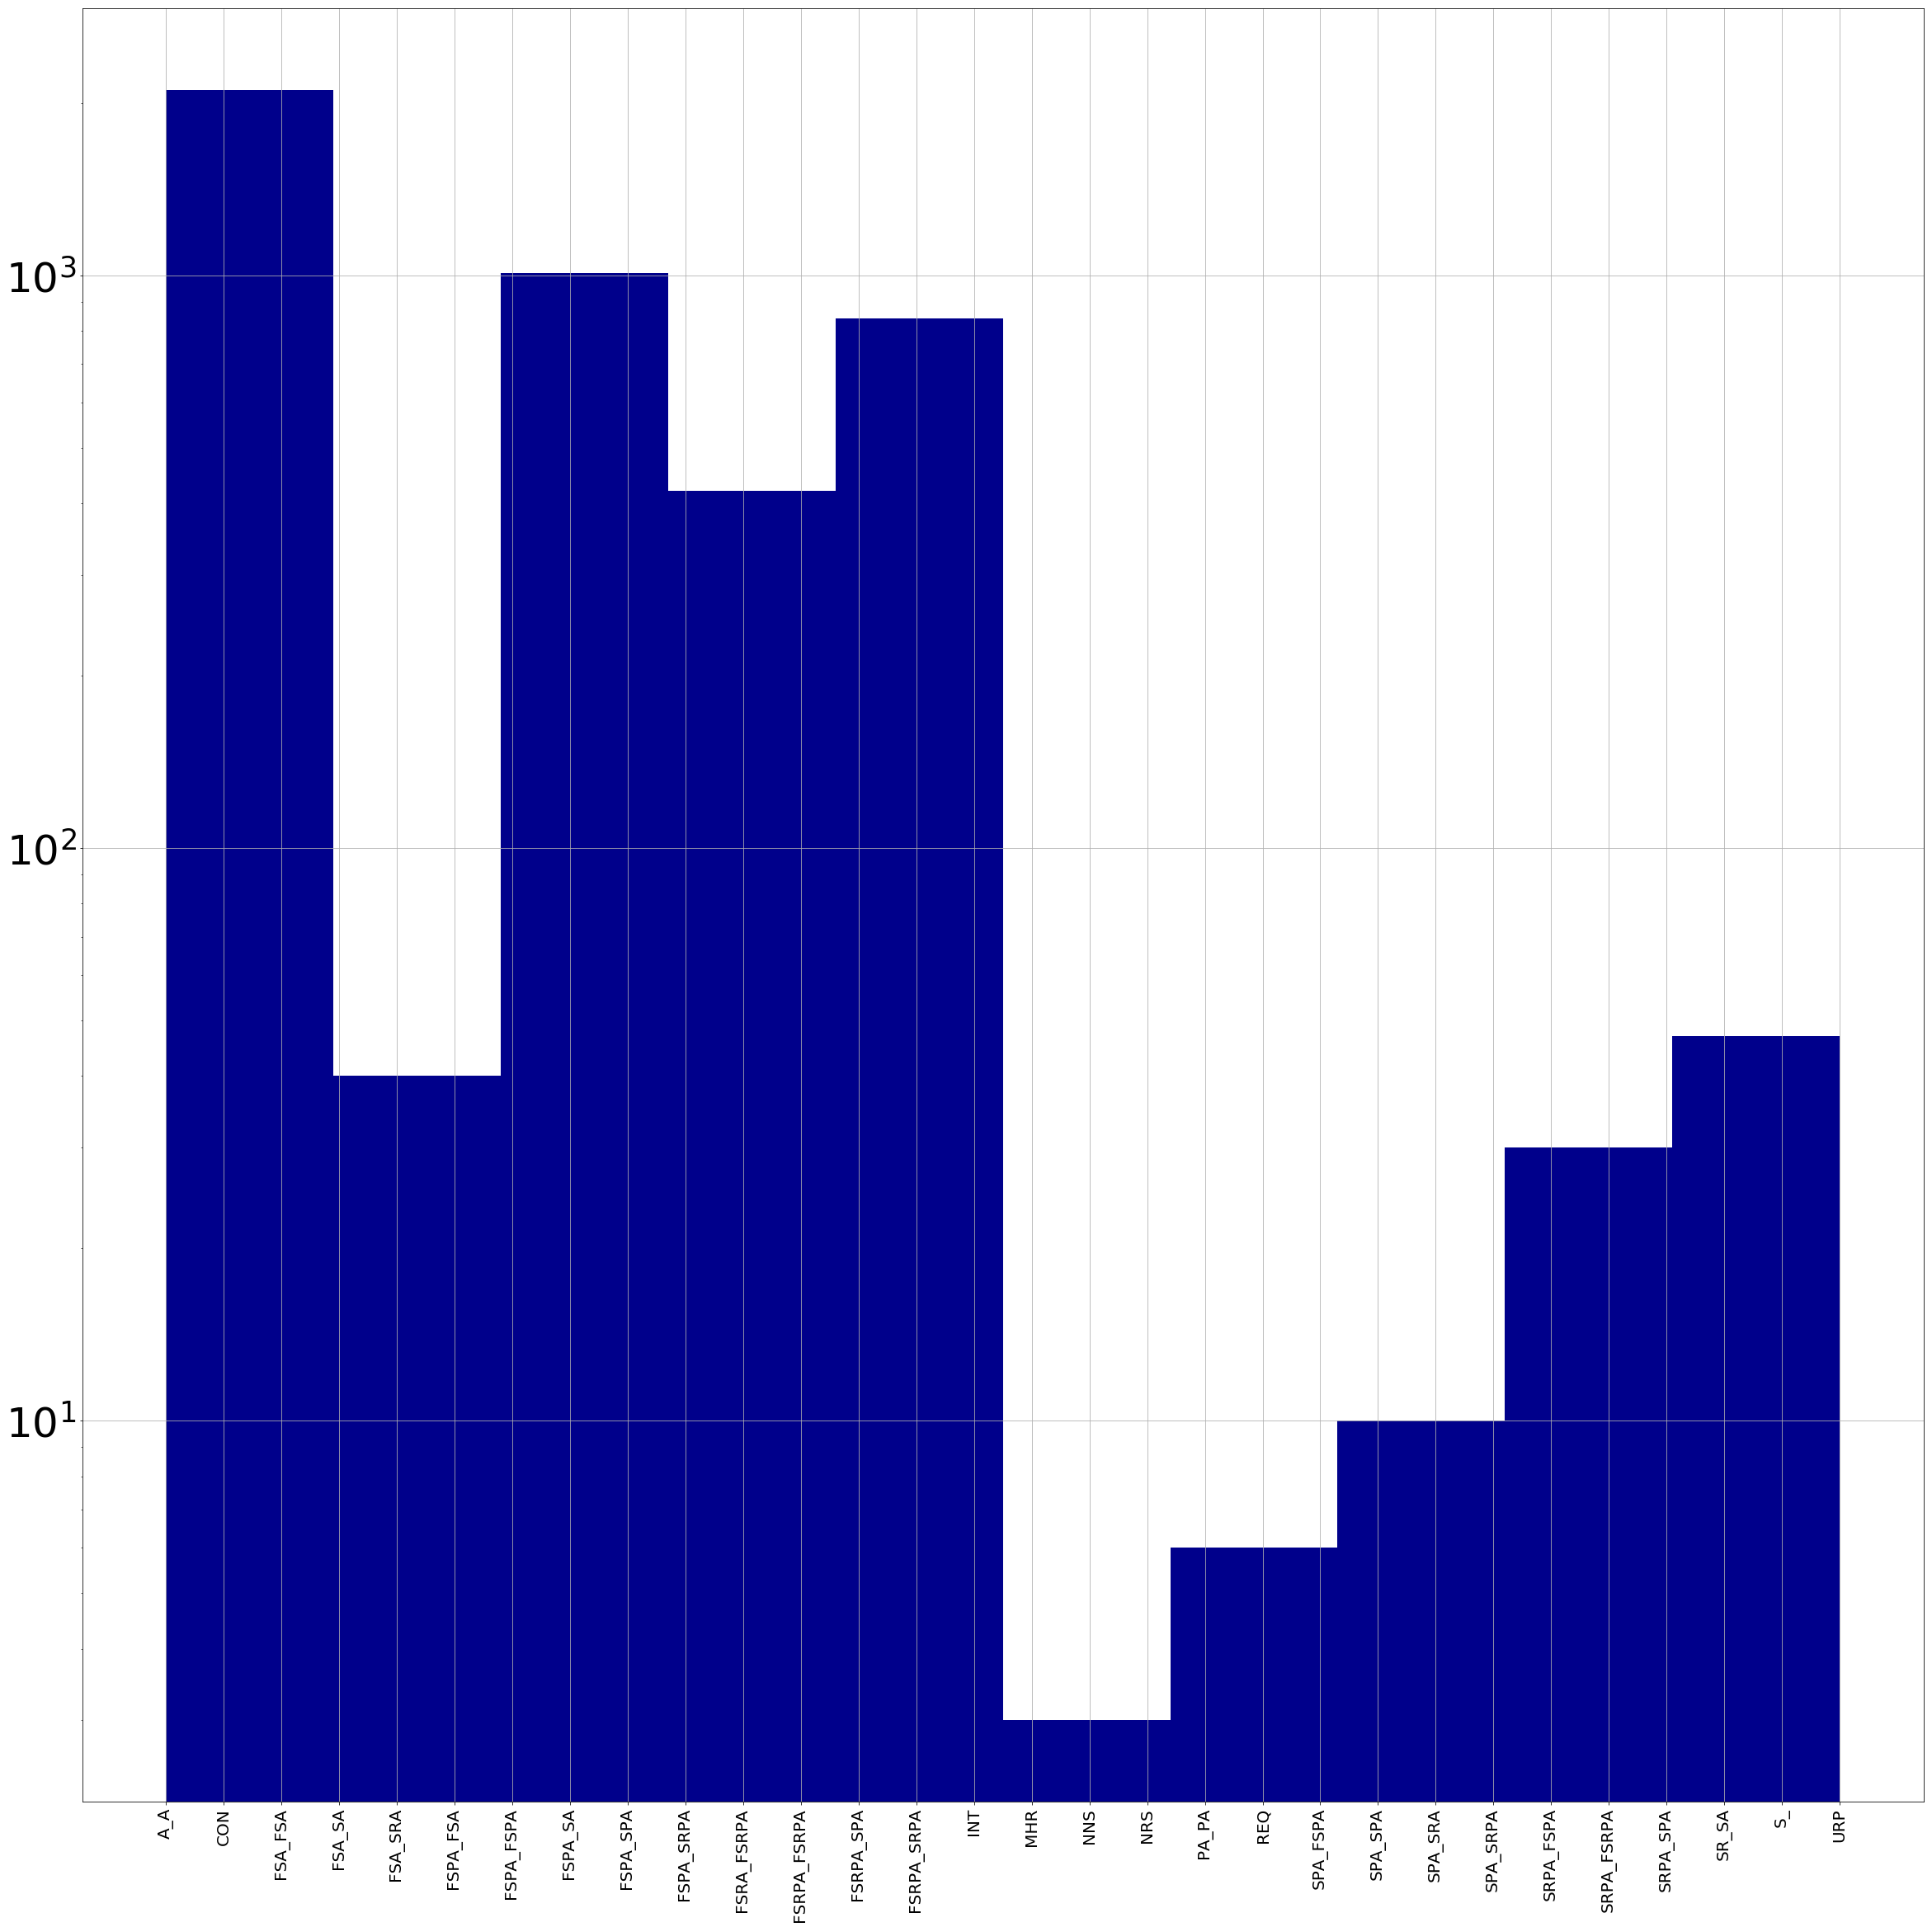

In [289]:
# Normal State Histogram
ax = dropped_normal_dataset['State'].hist(figsize=(40,40), bins=10, xlabelsize=20, ylabelsize=50, xrot=90, color='DarkBlue')
ax.set_yscale('log')

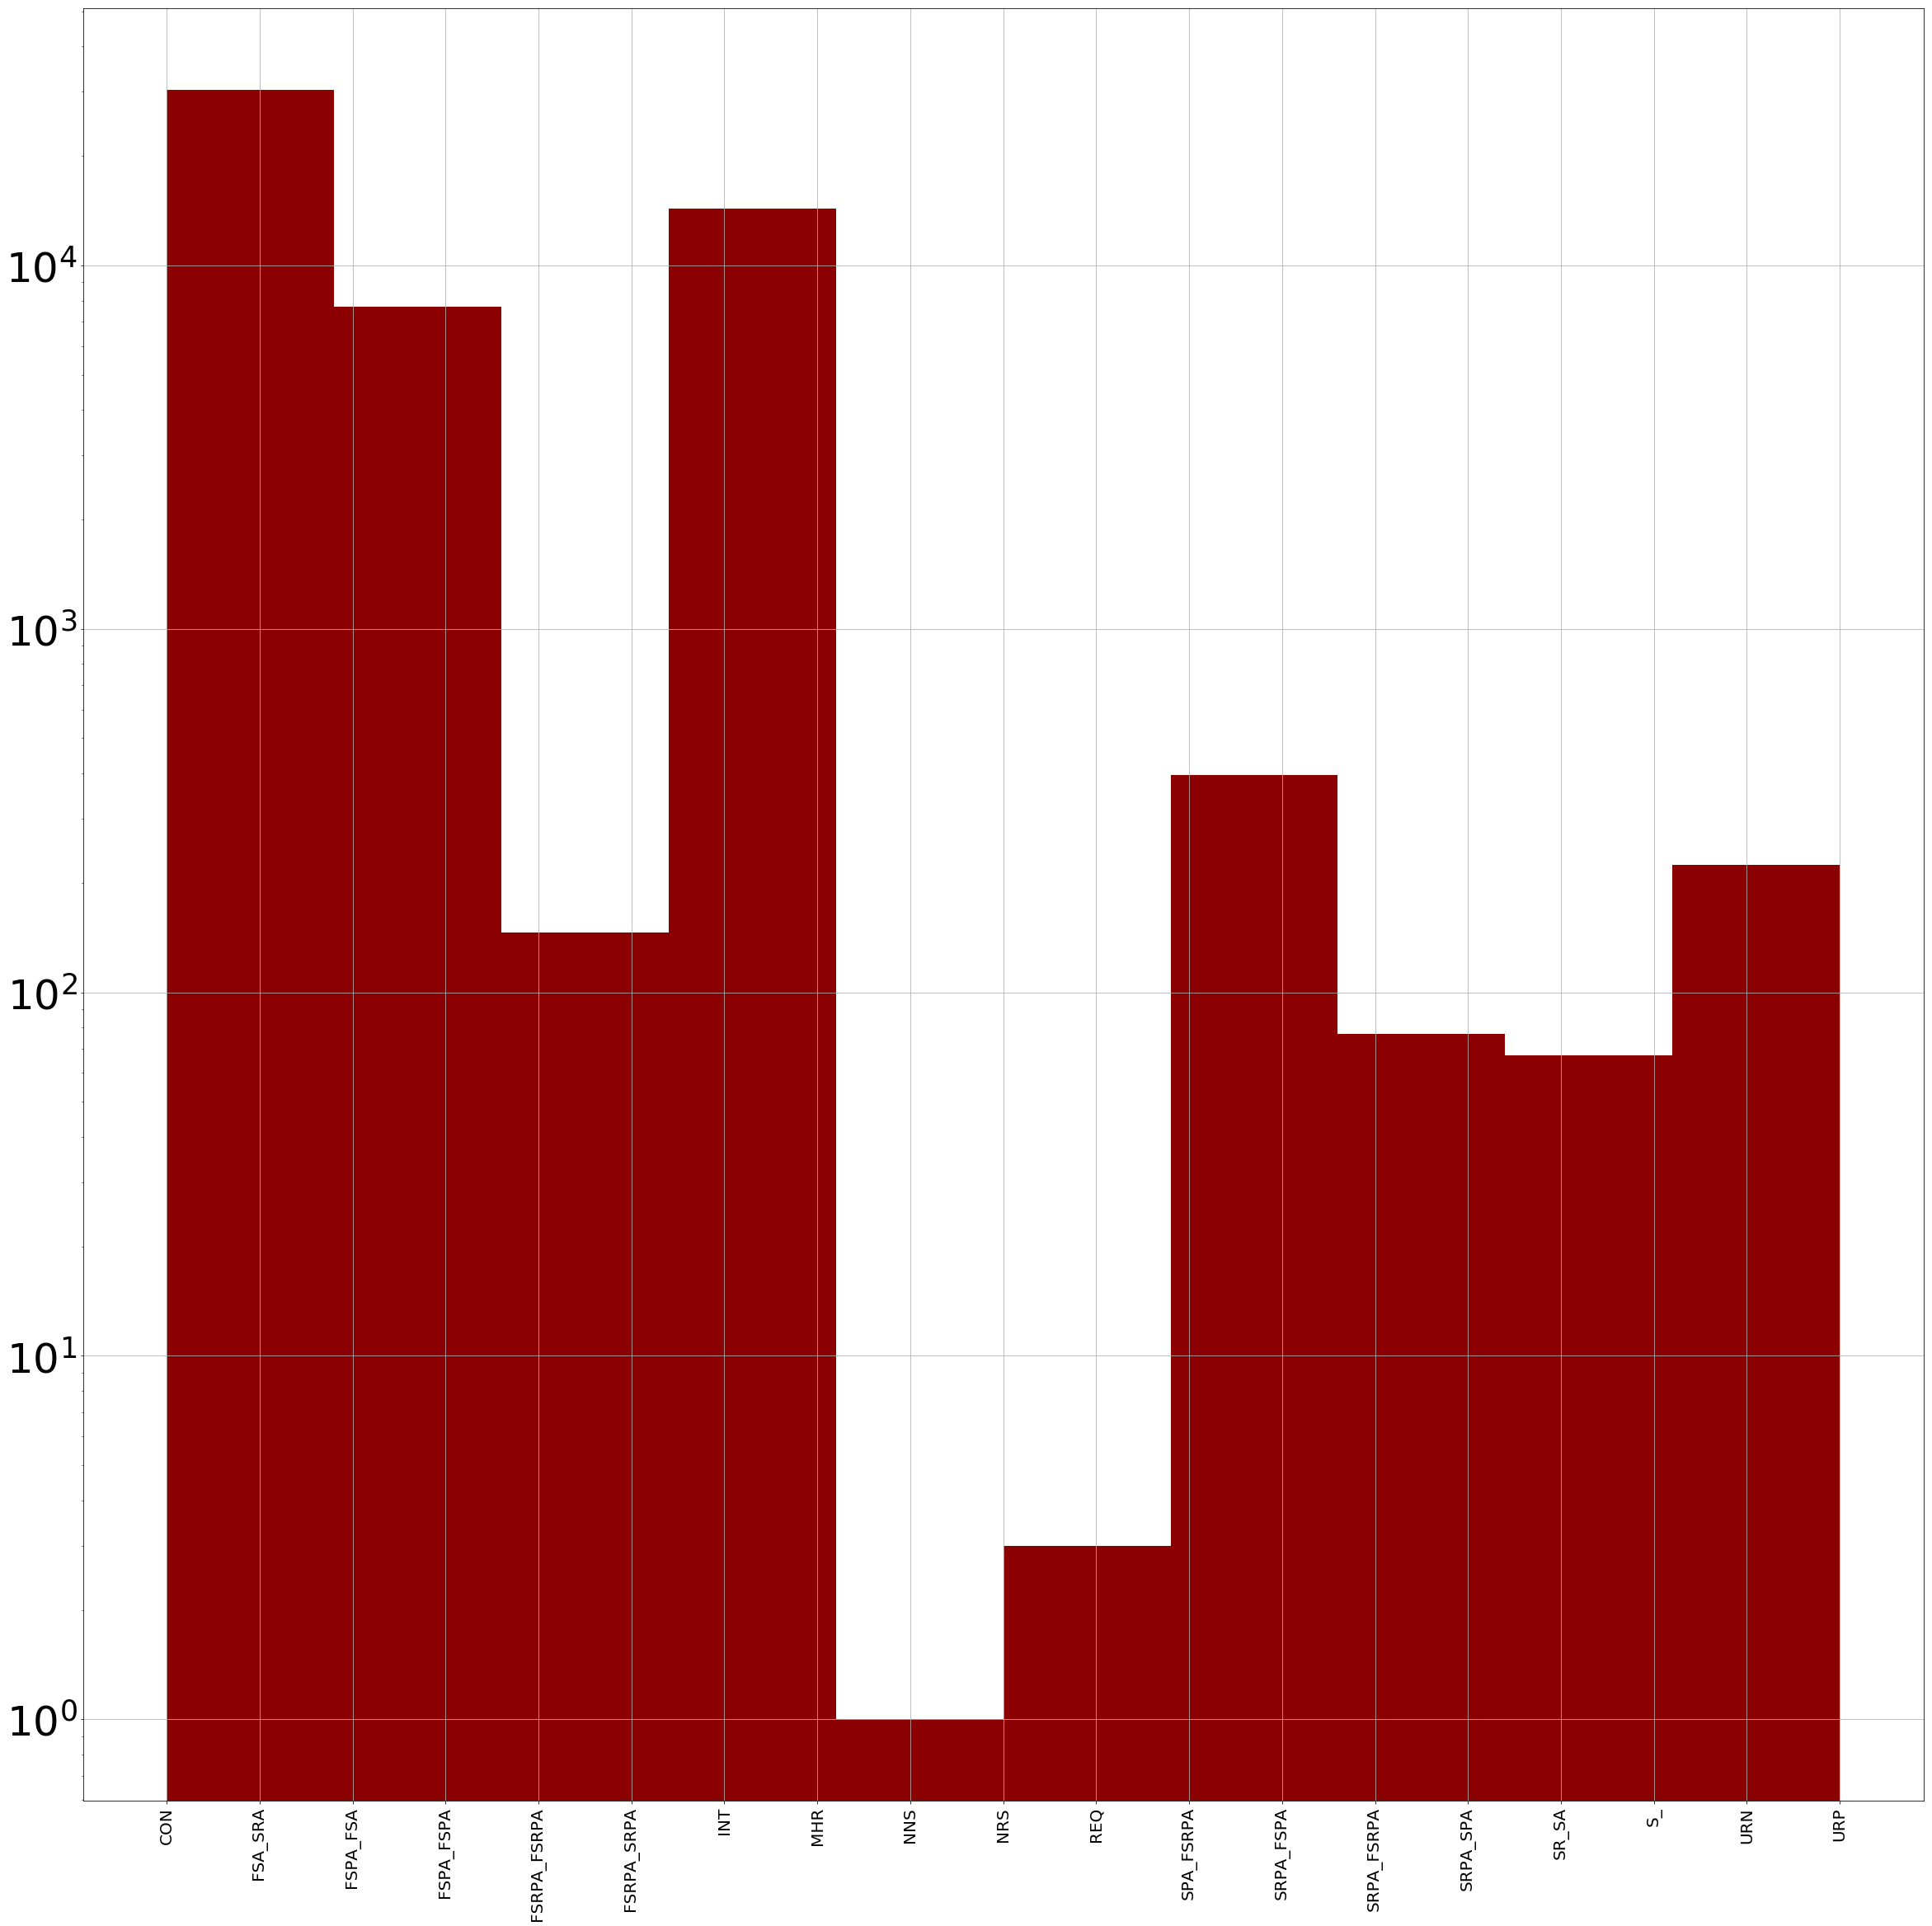

In [306]:
# Malware State Histogram
ax = dropped_malware_dataset['State'].hist(figsize=(40,40), bins=10, xlabelsize=20, ylabelsize=50, xrot=90, color='DarkRed')
ax.set_yscale('log')

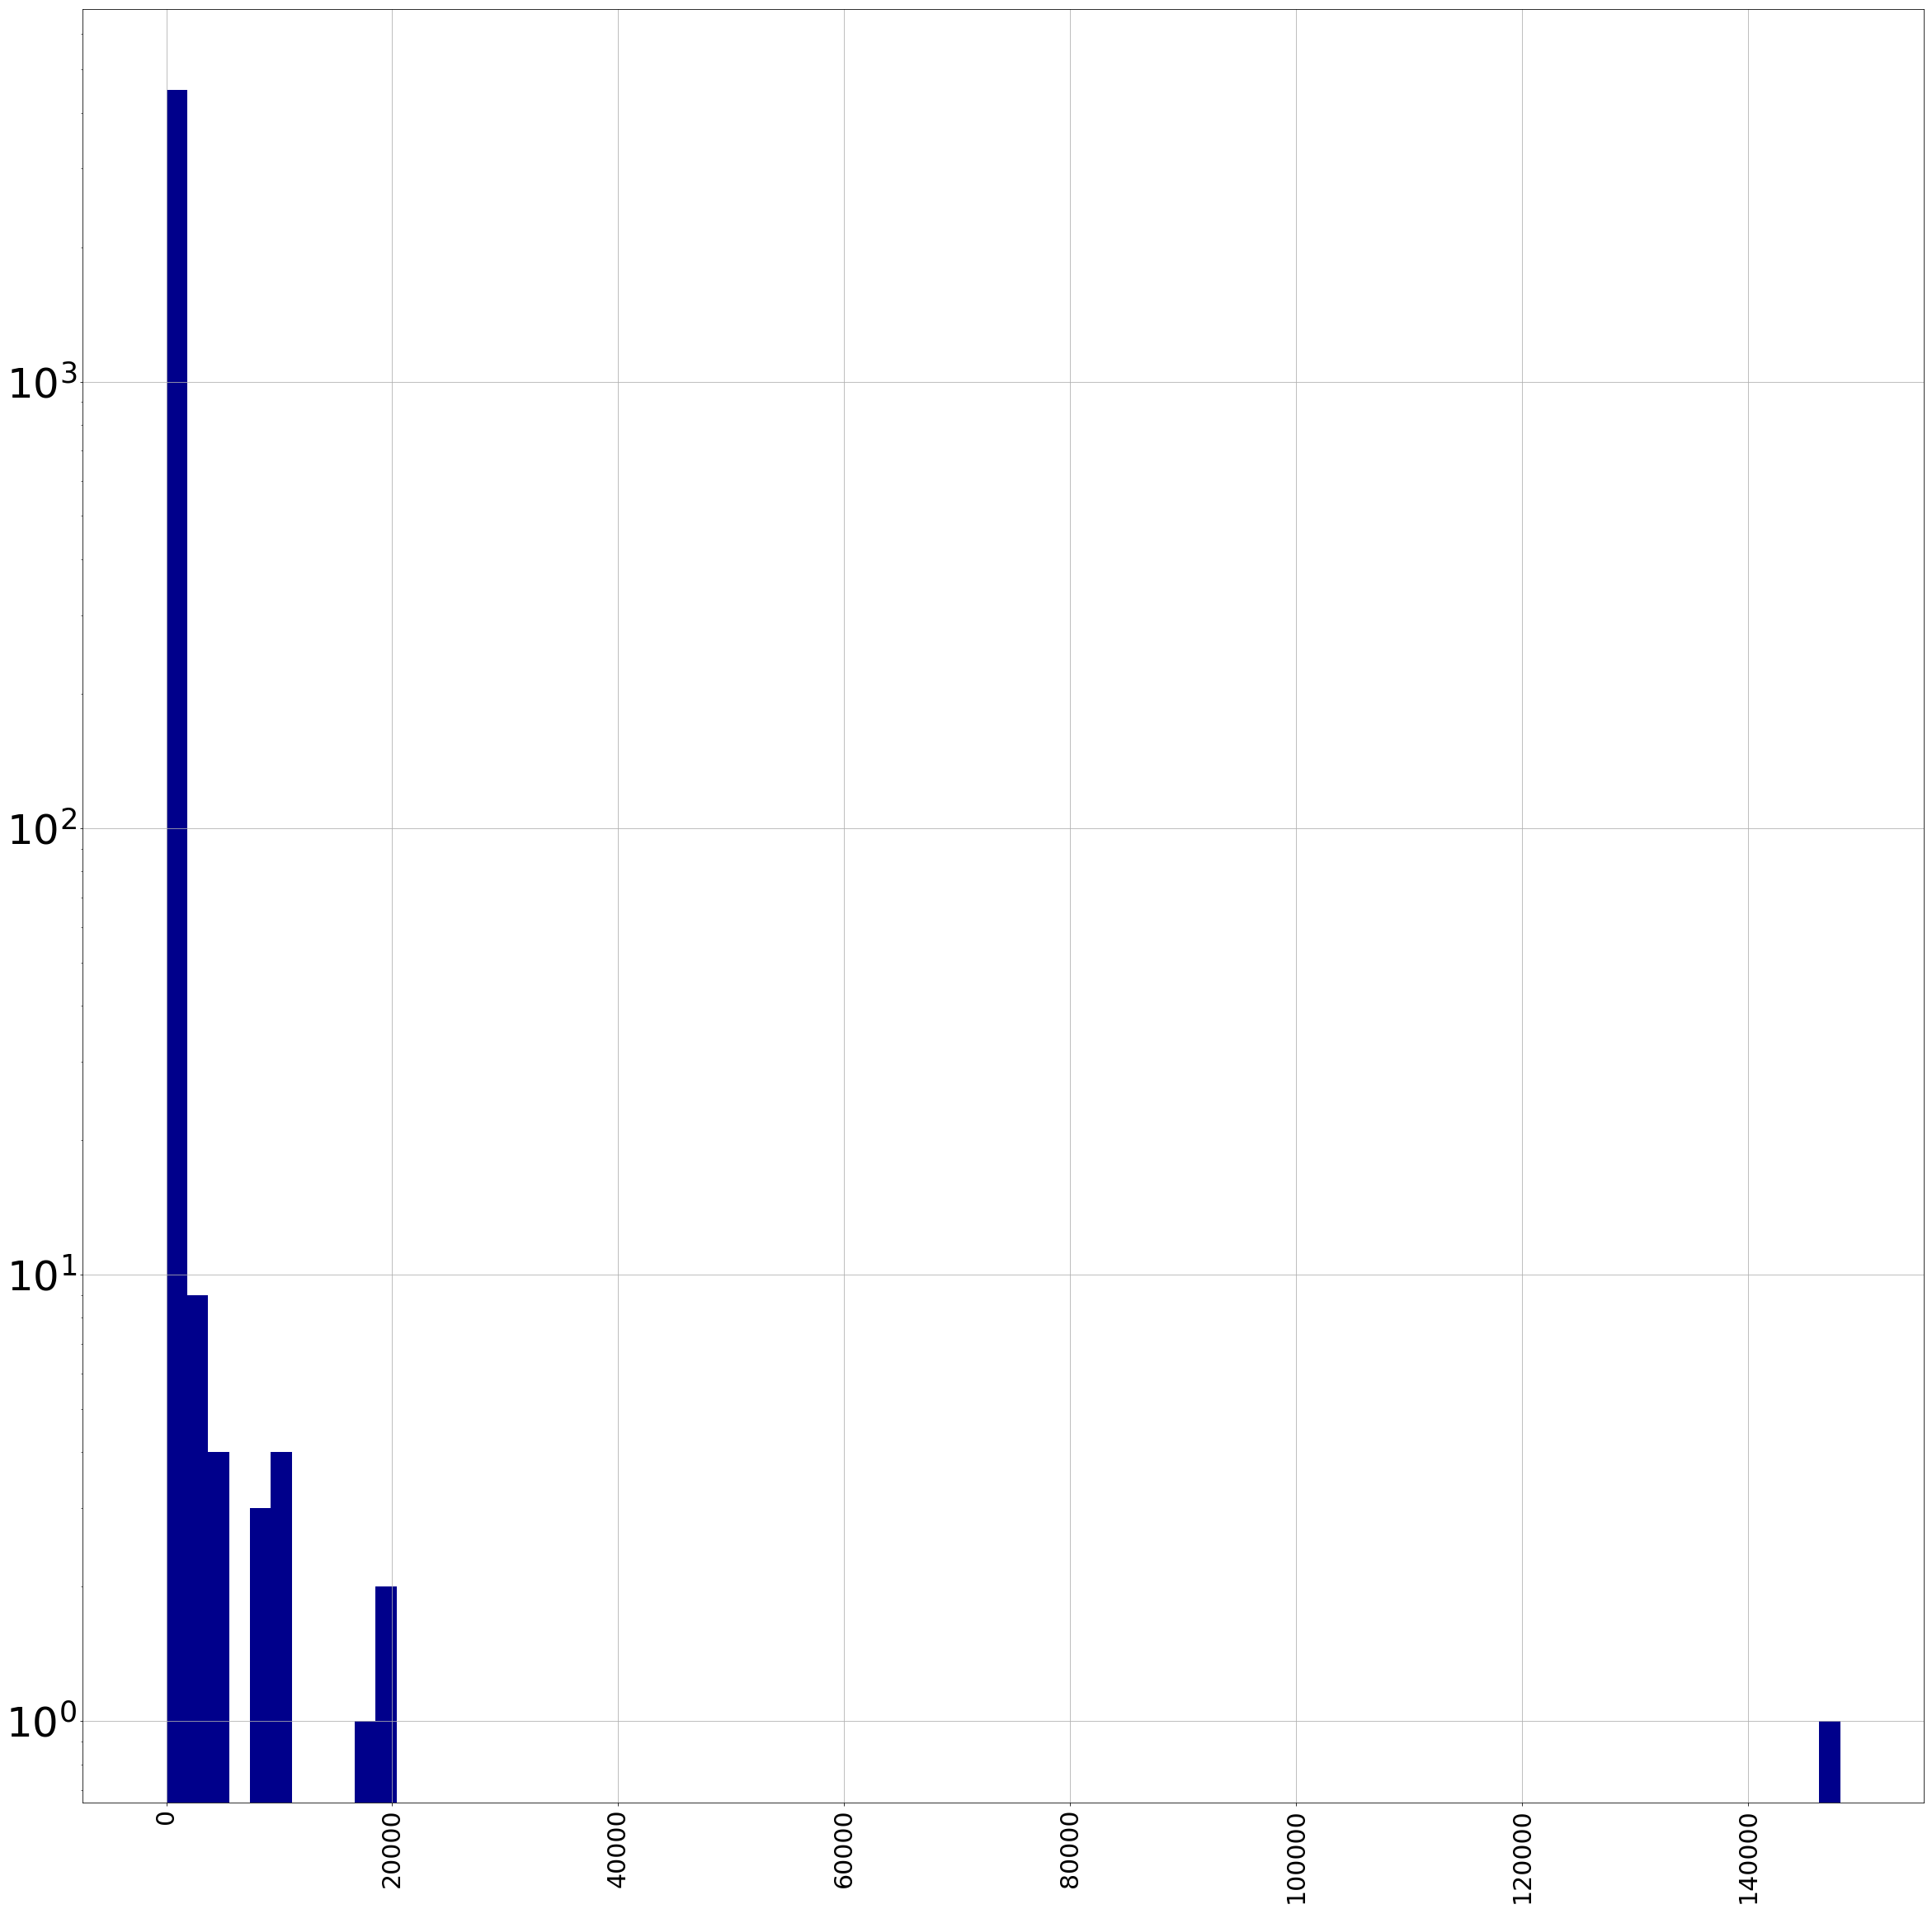

In [290]:
# Normal TotPkts Histogram
ax = dropped_normal_dataset['TotPkts'].hist(figsize=(40,40), bins=80, xlabelsize=30, ylabelsize=50, xrot=90, color='DarkBlue')
ax.set_yscale('log')

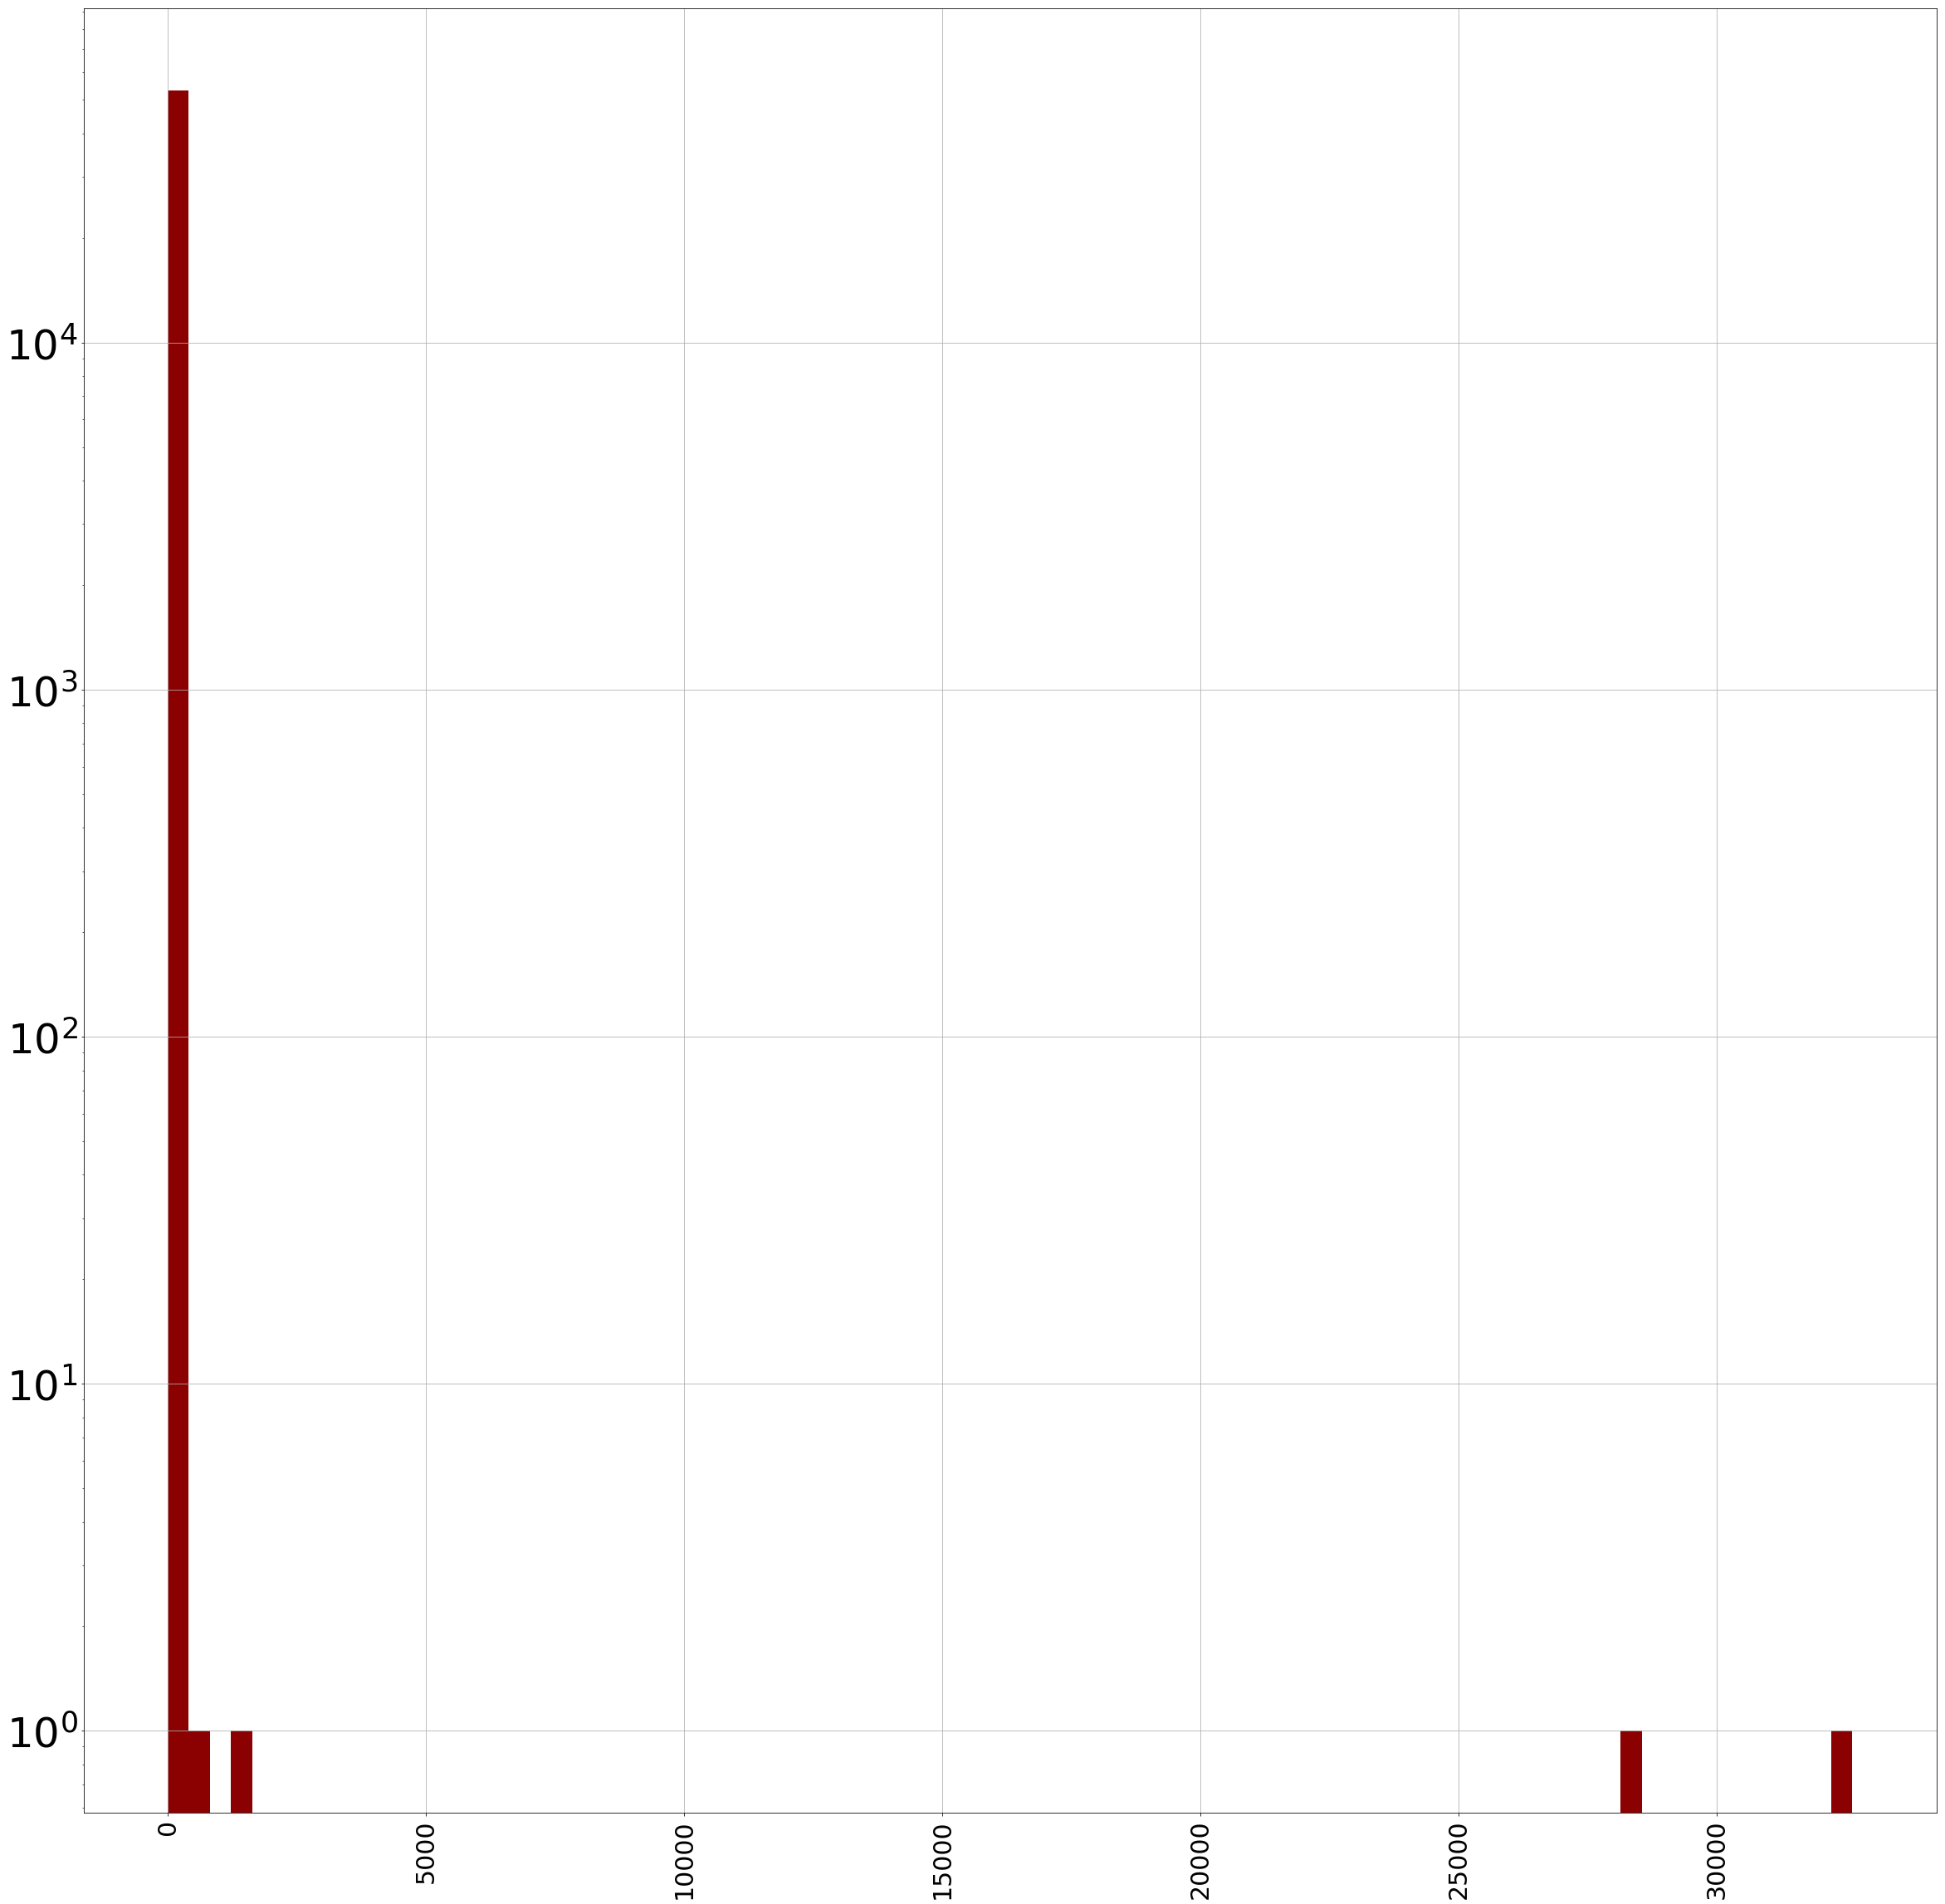

In [308]:
# Malware TotPkts Histogram
ax = dropped_malware_dataset['TotPkts'].hist(figsize=(40,40), bins=80, xlabelsize=30, ylabelsize=50, xrot=90, color='DarkRed')
ax.set_yscale('log')

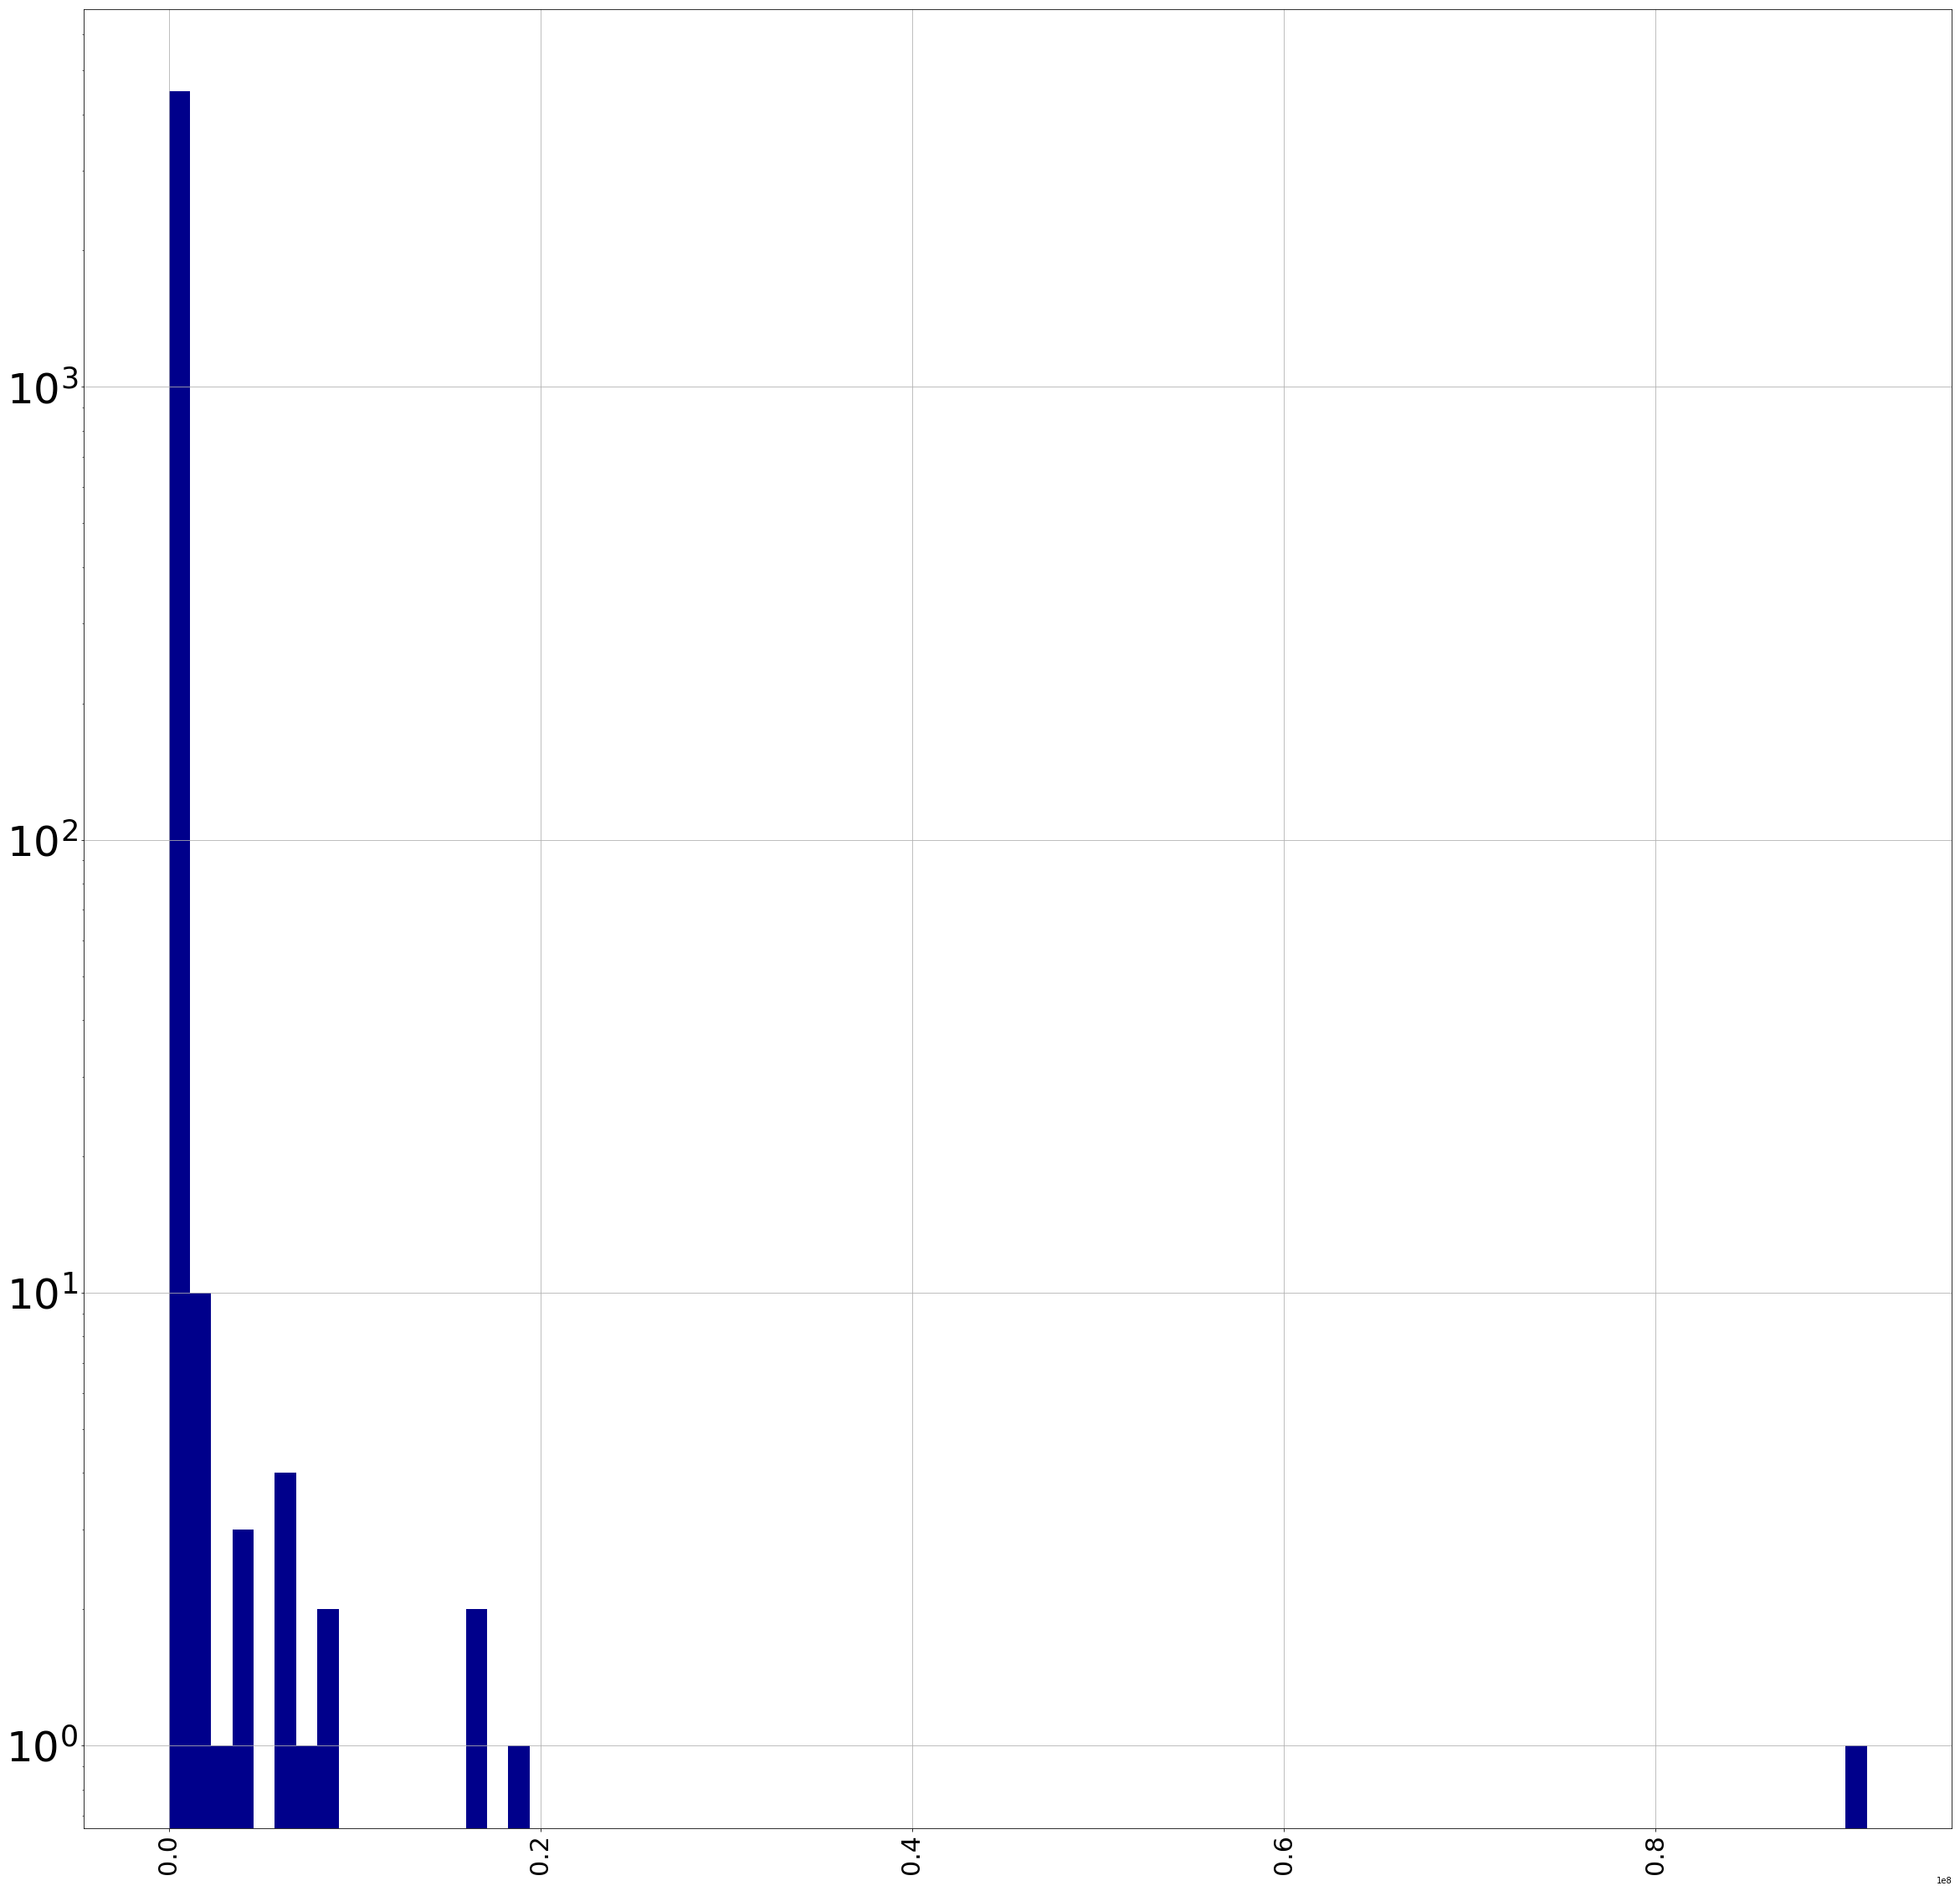

In [291]:
# Normal TotBytes Histogram
ax = dropped_normal_dataset['TotBytes'].hist(figsize=(40,40), bins=80, xlabelsize=30, ylabelsize=50, xrot=90, color='DarkBlue')
ax.set_yscale('log')

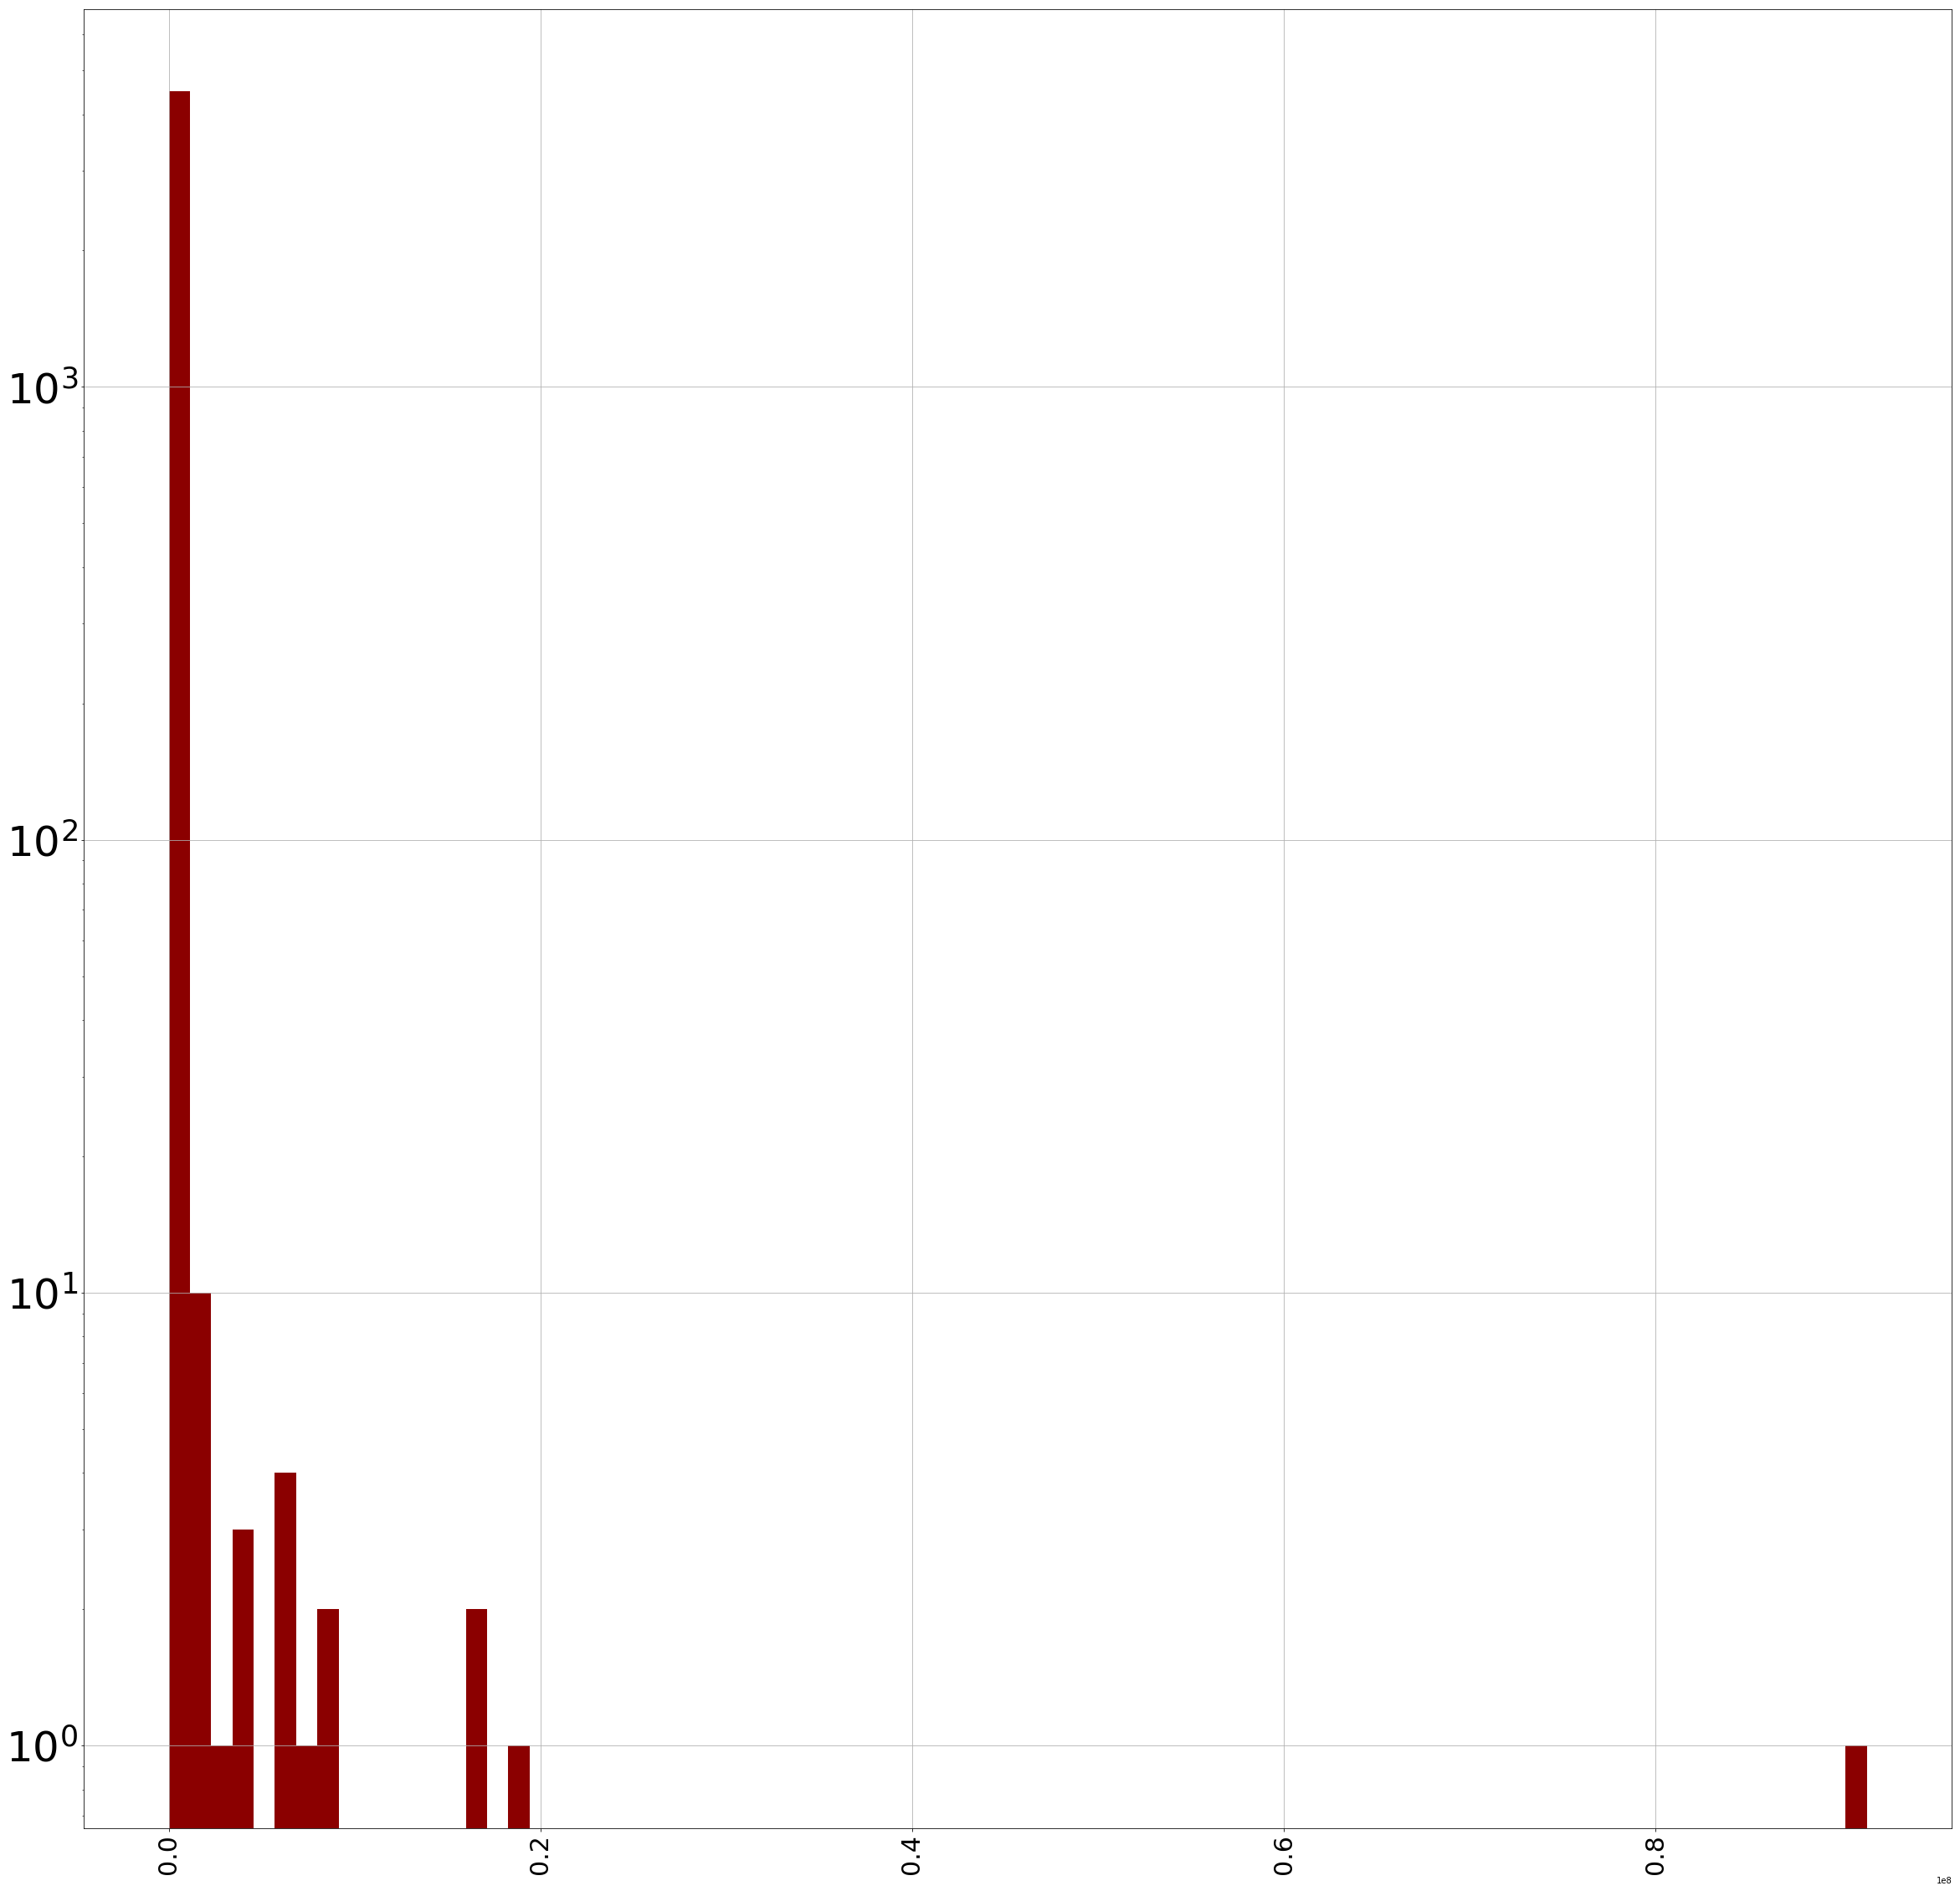

In [309]:
# Malware TotBytes Histogram
ax = dropped_normal_dataset['TotBytes'].hist(figsize=(40,40), bins=80, xlabelsize=30, ylabelsize=50, xrot=90, color='DarkRed')
ax.set_yscale('log')

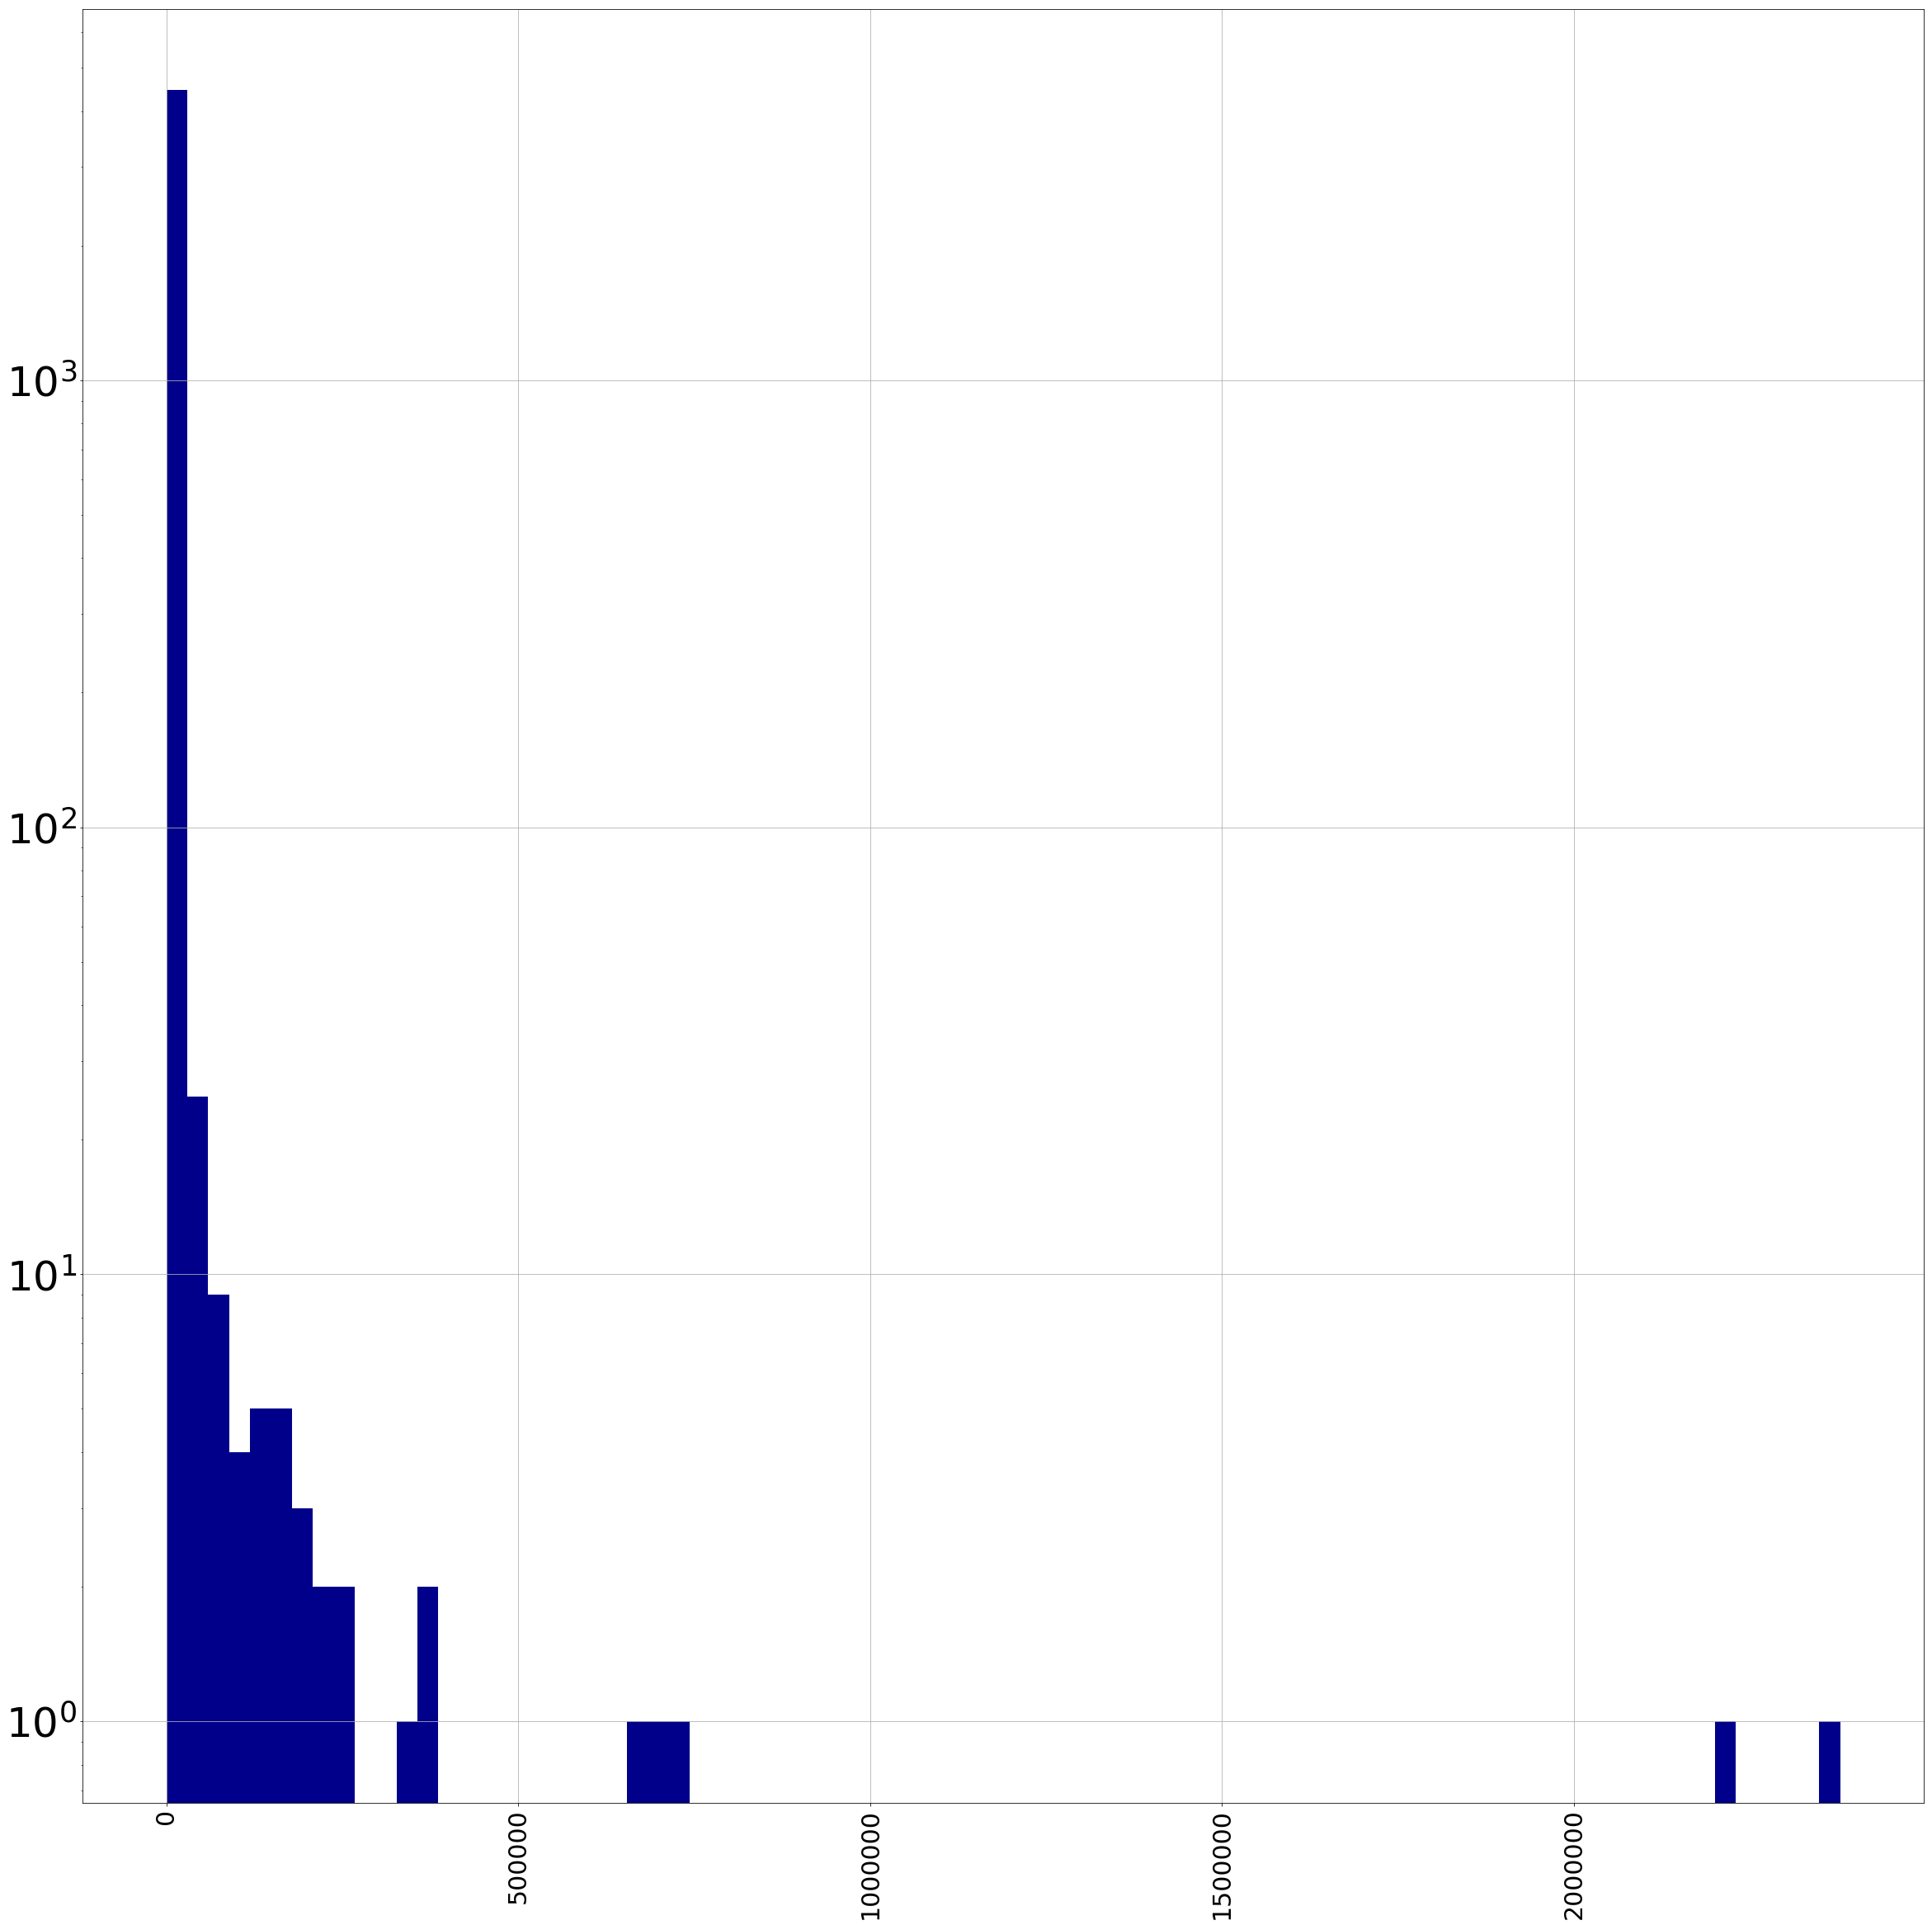

In [293]:
# Normal SrcBytes Histogram
ax = dropped_normal_dataset['SrcBytes'].hist(figsize=(40,40), bins=80, xlabelsize=30, ylabelsize=50, xrot=90, color='DarkBlue')
ax.set_yscale('log')

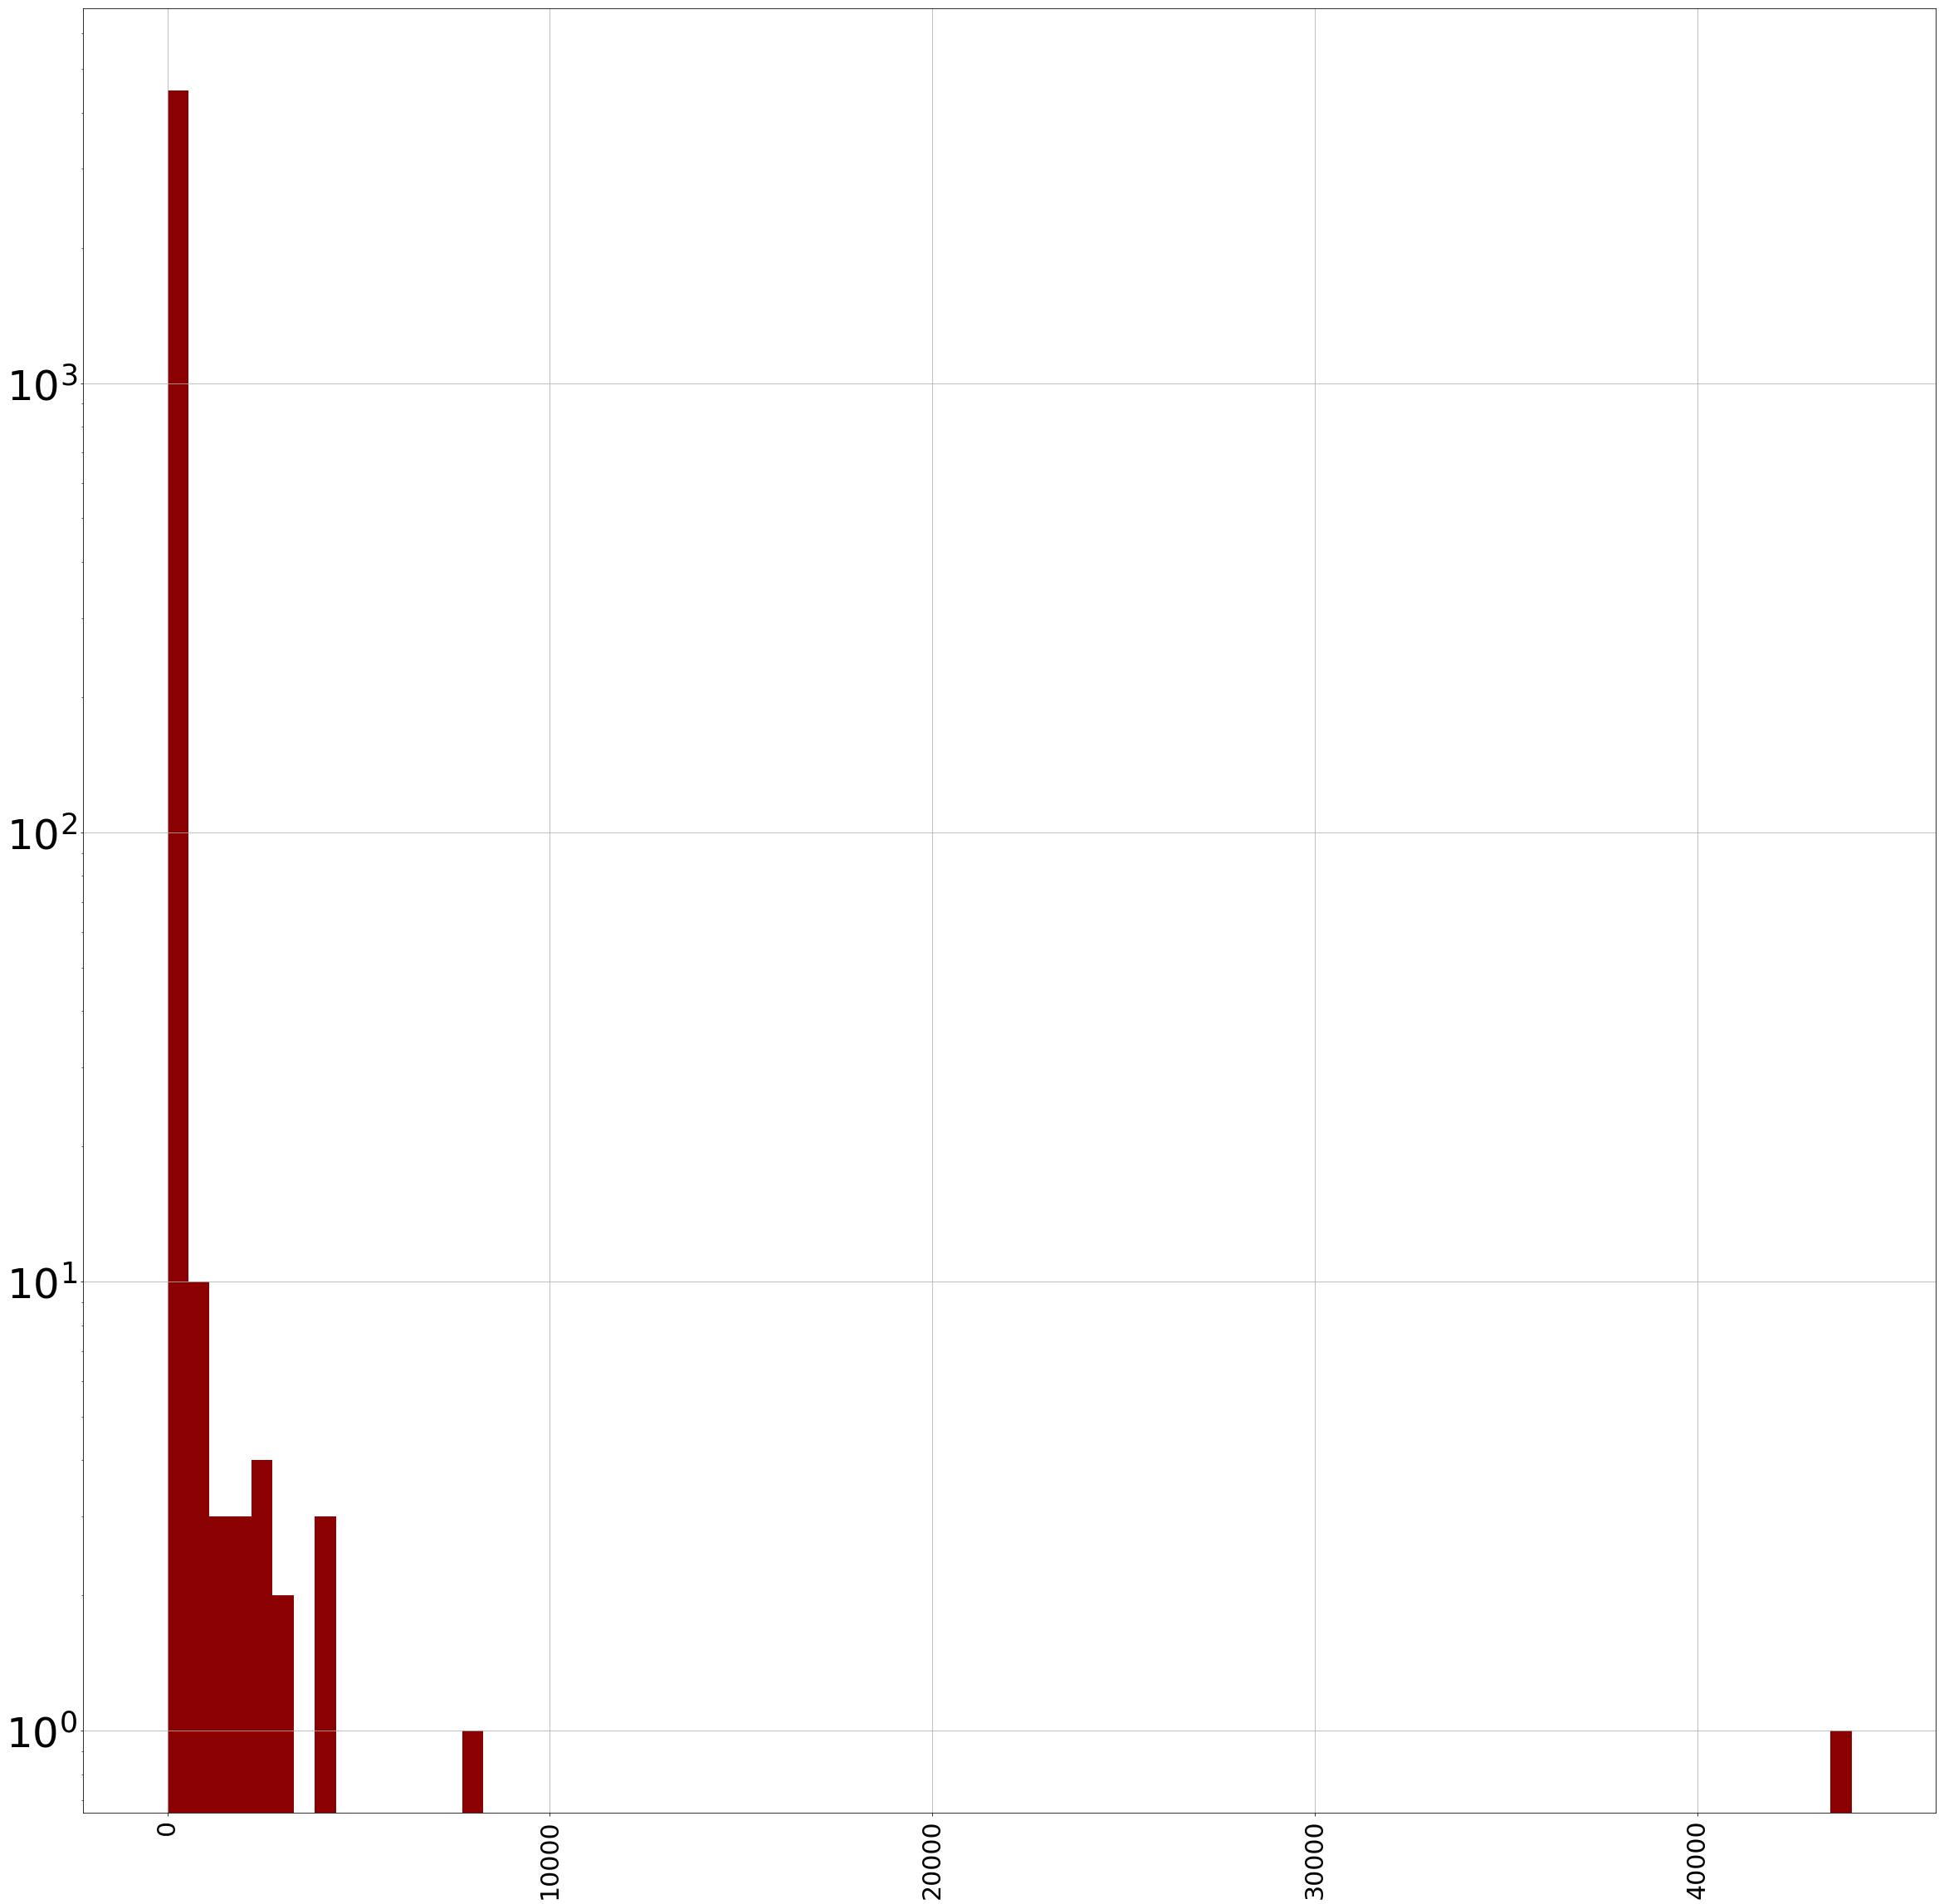

In [310]:
# Normal SrcPkts Histogram
ax = dropped_normal_dataset['SrcPkts'].hist(figsize=(40,40), bins=80, xlabelsize=30, ylabelsize=50, xrot=90, color='DarkRed')
ax.set_yscale('log')

# Scatter plots, Boxplots

In [1]:
# Another good way to understand the dataset is to plot each feature againts each other. 
# Showing us how related they are.
# Normal scatter plot
#sns.pairplot(dropped_dataset.fillna(0))
sns.pairplot(dropped_normal_dataset.fillna(0), diag_kind="kde")

NameError: name 'sns' is not defined

LinAlgError: singular matrix

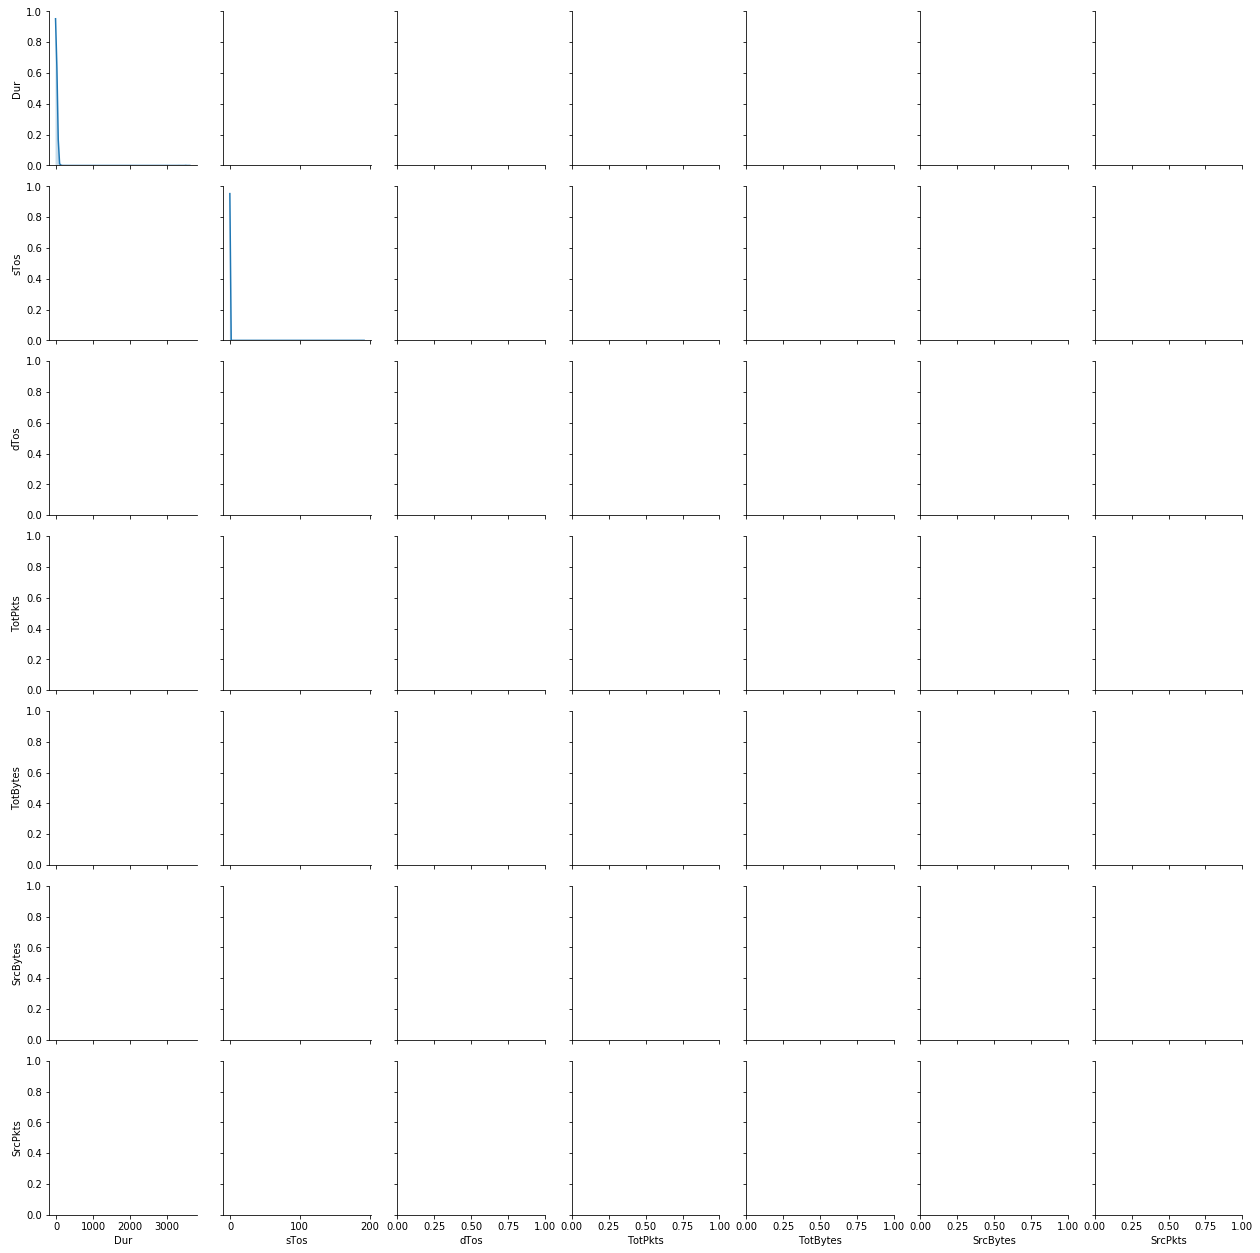

In [13]:
# Malware scatter plot
#sns.pairplot(dropped_malware_dataset.fillna(0))
sns.pairplot(dropped_malware_dataset.fillna(0), diag_kind="kde")

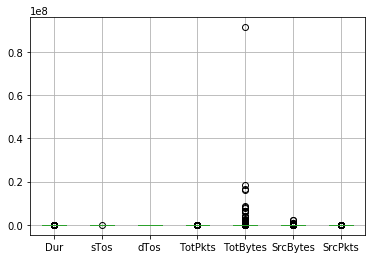

In [14]:
# Normal Boxplots for all features
dataset_onlyint = dropped_normal_dataset.select_dtypes(include=[np.number])
dataset_onlyint.boxplot()

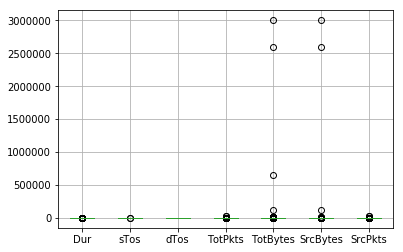

In [15]:
# Malware Boxplots for all features
dataset_onlyint = dropped_malware_dataset.select_dtypes(include=[np.number])
dataset_onlyint.boxplot()

/Users/sebas/miniconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Z-scores')

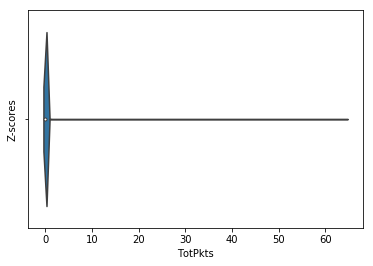

In [16]:
# Normal ViolinPlot for TotPkts
dataset_onlyint = dropped_normal_dataset.select_dtypes(include=[np.number])
# zscore: the signed number of standard deviations by which the value of an 
# observation or data point differs from the mean value
zscores = (dataset_onlyint - dataset_onlyint.mean())/dataset_onlyint.std()
plt.figure()
sns.violinplot(x=zscores.TotPkts)
plt.ylabel('Z-scores')

This graphs means that in most of our columns the data is mostly concentrated in small values, but there are large values very far away from the mean. Lets try to find a better visualization.